## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["LN_Crown_t_ha", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_Crown_t_ha                                                   \
                   count      mean       std   min     25%    50%     75%   
Species_ID                                                                  
0                  445.0  2.223910  0.767384 -0.69  1.9800  2.390  2.6600   
1                    7.0  3.614286  0.440298  2.92  3.3100  3.760  3.9750   
2                  120.0  2.078333  0.719042  0.48  1.5275  2.010  2.5750   
3                  115.0  1.973826  0.585041  0.64  1.7350  2.030  2.3400   
4                   66.0  2.563182  0.846048  0.31  1.9525  2.660  3.2275   
5                   90.0  3.263333  0.741770  0.59  2.8650  3.355  3.8600   

                 ALL_STEM_t_ha                                              \
             max         count        mean        std   min     25%    50%   
Species_ID                                                                   
0           3.54         457.0   97.049891  61.854506   1.8  47.500   92.7   
1           4.05           7.0  123.814286  61.879895  46.3  70.650  133.9   
2           3.73         120.0   74.495000  44.523333   5.1  37.275   68.1   
3           3.37         115.0  107.607826  55.589186  11.0  62.700  106.8   
4           4.06          66.0   84.946970  58.875162   8.2  40.750   61.2   
5           4.24          90.0  173.065556  99.100647   5.0  93.075  161.3   

                            
                75%    max  
Species_ID                  
0           135.900  310.7  
1           174.550  196.1  
2           103.075  193.5  
3           145.450  251.6  
4           125.000  245.4  
5           253.375  363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_Crown_t_ha"
indep_variables = ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     Species_ID  Origin_ID   H_m  DBH_cm  BA_sq_m_ha  GS_cub_m  ALL_STEM_t_ha  \
0             0        0.0   9.7    14.6         9.7      43.9           18.9   
1             0        0.0  20.6    20.6        32.2     254.0          113.1   
2             0        0.0  13.6    15.4        35.2     190.0           87.8   
3             0        0.0  23.3    22.2        29.6     277.7          106.5   
4             0        0.0  15.6    16.4        20.4     142.5           67.0   
..          ...        ...   ...     ...         ...       ...            ...   
852           3        0.0   7.8     4.4         9.2      39.8           17.8   
853           3        0.0  12.7     9.0        20.5     123.6           47.1   
854           3        0.0  12.2     8.1        20.3     141.7           51.9   
855           2        0.0  14.3    12.4        25.1     176.5          100.7   
856           2        0.0  21.1    25.6        21.0     191.6           99.9   

     Stem_wood_t_ha  Stem_b

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [11]:
# Columns in "y" data collections
y.head()

,LN_Crown_t_ha
0,2.13
1,2.44
2,2.62
3,2.67
4,2.65


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.6226681034419347, 0.675606383957693, 0.6147061149882372]
    Mean: 0.638
    Std: 0.027

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.55091513 0.55261592 0.46029379]
    Mean: 0.521
    Std: 0.043

 --------------------
Mean absolute error (MAE): 

    Scores: [0.3548645545144522, 0.32945801994554513, 0.3633748844621233]
    Mean: 0.349
    Std: 0.014

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.719687164452369                 # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.10222336734225579                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.11773373525204708                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 196         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.6012141949508016                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.719687164452369
Gamma: 0.10222336734225579
Learning_rate: 0.11773373525204708
Max_depth: 4
N_estimators: 196
Subsample: 0.6012141949508016


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.77529	validation_1-rmse:1.85458
[1]	validation_0-rmse:1.59419	validation_1-rmse:1.67050
[2]	validation_0-rmse:1.44051	validation_1-rmse:1.50842
[3]	validation_0-rmse:1.29827	validation_1-rmse:1.36299
[4]	validation_0-rmse:1.17544	validation_1-rmse:1.23538
[5]	validation_0-rmse:1.07211	validation_1-rmse:1.12716
[6]	validation_0-rmse:0.98368	validation_1-rmse:1.03550


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.90458	validation_1-rmse:0.95383
[8]	validation_0-rmse:0.83794	validation_1-rmse:0.88403
[9]	validation_0-rmse:0.78018	validation_1-rmse:0.82363
[10]	validation_0-rmse:0.73280	validation_1-rmse:0.77490
[11]	validation_0-rmse:0.69241	validation_1-rmse:0.73196
[12]	validation_0-rmse:0.65789	validation_1-rmse:0.69851
[13]	validation_0-rmse:0.63214	validation_1-rmse:0.67209
[14]	validation_0-rmse:0.60619	validation_1-rmse:0.64674
[15]	validation_0-rmse:0.58584	validation_1-rmse:0.62459
[16]	validation_0-rmse:0.56691	validation_1-rmse:0.60375
[17]	validation_0-rmse:0.55173	validation_1-rmse:0.58858
[18]	validation_0-rmse:0.53788	validation_1-rmse:0.57335
[19]	validation_0-rmse:0.52650	validation_1-rmse:0.56441
[20]	validation_0-rmse:0.51880	validation_1-rmse:0.55665
[21]	validation_0-rmse:0.51122	validation_1-rmse:0.55256
[22]	validation_0-rmse:0.50534	validation_1-rmse:0.54712
[23]	validation_0-rmse:0.49697	validation_1-rmse:0.54230
[24]	validation_0-rmse:0.49032	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79130	validation_1-rmse:1.76666
[1]	validation_0-rmse:1.60854	validation_1-rmse:1.59104
[2]	validation_0-rmse:1.44932	validation_1-rmse:1.43400


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30874	validation_1-rmse:1.29619
[4]	validation_0-rmse:1.18401	validation_1-rmse:1.17759
[5]	validation_0-rmse:1.07931	validation_1-rmse:1.08035
[6]	validation_0-rmse:0.98877	validation_1-rmse:0.99374
[7]	validation_0-rmse:0.90842	validation_1-rmse:0.91933
[8]	validation_0-rmse:0.83812	validation_1-rmse:0.85339
[9]	validation_0-rmse:0.78087	validation_1-rmse:0.80222
[10]	validation_0-rmse:0.73226	validation_1-rmse:0.75709
[11]	validation_0-rmse:0.69159	validation_1-rmse:0.72264
[12]	validation_0-rmse:0.65534	validation_1-rmse:0.69103
[13]	validation_0-rmse:0.62803	validation_1-rmse:0.67013
[14]	validation_0-rmse:0.60245	validation_1-rmse:0.64886
[15]	validation_0-rmse:0.58145	validation_1-rmse:0.63654
[16]	validation_0-rmse:0.56224	validation_1-rmse:0.62241
[17]	validation_0-rmse:0.54732	validation_1-rmse:0.61165
[18]	validation_0-rmse:0.53498	validation_1-rmse:0.60254
[19]	validation_0-rmse:0.52376	validation_1-rmse:0.59273
[20]	validation_0-rmse:0.51470	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78882	validation_1-rmse:1.79427


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60931	validation_1-rmse:1.61605
[2]	validation_0-rmse:1.45418	validation_1-rmse:1.46265
[3]	validation_0-rmse:1.31419	validation_1-rmse:1.31595
[4]	validation_0-rmse:1.19401	validation_1-rmse:1.19106
[5]	validation_0-rmse:1.09336	validation_1-rmse:1.08825
[6]	validation_0-rmse:1.00662	validation_1-rmse:0.99612
[7]	validation_0-rmse:0.92596	validation_1-rmse:0.91157
[8]	validation_0-rmse:0.85675	validation_1-rmse:0.83981
[9]	validation_0-rmse:0.79905	validation_1-rmse:0.77672
[10]	validation_0-rmse:0.75302	validation_1-rmse:0.72401
[11]	validation_0-rmse:0.71225	validation_1-rmse:0.67898
[12]	validation_0-rmse:0.67885	validation_1-rmse:0.64340
[13]	validation_0-rmse:0.64818	validation_1-rmse:0.60882
[14]	validation_0-rmse:0.62077	validation_1-rmse:0.58574
[15]	validation_0-rmse:0.60020	validation_1-rmse:0.56561
[16]	validation_0-rmse:0.58414	validation_1-rmse:0.54642
[17]	validation_0-rmse:0.57068	validation_1-rmse:0.52697
[18]	validation_0-rmse:0.55873	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79865	validation_1-rmse:1.74217
[1]	validation_0-rmse:1.61236	validation_1-rmse:1.56360
[2]	validation_0-rmse:1.45324	validation_1-rmse:1.40656


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31072	validation_1-rmse:1.27310
[4]	validation_0-rmse:1.19020	validation_1-rmse:1.15980
[5]	validation_0-rmse:1.08325	validation_1-rmse:1.06156
[6]	validation_0-rmse:0.99048	validation_1-rmse:0.97559
[7]	validation_0-rmse:0.91119	validation_1-rmse:0.90411
[8]	validation_0-rmse:0.84377	validation_1-rmse:0.84396
[9]	validation_0-rmse:0.78615	validation_1-rmse:0.79247
[10]	validation_0-rmse:0.73359	validation_1-rmse:0.74729
[11]	validation_0-rmse:0.69109	validation_1-rmse:0.71269
[12]	validation_0-rmse:0.65647	validation_1-rmse:0.68597
[13]	validation_0-rmse:0.62416	validation_1-rmse:0.66880
[14]	validation_0-rmse:0.59883	validation_1-rmse:0.64769
[15]	validation_0-rmse:0.57607	validation_1-rmse:0.63332
[16]	validation_0-rmse:0.55736	validation_1-rmse:0.61753
[17]	validation_0-rmse:0.53989	validation_1-rmse:0.60289
[18]	validation_0-rmse:0.52654	validation_1-rmse:0.59686
[19]	validation_0-rmse:0.51362	validation_1-rmse:0.58848
[20]	validation_0-rmse:0.50344	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79620	validation_1-rmse:1.76199
[1]	validation_0-rmse:1.61503	validation_1-rmse:1.59150
[2]	validation_0-rmse:1.45653	validation_1-rmse:1.43998
[3]	validation_0-rmse:1.31187	validation_1-rmse:1.30190
[4]	validation_0-rmse:1.19174	validation_1-rmse:1.18571


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08240	validation_1-rmse:1.08740
[6]	validation_0-rmse:0.98789	validation_1-rmse:1.00183
[7]	validation_0-rmse:0.90851	validation_1-rmse:0.92496
[8]	validation_0-rmse:0.83867	validation_1-rmse:0.85912
[9]	validation_0-rmse:0.78179	validation_1-rmse:0.80572
[10]	validation_0-rmse:0.73117	validation_1-rmse:0.75889
[11]	validation_0-rmse:0.69165	validation_1-rmse:0.72219
[12]	validation_0-rmse:0.65554	validation_1-rmse:0.69421
[13]	validation_0-rmse:0.62618	validation_1-rmse:0.66718
[14]	validation_0-rmse:0.60228	validation_1-rmse:0.64730
[15]	validation_0-rmse:0.57983	validation_1-rmse:0.63046
[16]	validation_0-rmse:0.56288	validation_1-rmse:0.61856
[17]	validation_0-rmse:0.54535	validation_1-rmse:0.60540
[18]	validation_0-rmse:0.53016	validation_1-rmse:0.59274
[19]	validation_0-rmse:0.51920	validation_1-rmse:0.58473
[20]	validation_0-rmse:0.50851	validation_1-rmse:0.57406
[21]	validation_0-rmse:0.50098	validation_1-rmse:0.56594
[22]	validation_0-rmse:0.49430	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78059	validation_1-rmse:1.83949
[1]	validation_0-rmse:1.59568	validation_1-rmse:1.64978
[2]	validation_0-rmse:1.43856	validation_1-rmse:1.49325
[3]	validation_0-rmse:1.30118	validation_1-rmse:1.35428
[4]	validation_0-rmse:1.18349	validation_1-rmse:1.23278
[5]	validation_0-rmse:1.08154	validation_1-rmse:1.13235
[6]	validation_0-rmse:0.99016	validation_1-rmse:1.04080
[7]	validation_0-rmse:0.90984	validation_1-rmse:0.96065
[8]	validation_0-rmse:0.84426	validation_1-rmse:0.89363
[9]	validation_0-rmse:0.78765	validation_1-rmse:0.83132
[10]	validation_0-rmse:0.73839	validation_1-rmse:0.77765
[11]	validation_0-rmse:0.69791	validation_1-rmse:0.73707
[12]	validation_0-rmse:0.66259	validation_1-rmse:0.70125
[13]	validation_0-rmse:0.63297	validation_1-rmse:0.66939
[14]	validation_0-rmse:0.60794	validation_1-rmse:0.64147
[15]	validation_0-rmse:0.58873	validation_1-rmse:0.62035
[16]	validation_0-rmse:0.57001	validation_1-rmse:0.60113
[17]	validation_0-rmse:0.55575	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79329	validation_1-rmse:1.76813
[1]	validation_0-rmse:1.60488	validation_1-rmse:1.58473
[2]	validation_0-rmse:1.44906	validation_1-rmse:1.42993
[3]	validation_0-rmse:1.30747	validation_1-rmse:1.29459
[4]	validation_0-rmse:1.18547	validation_1-rmse:1.17413
[5]	validation_0-rmse:1.08071	validation_1-rmse:1.07403
[6]	validation_0-rmse:0.98925	validation_1-rmse:0.99056
[7]	validation_0-rmse:0.91189	validation_1-rmse:0.91681
[8]	validation_0-rmse:0.84314	validation_1-rmse:0.85311
[9]	validation_0-rmse:0.78627	validation_1-rmse:0.80027
[10]	validation_0-rmse:0.73583	validation_1-rmse:0.75216
[11]	validation_0-rmse:0.69662	validation_1-rmse:0.71766
[12]	validation_0-rmse:0.66231	validation_1-rmse:0.68572
[13]	validation_0-rmse:0.63315	validation_1-rmse:0.66100
[14]	validation_0-rmse:0.60907	validation_1-rmse:0.64013
[15]	validation_0-rmse:0.58938	validation_1-rmse:0.62118
[16]	validation_0-rmse:0.57265	validation_1-rmse:0.60782
[17]	validation_0-rmse:0.55758	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80810	validation_1-rmse:1.70894
[1]	validation_0-rmse:1.62273	validation_1-rmse:1.53407
[2]	validation_0-rmse:1.46207	validation_1-rmse:1.38372
[3]	validation_0-rmse:1.31836	validation_1-rmse:1.24755
[4]	validation_0-rmse:1.19872	validation_1-rmse:1.12959
[5]	validation_0-rmse:1.09184	validation_1-rmse:1.03265
[6]	validation_0-rmse:0.99948	validation_1-rmse:0.95075
[7]	validation_0-rmse:0.91883	validation_1-rmse:0.87770
[8]	validation_0-rmse:0.84902	validation_1-rmse:0.81543
[9]	validation_0-rmse:0.78716	validation_1-rmse:0.75915
[10]	validation_0-rmse:0.73599	validation_1-rmse:0.71239
[11]	validation_0-rmse:0.69634	validation_1-rmse:0.68066
[12]	validation_0-rmse:0.66067	validation_1-rmse:0.65089
[13]	validation_0-rmse:0.63170	validation_1-rmse:0.62561
[14]	validation_0-rmse:0.60743	validation_1-rmse:0.60717
[15]	validation_0-rmse:0.58613	validation_1-rmse:0.59001
[16]	validation_0-rmse:0.56958	validation_1-rmse:0.57912
[17]	validation_0-rmse:0.55225	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79521	validation_1-rmse:1.74824


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60984	validation_1-rmse:1.56601
[2]	validation_0-rmse:1.44886	validation_1-rmse:1.41365
[3]	validation_0-rmse:1.30976	validation_1-rmse:1.28160
[4]	validation_0-rmse:1.18712	validation_1-rmse:1.16782
[5]	validation_0-rmse:1.07945	validation_1-rmse:1.06955
[6]	validation_0-rmse:0.98909	validation_1-rmse:0.98626
[7]	validation_0-rmse:0.90931	validation_1-rmse:0.91656
[8]	validation_0-rmse:0.83879	validation_1-rmse:0.85520
[9]	validation_0-rmse:0.77757	validation_1-rmse:0.80363
[10]	validation_0-rmse:0.72780	validation_1-rmse:0.76466
[11]	validation_0-rmse:0.68630	validation_1-rmse:0.73261
[12]	validation_0-rmse:0.64622	validation_1-rmse:0.70341
[13]	validation_0-rmse:0.61737	validation_1-rmse:0.68338
[14]	validation_0-rmse:0.59232	validation_1-rmse:0.66690
[15]	validation_0-rmse:0.57268	validation_1-rmse:0.65637
[16]	validation_0-rmse:0.55542	validation_1-rmse:0.64802
[17]	validation_0-rmse:0.53955	validation_1-rmse:0.64144
[18]	validation_0-rmse:0.52637	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78045	validation_1-rmse:1.81403
[1]	validation_0-rmse:1.59506	validation_1-rmse:1.63456
[2]	validation_0-rmse:1.43696	validation_1-rmse:1.47585
[3]	validation_0-rmse:1.29539	validation_1-rmse:1.33845
[4]	validation_0-rmse:1.17443	validation_1-rmse:1.22065
[5]	validation_0-rmse:1.06990	validation_1-rmse:1.11624
[6]	validation_0-rmse:0.97641	validation_1-rmse:1.02731
[7]	validation_0-rmse:0.89658	validation_1-rmse:0.95367
[8]	validation_0-rmse:0.83110	validation_1-rmse:0.89526
[9]	validation_0-rmse:0.77664	validation_1-rmse:0.84875
[10]	validation_0-rmse:0.72429	validation_1-rmse:0.80292
[11]	validation_0-rmse:0.68298	validation_1-rmse:0.76629
[12]	validation_0-rmse:0.64513	validation_1-rmse:0.73198
[13]	validation_0-rmse:0.61517	validation_1-rmse:0.70411
[14]	validation_0-rmse:0.58871	validation_1-rmse:0.68323
[15]	validation_0-rmse:0.56758	validation_1-rmse:0.66625
[16]	validation_0-rmse:0.54890	validation_1-rmse:0.65307
[17]	validation_0-rmse:0.53480	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79054	validation_1-rmse:1.77875
[1]	validation_0-rmse:1.60435	validation_1-rmse:1.58876
[2]	validation_0-rmse:1.44821	validation_1-rmse:1.43327
[3]	validation_0-rmse:1.30465	validation_1-rmse:1.28730
[4]	validation_0-rmse:1.18262	validation_1-rmse:1.17078
[5]	validation_0-rmse:1.07902	validation_1-rmse:1.06365
[6]	validation_0-rmse:0.98830	validation_1-rmse:0.97149
[7]	validation_0-rmse:0.90815	validation_1-rmse:0.89636
[8]	validation_0-rmse:0.83879	validation_1-rmse:0.82450
[9]	validation_0-rmse:0.78033	validation_1-rmse:0.76930
[10]	validation_0-rmse:0.73062	validation_1-rmse:0.73469
[11]	validation_0-rmse:0.68468	validation_1-rmse:0.69686
[12]	validation_0-rmse:0.65158	validation_1-rmse:0.66549
[13]	validation_0-rmse:0.62470	validation_1-rmse:0.64378
[14]	validation_0-rmse:0.59873	validation_1-rmse:0.61750
[15]	validation_0-rmse:0.57838	validation_1-rmse:0.60219
[16]	validation_0-rmse:0.55885	validation_1-rmse:0.58601
[17]	validation_0-rmse:0.54460	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77278	validation_1-rmse:1.86003
[1]	validation_0-rmse:1.59174	validation_1-rmse:1.67733
[2]	validation_0-rmse:1.43642	validation_1-rmse:1.51071
[3]	validation_0-rmse:1.29694	validation_1-rmse:1.36417
[4]	validation_0-rmse:1.18488	validation_1-rmse:1.24713
[5]	validation_0-rmse:1.07800	validation_1-rmse:1.13442
[6]	validation_0-rmse:0.98828	validation_1-rmse:1.04101
[7]	validation_0-rmse:0.91142	validation_1-rmse:0.96064
[8]	validation_0-rmse:0.84169	validation_1-rmse:0.89244
[9]	validation_0-rmse:0.78640	validation_1-rmse:0.83448
[10]	validation_0-rmse:0.73953	validation_1-rmse:0.78351
[11]	validation_0-rmse:0.69862	validation_1-rmse:0.74111
[12]	validation_0-rmse:0.66345	validation_1-rmse:0.70437
[13]	validation_0-rmse:0.63291	validation_1-rmse:0.67068
[14]	validation_0-rmse:0.60911	validation_1-rmse:0.64543
[15]	validation_0-rmse:0.58575	validation_1-rmse:0.62430
[16]	validation_0-rmse:0.56803	validation_1-rmse:0.60136
[17]	validation_0-rmse:0.55360	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78117	validation_1-rmse:1.83123
[1]	validation_0-rmse:1.60444	validation_1-rmse:1.64927
[2]	validation_0-rmse:1.45139	validation_1-rmse:1.49330
[3]	validation_0-rmse:1.31172	validation_1-rmse:1.34792
[4]	validation_0-rmse:1.19341	validation_1-rmse:1.22399
[5]	validation_0-rmse:1.08795	validation_1-rmse:1.11374
[6]	validation_0-rmse:0.99552	validation_1-rmse:1.01721
[7]	validation_0-rmse:0.91786	validation_1-rmse:0.93419
[8]	validation_0-rmse:0.85211	validation_1-rmse:0.86429
[9]	validation_0-rmse:0.79687	validation_1-rmse:0.80317
[10]	validation_0-rmse:0.74997	validation_1-rmse:0.75274
[11]	validation_0-rmse:0.70864	validation_1-rmse:0.70936
[12]	validation_0-rmse:0.67322	validation_1-rmse:0.66870
[13]	validation_0-rmse:0.64385	validation_1-rmse:0.63749
[14]	validation_0-rmse:0.61971	validation_1-rmse:0.61226
[15]	validation_0-rmse:0.59711	validation_1-rmse:0.58713
[16]	validation_0-rmse:0.57975	validation_1-rmse:0.56953
[17]	validation_0-rmse:0.56398	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77927	validation_1-rmse:1.81030
[1]	validation_0-rmse:1.59628	validation_1-rmse:1.61920
[2]	validation_0-rmse:1.43584	validation_1-rmse:1.46375
[3]	validation_0-rmse:1.29744	validation_1-rmse:1.32444
[4]	validation_0-rmse:1.17403	validation_1-rmse:1.20693
[5]	validation_0-rmse:1.07257	validation_1-rmse:1.10995
[6]	validation_0-rmse:0.98390	validation_1-rmse:1.02848
[7]	validation_0-rmse:0.90418	validation_1-rmse:0.94863
[8]	validation_0-rmse:0.83530	validation_1-rmse:0.88224
[9]	validation_0-rmse:0.77952	validation_1-rmse:0.82874
[10]	validation_0-rmse:0.72725	validation_1-rmse:0.78269
[11]	validation_0-rmse:0.68355	validation_1-rmse:0.74962
[12]	validation_0-rmse:0.64955	validation_1-rmse:0.72174
[13]	validation_0-rmse:0.61805	validation_1-rmse:0.69723
[14]	validation_0-rmse:0.59149	validation_1-rmse:0.67575
[15]	validation_0-rmse:0.57018	validation_1-rmse:0.65747
[16]	validation_0-rmse:0.55195	validation_1-rmse:0.64398
[17]	validation_0-rmse:0.53825	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78580	validation_1-rmse:1.80773
[1]	validation_0-rmse:1.60387	validation_1-rmse:1.62384
[2]	validation_0-rmse:1.45129	validation_1-rmse:1.47254
[3]	validation_0-rmse:1.30787	validation_1-rmse:1.33186
[4]	validation_0-rmse:1.18857	validation_1-rmse:1.21065
[5]	validation_0-rmse:1.08164	validation_1-rmse:1.10992
[6]	validation_0-rmse:0.98857	validation_1-rmse:1.01849
[7]	validation_0-rmse:0.91110	validation_1-rmse:0.94440
[8]	validation_0-rmse:0.84283	validation_1-rmse:0.87868
[9]	validation_0-rmse:0.78494	validation_1-rmse:0.82209
[10]	validation_0-rmse:0.73741	validation_1-rmse:0.77491
[11]	validation_0-rmse:0.69587	validation_1-rmse:0.73188
[12]	validation_0-rmse:0.66024	validation_1-rmse:0.70164
[13]	validation_0-rmse:0.62827	validation_1-rmse:0.67567
[14]	validation_0-rmse:0.60209	validation_1-rmse:0.65246
[15]	validation_0-rmse:0.58426	validation_1-rmse:0.63884
[16]	validation_0-rmse:0.56533	validation_1-rmse:0.62496
[17]	validation_0-rmse:0.55357	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79306	validation_1-rmse:1.78998


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60902	validation_1-rmse:1.61013
[2]	validation_0-rmse:1.45134	validation_1-rmse:1.44913
[3]	validation_0-rmse:1.31162	validation_1-rmse:1.31260
[4]	validation_0-rmse:1.18805	validation_1-rmse:1.18464
[5]	validation_0-rmse:1.08055	validation_1-rmse:1.07626
[6]	validation_0-rmse:0.98845	validation_1-rmse:0.98301
[7]	validation_0-rmse:0.90654	validation_1-rmse:0.90796
[8]	validation_0-rmse:0.84178	validation_1-rmse:0.84560
[9]	validation_0-rmse:0.78398	validation_1-rmse:0.79053
[10]	validation_0-rmse:0.73334	validation_1-rmse:0.74453
[11]	validation_0-rmse:0.69390	validation_1-rmse:0.70821
[12]	validation_0-rmse:0.65857	validation_1-rmse:0.67412
[13]	validation_0-rmse:0.63030	validation_1-rmse:0.64873
[14]	validation_0-rmse:0.60308	validation_1-rmse:0.62687
[15]	validation_0-rmse:0.58286	validation_1-rmse:0.60673
[16]	validation_0-rmse:0.56456	validation_1-rmse:0.58820
[17]	validation_0-rmse:0.54778	validation_1-rmse:0.57516
[18]	validation_0-rmse:0.53181	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81699	validation_1-rmse:1.66007


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62951	validation_1-rmse:1.47997
[2]	validation_0-rmse:1.46937	validation_1-rmse:1.33618
[3]	validation_0-rmse:1.32483	validation_1-rmse:1.20367
[4]	validation_0-rmse:1.20091	validation_1-rmse:1.09200
[5]	validation_0-rmse:1.08896	validation_1-rmse:0.99332
[6]	validation_0-rmse:0.99365	validation_1-rmse:0.91427
[7]	validation_0-rmse:0.91578	validation_1-rmse:0.84457
[8]	validation_0-rmse:0.84701	validation_1-rmse:0.78461
[9]	validation_0-rmse:0.78794	validation_1-rmse:0.73652
[10]	validation_0-rmse:0.73569	validation_1-rmse:0.70212
[11]	validation_0-rmse:0.69143	validation_1-rmse:0.67406
[12]	validation_0-rmse:0.65428	validation_1-rmse:0.65134
[13]	validation_0-rmse:0.62216	validation_1-rmse:0.63230
[14]	validation_0-rmse:0.59496	validation_1-rmse:0.61936
[15]	validation_0-rmse:0.57364	validation_1-rmse:0.60763
[16]	validation_0-rmse:0.55672	validation_1-rmse:0.59943
[17]	validation_0-rmse:0.54027	validation_1-rmse:0.59431
[18]	validation_0-rmse:0.52631	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78909	validation_1-rmse:1.78278


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60670	validation_1-rmse:1.61003
[2]	validation_0-rmse:1.44777	validation_1-rmse:1.46066
[3]	validation_0-rmse:1.30087	validation_1-rmse:1.32158
[4]	validation_0-rmse:1.17957	validation_1-rmse:1.21297
[5]	validation_0-rmse:1.07187	validation_1-rmse:1.11735
[6]	validation_0-rmse:0.97746	validation_1-rmse:1.03105
[7]	validation_0-rmse:0.89681	validation_1-rmse:0.95890
[8]	validation_0-rmse:0.82722	validation_1-rmse:0.90113
[9]	validation_0-rmse:0.76720	validation_1-rmse:0.85214
[10]	validation_0-rmse:0.72032	validation_1-rmse:0.81307
[11]	validation_0-rmse:0.67669	validation_1-rmse:0.77982
[12]	validation_0-rmse:0.63986	validation_1-rmse:0.75113
[13]	validation_0-rmse:0.61133	validation_1-rmse:0.73308
[14]	validation_0-rmse:0.58475	validation_1-rmse:0.71459
[15]	validation_0-rmse:0.56324	validation_1-rmse:0.70246
[16]	validation_0-rmse:0.54551	validation_1-rmse:0.69351
[17]	validation_0-rmse:0.53018	validation_1-rmse:0.68438
[18]	validation_0-rmse:0.51481	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78639	validation_1-rmse:1.78356
[1]	validation_0-rmse:1.60219	validation_1-rmse:1.60015
[2]	validation_0-rmse:1.44487	validation_1-rmse:1.44776
[3]	validation_0-rmse:1.30478	validation_1-rmse:1.30546
[4]	validation_0-rmse:1.18562	validation_1-rmse:1.19199
[5]	validation_0-rmse:1.08308	validation_1-rmse:1.08760
[6]	validation_0-rmse:0.99146	validation_1-rmse:0.99738
[7]	validation_0-rmse:0.91320	validation_1-rmse:0.92197
[8]	validation_0-rmse:0.84370	validation_1-rmse:0.85496
[9]	validation_0-rmse:0.78660	validation_1-rmse:0.80203
[10]	validation_0-rmse:0.73585	validation_1-rmse:0.75714
[11]	validation_0-rmse:0.69350	validation_1-rmse:0.72144
[12]	validation_0-rmse:0.65875	validation_1-rmse:0.69205


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:0.62678	validation_1-rmse:0.66733
[14]	validation_0-rmse:0.60186	validation_1-rmse:0.64667
[15]	validation_0-rmse:0.58434	validation_1-rmse:0.63392
[16]	validation_0-rmse:0.56551	validation_1-rmse:0.61809
[17]	validation_0-rmse:0.55017	validation_1-rmse:0.60589
[18]	validation_0-rmse:0.53615	validation_1-rmse:0.59436
[19]	validation_0-rmse:0.52623	validation_1-rmse:0.58837
[20]	validation_0-rmse:0.51751	validation_1-rmse:0.58076
[21]	validation_0-rmse:0.50586	validation_1-rmse:0.57767
[22]	validation_0-rmse:0.49966	validation_1-rmse:0.57306
[23]	validation_0-rmse:0.49282	validation_1-rmse:0.56964
[24]	validation_0-rmse:0.48605	validation_1-rmse:0.56879
[25]	validation_0-rmse:0.47849	validation_1-rmse:0.56782
[26]	validation_0-rmse:0.46956	validation_1-rmse:0.56614
[27]	validation_0-rmse:0.46375	validation_1-rmse:0.56288
[28]	validation_0-rmse:0.45711	validation_1-rmse:0.56068
[29]	validation_0-rmse:0.45060	validation_1-rmse:0.55820
[30]	validation_0-rmse:0.44773	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75850	validation_1-rmse:1.89975
[1]	validation_0-rmse:1.57769	validation_1-rmse:1.70398
[2]	validation_0-rmse:1.42037	validation_1-rmse:1.53991
[3]	validation_0-rmse:1.28177	validation_1-rmse:1.38971
[4]	validation_0-rmse:1.16289	validation_1-rmse:1.27073


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.05988	validation_1-rmse:1.16171
[6]	validation_0-rmse:0.97587	validation_1-rmse:1.07328
[7]	validation_0-rmse:0.90086	validation_1-rmse:0.98944
[8]	validation_0-rmse:0.83327	validation_1-rmse:0.91868
[9]	validation_0-rmse:0.77626	validation_1-rmse:0.85805
[10]	validation_0-rmse:0.72802	validation_1-rmse:0.81008
[11]	validation_0-rmse:0.68755	validation_1-rmse:0.77286
[12]	validation_0-rmse:0.65138	validation_1-rmse:0.73273
[13]	validation_0-rmse:0.62274	validation_1-rmse:0.70376
[14]	validation_0-rmse:0.59619	validation_1-rmse:0.67502
[15]	validation_0-rmse:0.57544	validation_1-rmse:0.65327
[16]	validation_0-rmse:0.55900	validation_1-rmse:0.63723
[17]	validation_0-rmse:0.54344	validation_1-rmse:0.62183
[18]	validation_0-rmse:0.53125	validation_1-rmse:0.61197
[19]	validation_0-rmse:0.52100	validation_1-rmse:0.60220
[20]	validation_0-rmse:0.51198	validation_1-rmse:0.59629
[21]	validation_0-rmse:0.50563	validation_1-rmse:0.59191
[22]	validation_0-rmse:0.49918	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79296	validation_1-rmse:1.77150
[1]	validation_0-rmse:1.60501	validation_1-rmse:1.59782
[2]	validation_0-rmse:1.44399	validation_1-rmse:1.45049
[3]	validation_0-rmse:1.29976	validation_1-rmse:1.32031
[4]	validation_0-rmse:1.17826	validation_1-rmse:1.21509


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07014	validation_1-rmse:1.11933
[6]	validation_0-rmse:0.97528	validation_1-rmse:1.03660
[7]	validation_0-rmse:0.89474	validation_1-rmse:0.96787
[8]	validation_0-rmse:0.82430	validation_1-rmse:0.91464
[9]	validation_0-rmse:0.76218	validation_1-rmse:0.86935
[10]	validation_0-rmse:0.71117	validation_1-rmse:0.83448
[11]	validation_0-rmse:0.66854	validation_1-rmse:0.80707
[12]	validation_0-rmse:0.62860	validation_1-rmse:0.77810
[13]	validation_0-rmse:0.59943	validation_1-rmse:0.75948
[14]	validation_0-rmse:0.57182	validation_1-rmse:0.74372
[15]	validation_0-rmse:0.55096	validation_1-rmse:0.73414
[16]	validation_0-rmse:0.53106	validation_1-rmse:0.72342
[17]	validation_0-rmse:0.51596	validation_1-rmse:0.71465
[18]	validation_0-rmse:0.50126	validation_1-rmse:0.70803
[19]	validation_0-rmse:0.49113	validation_1-rmse:0.70254
[20]	validation_0-rmse:0.48035	validation_1-rmse:0.69836
[21]	validation_0-rmse:0.47168	validation_1-rmse:0.69560
[22]	validation_0-rmse:0.46560	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78539	validation_1-rmse:1.80363
[1]	validation_0-rmse:1.60541	validation_1-rmse:1.61931


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45145	validation_1-rmse:1.46666
[3]	validation_0-rmse:1.31377	validation_1-rmse:1.32554
[4]	validation_0-rmse:1.19497	validation_1-rmse:1.20722
[5]	validation_0-rmse:1.09165	validation_1-rmse:1.09308
[6]	validation_0-rmse:1.00003	validation_1-rmse:0.99587
[7]	validation_0-rmse:0.91952	validation_1-rmse:0.91232
[8]	validation_0-rmse:0.85342	validation_1-rmse:0.84163
[9]	validation_0-rmse:0.79401	validation_1-rmse:0.78230
[10]	validation_0-rmse:0.74448	validation_1-rmse:0.73461
[11]	validation_0-rmse:0.70434	validation_1-rmse:0.69609
[12]	validation_0-rmse:0.67078	validation_1-rmse:0.65880
[13]	validation_0-rmse:0.64225	validation_1-rmse:0.63091
[14]	validation_0-rmse:0.61576	validation_1-rmse:0.60311
[15]	validation_0-rmse:0.59267	validation_1-rmse:0.58545
[16]	validation_0-rmse:0.57399	validation_1-rmse:0.56314
[17]	validation_0-rmse:0.55678	validation_1-rmse:0.54599
[18]	validation_0-rmse:0.54367	validation_1-rmse:0.53313
[19]	validation_0-rmse:0.53241	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79377	validation_1-rmse:1.76170
[1]	validation_0-rmse:1.61019	validation_1-rmse:1.58306
[2]	validation_0-rmse:1.45472	validation_1-rmse:1.42958
[3]	validation_0-rmse:1.31432	validation_1-rmse:1.28987
[4]	validation_0-rmse:1.19211	validation_1-rmse:1.17329
[5]	validation_0-rmse:1.08776	validation_1-rmse:1.07423


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99308	validation_1-rmse:0.98846
[7]	validation_0-rmse:0.91195	validation_1-rmse:0.91223
[8]	validation_0-rmse:0.84088	validation_1-rmse:0.84791
[9]	validation_0-rmse:0.78035	validation_1-rmse:0.79538
[10]	validation_0-rmse:0.73293	validation_1-rmse:0.75297
[11]	validation_0-rmse:0.68755	validation_1-rmse:0.71492
[12]	validation_0-rmse:0.65453	validation_1-rmse:0.68523
[13]	validation_0-rmse:0.62698	validation_1-rmse:0.66320
[14]	validation_0-rmse:0.60302	validation_1-rmse:0.64218
[15]	validation_0-rmse:0.58041	validation_1-rmse:0.62358
[16]	validation_0-rmse:0.56402	validation_1-rmse:0.61351
[17]	validation_0-rmse:0.54935	validation_1-rmse:0.60113
[18]	validation_0-rmse:0.53739	validation_1-rmse:0.59443
[19]	validation_0-rmse:0.52409	validation_1-rmse:0.58715
[20]	validation_0-rmse:0.51445	validation_1-rmse:0.58042
[21]	validation_0-rmse:0.50453	validation_1-rmse:0.57543
[22]	validation_0-rmse:0.49408	validation_1-rmse:0.56830
[23]	validation_0-rmse:0.48766	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79306	validation_1-rmse:1.76456
[1]	validation_0-rmse:1.60704	validation_1-rmse:1.57367
[2]	validation_0-rmse:1.44746	validation_1-rmse:1.42125


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30509	validation_1-rmse:1.28055
[4]	validation_0-rmse:1.18380	validation_1-rmse:1.15966
[5]	validation_0-rmse:1.08096	validation_1-rmse:1.05713
[6]	validation_0-rmse:0.99121	validation_1-rmse:0.96911
[7]	validation_0-rmse:0.90925	validation_1-rmse:0.88949
[8]	validation_0-rmse:0.84062	validation_1-rmse:0.82068
[9]	validation_0-rmse:0.78462	validation_1-rmse:0.76473
[10]	validation_0-rmse:0.73487	validation_1-rmse:0.71789
[11]	validation_0-rmse:0.69413	validation_1-rmse:0.67839
[12]	validation_0-rmse:0.65852	validation_1-rmse:0.64274
[13]	validation_0-rmse:0.62934	validation_1-rmse:0.61892
[14]	validation_0-rmse:0.60361	validation_1-rmse:0.59488
[15]	validation_0-rmse:0.58240	validation_1-rmse:0.57733
[16]	validation_0-rmse:0.56322	validation_1-rmse:0.56050
[17]	validation_0-rmse:0.54965	validation_1-rmse:0.54764
[18]	validation_0-rmse:0.53542	validation_1-rmse:0.53781
[19]	validation_0-rmse:0.52445	validation_1-rmse:0.53029
[20]	validation_0-rmse:0.51712	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79307	validation_1-rmse:1.77078
[1]	validation_0-rmse:1.61004	validation_1-rmse:1.59696
[2]	validation_0-rmse:1.45301	validation_1-rmse:1.44065
[3]	validation_0-rmse:1.31064	validation_1-rmse:1.30124
[4]	validation_0-rmse:1.18657	validation_1-rmse:1.18086
[5]	validation_0-rmse:1.07899	validation_1-rmse:1.08287
[6]	validation_0-rmse:0.98850	validation_1-rmse:0.99721
[7]	validation_0-rmse:0.91043	validation_1-rmse:0.92381
[8]	validation_0-rmse:0.84009	validation_1-rmse:0.85330
[9]	validation_0-rmse:0.78124	validation_1-rmse:0.79861


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.73233	validation_1-rmse:0.75340
[11]	validation_0-rmse:0.69101	validation_1-rmse:0.71746
[12]	validation_0-rmse:0.65671	validation_1-rmse:0.68659
[13]	validation_0-rmse:0.62599	validation_1-rmse:0.66290
[14]	validation_0-rmse:0.60099	validation_1-rmse:0.63771
[15]	validation_0-rmse:0.58039	validation_1-rmse:0.62145
[16]	validation_0-rmse:0.56318	validation_1-rmse:0.60565
[17]	validation_0-rmse:0.54726	validation_1-rmse:0.59128
[18]	validation_0-rmse:0.53396	validation_1-rmse:0.58045
[19]	validation_0-rmse:0.52197	validation_1-rmse:0.56974
[20]	validation_0-rmse:0.51311	validation_1-rmse:0.56386
[21]	validation_0-rmse:0.50497	validation_1-rmse:0.55449
[22]	validation_0-rmse:0.49649	validation_1-rmse:0.54689
[23]	validation_0-rmse:0.49151	validation_1-rmse:0.54078
[24]	validation_0-rmse:0.48650	validation_1-rmse:0.53721
[25]	validation_0-rmse:0.47988	validation_1-rmse:0.53513
[26]	validation_0-rmse:0.47452	validation_1-rmse:0.53074
[27]	validation_0-rmse:0.46863	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78263	validation_1-rmse:1.81118
[1]	validation_0-rmse:1.60136	validation_1-rmse:1.63080
[2]	validation_0-rmse:1.44608	validation_1-rmse:1.47875
[3]	validation_0-rmse:1.30490	validation_1-rmse:1.33675
[4]	validation_0-rmse:1.18427	validation_1-rmse:1.21427


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08067	validation_1-rmse:1.11189
[6]	validation_0-rmse:0.98809	validation_1-rmse:1.02065
[7]	validation_0-rmse:0.90747	validation_1-rmse:0.93646
[8]	validation_0-rmse:0.84124	validation_1-rmse:0.86781
[9]	validation_0-rmse:0.78290	validation_1-rmse:0.81024
[10]	validation_0-rmse:0.73239	validation_1-rmse:0.76520
[11]	validation_0-rmse:0.69088	validation_1-rmse:0.72631
[12]	validation_0-rmse:0.65856	validation_1-rmse:0.69615
[13]	validation_0-rmse:0.62952	validation_1-rmse:0.66954
[14]	validation_0-rmse:0.60544	validation_1-rmse:0.64679
[15]	validation_0-rmse:0.58611	validation_1-rmse:0.63058
[16]	validation_0-rmse:0.57097	validation_1-rmse:0.61818
[17]	validation_0-rmse:0.55284	validation_1-rmse:0.60725
[18]	validation_0-rmse:0.53959	validation_1-rmse:0.59667
[19]	validation_0-rmse:0.52450	validation_1-rmse:0.58543
[20]	validation_0-rmse:0.51404	validation_1-rmse:0.57596
[21]	validation_0-rmse:0.50703	validation_1-rmse:0.57164
[22]	validation_0-rmse:0.50077	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77971	validation_1-rmse:1.81881
[1]	validation_0-rmse:1.59872	validation_1-rmse:1.63114
[2]	validation_0-rmse:1.43951	validation_1-rmse:1.47546


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30139	validation_1-rmse:1.33688
[4]	validation_0-rmse:1.18186	validation_1-rmse:1.22764
[5]	validation_0-rmse:1.07967	validation_1-rmse:1.12362
[6]	validation_0-rmse:0.99079	validation_1-rmse:1.03545
[7]	validation_0-rmse:0.91345	validation_1-rmse:0.95729
[8]	validation_0-rmse:0.84499	validation_1-rmse:0.89404
[9]	validation_0-rmse:0.78615	validation_1-rmse:0.83871
[10]	validation_0-rmse:0.73471	validation_1-rmse:0.79604
[11]	validation_0-rmse:0.69359	validation_1-rmse:0.75627
[12]	validation_0-rmse:0.65656	validation_1-rmse:0.72413
[13]	validation_0-rmse:0.62643	validation_1-rmse:0.69648
[14]	validation_0-rmse:0.60137	validation_1-rmse:0.67213
[15]	validation_0-rmse:0.58162	validation_1-rmse:0.65519
[16]	validation_0-rmse:0.56362	validation_1-rmse:0.63603
[17]	validation_0-rmse:0.54802	validation_1-rmse:0.62131
[18]	validation_0-rmse:0.53623	validation_1-rmse:0.61357
[19]	validation_0-rmse:0.52589	validation_1-rmse:0.59993
[20]	validation_0-rmse:0.51803	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80230	validation_1-rmse:1.74176
[1]	validation_0-rmse:1.61646	validation_1-rmse:1.55631


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.46016	validation_1-rmse:1.40118
[3]	validation_0-rmse:1.31859	validation_1-rmse:1.25834
[4]	validation_0-rmse:1.20083	validation_1-rmse:1.14561
[5]	validation_0-rmse:1.09250	validation_1-rmse:1.04349
[6]	validation_0-rmse:0.99984	validation_1-rmse:0.95379
[7]	validation_0-rmse:0.92063	validation_1-rmse:0.87717
[8]	validation_0-rmse:0.85380	validation_1-rmse:0.81056
[9]	validation_0-rmse:0.79398	validation_1-rmse:0.75569
[10]	validation_0-rmse:0.74453	validation_1-rmse:0.71360
[11]	validation_0-rmse:0.70217	validation_1-rmse:0.67189
[12]	validation_0-rmse:0.66616	validation_1-rmse:0.64137
[13]	validation_0-rmse:0.63433	validation_1-rmse:0.61549
[14]	validation_0-rmse:0.60870	validation_1-rmse:0.59475
[15]	validation_0-rmse:0.58442	validation_1-rmse:0.57966
[16]	validation_0-rmse:0.56581	validation_1-rmse:0.56583
[17]	validation_0-rmse:0.55003	validation_1-rmse:0.55234
[18]	validation_0-rmse:0.53548	validation_1-rmse:0.54302
[19]	validation_0-rmse:0.52460	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79150	validation_1-rmse:1.77867
[1]	validation_0-rmse:1.60290	validation_1-rmse:1.59567
[2]	validation_0-rmse:1.44641	validation_1-rmse:1.44328
[3]	validation_0-rmse:1.30417	validation_1-rmse:1.30240
[4]	validation_0-rmse:1.18474	validation_1-rmse:1.19007


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08034	validation_1-rmse:1.09121
[6]	validation_0-rmse:0.98834	validation_1-rmse:0.99759
[7]	validation_0-rmse:0.91019	validation_1-rmse:0.91824
[8]	validation_0-rmse:0.84392	validation_1-rmse:0.84778
[9]	validation_0-rmse:0.78633	validation_1-rmse:0.79561
[10]	validation_0-rmse:0.73635	validation_1-rmse:0.74961
[11]	validation_0-rmse:0.69576	validation_1-rmse:0.70848
[12]	validation_0-rmse:0.65973	validation_1-rmse:0.67543
[13]	validation_0-rmse:0.62975	validation_1-rmse:0.65184
[14]	validation_0-rmse:0.60532	validation_1-rmse:0.62754
[15]	validation_0-rmse:0.58444	validation_1-rmse:0.60895
[16]	validation_0-rmse:0.56856	validation_1-rmse:0.59403
[17]	validation_0-rmse:0.55403	validation_1-rmse:0.58052
[18]	validation_0-rmse:0.54001	validation_1-rmse:0.57034
[19]	validation_0-rmse:0.52716	validation_1-rmse:0.56310
[20]	validation_0-rmse:0.51838	validation_1-rmse:0.55666
[21]	validation_0-rmse:0.50944	validation_1-rmse:0.55025
[22]	validation_0-rmse:0.50102	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77288	validation_1-rmse:1.85866
[1]	validation_0-rmse:1.59152	validation_1-rmse:1.67145
[2]	validation_0-rmse:1.43176	validation_1-rmse:1.51080


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.29193	validation_1-rmse:1.37034
[4]	validation_0-rmse:1.17250	validation_1-rmse:1.25381
[5]	validation_0-rmse:1.07014	validation_1-rmse:1.15200
[6]	validation_0-rmse:0.98003	validation_1-rmse:1.06356
[7]	validation_0-rmse:0.89854	validation_1-rmse:0.98041
[8]	validation_0-rmse:0.82976	validation_1-rmse:0.91236
[9]	validation_0-rmse:0.77087	validation_1-rmse:0.85601
[10]	validation_0-rmse:0.72233	validation_1-rmse:0.81130
[11]	validation_0-rmse:0.68239	validation_1-rmse:0.77520
[12]	validation_0-rmse:0.64710	validation_1-rmse:0.74358
[13]	validation_0-rmse:0.61632	validation_1-rmse:0.71554
[14]	validation_0-rmse:0.58974	validation_1-rmse:0.68963
[15]	validation_0-rmse:0.57143	validation_1-rmse:0.67246
[16]	validation_0-rmse:0.55331	validation_1-rmse:0.65809
[17]	validation_0-rmse:0.53773	validation_1-rmse:0.64423
[18]	validation_0-rmse:0.52413	validation_1-rmse:0.63639
[19]	validation_0-rmse:0.51304	validation_1-rmse:0.62747
[20]	validation_0-rmse:0.50473	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79269	validation_1-rmse:1.80214
[1]	validation_0-rmse:1.60858	validation_1-rmse:1.62148
[2]	validation_0-rmse:1.44923	validation_1-rmse:1.46091
[3]	validation_0-rmse:1.30400	validation_1-rmse:1.32312
[4]	validation_0-rmse:1.18190	validation_1-rmse:1.19882
[5]	validation_0-rmse:1.07326	validation_1-rmse:1.09752
[6]	validation_0-rmse:0.97985	validation_1-rmse:1.00703
[7]	validation_0-rmse:0.90046	validation_1-rmse:0.93182
[8]	validation_0-rmse:0.83371	validation_1-rmse:0.86971
[9]	validation_0-rmse:0.77584	validation_1-rmse:0.81883
[10]	validation_0-rmse:0.72855	validation_1-rmse:0.77283
[11]	validation_0-rmse:0.68725	validation_1-rmse:0.73319


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.65299	validation_1-rmse:0.70400
[13]	validation_0-rmse:0.62235	validation_1-rmse:0.67939
[14]	validation_0-rmse:0.59919	validation_1-rmse:0.65933
[15]	validation_0-rmse:0.57825	validation_1-rmse:0.64892
[16]	validation_0-rmse:0.56068	validation_1-rmse:0.63531
[17]	validation_0-rmse:0.54492	validation_1-rmse:0.62158
[18]	validation_0-rmse:0.53222	validation_1-rmse:0.60892
[19]	validation_0-rmse:0.51904	validation_1-rmse:0.60554
[20]	validation_0-rmse:0.51167	validation_1-rmse:0.60035
[21]	validation_0-rmse:0.50426	validation_1-rmse:0.59491
[22]	validation_0-rmse:0.49609	validation_1-rmse:0.58932
[23]	validation_0-rmse:0.48957	validation_1-rmse:0.58453
[24]	validation_0-rmse:0.48456	validation_1-rmse:0.58365
[25]	validation_0-rmse:0.48124	validation_1-rmse:0.58155
[26]	validation_0-rmse:0.47738	validation_1-rmse:0.58066
[27]	validation_0-rmse:0.47450	validation_1-rmse:0.57758
[28]	validation_0-rmse:0.47075	validation_1-rmse:0.57535
[29]	validation_0-rmse:0.46492	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79034	validation_1-rmse:1.78159
[1]	validation_0-rmse:1.60473	validation_1-rmse:1.60190
[2]	validation_0-rmse:1.44759	validation_1-rmse:1.44724
[3]	validation_0-rmse:1.30699	validation_1-rmse:1.31030
[4]	validation_0-rmse:1.18282	validation_1-rmse:1.19067
[5]	validation_0-rmse:1.07873	validation_1-rmse:1.09173
[6]	validation_0-rmse:0.98475	validation_1-rmse:1.00207
[7]	validation_0-rmse:0.90921	validation_1-rmse:0.93078


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.83726	validation_1-rmse:0.86361
[9]	validation_0-rmse:0.77932	validation_1-rmse:0.81222
[10]	validation_0-rmse:0.72802	validation_1-rmse:0.76575
[11]	validation_0-rmse:0.68599	validation_1-rmse:0.72711
[12]	validation_0-rmse:0.64749	validation_1-rmse:0.69549
[13]	validation_0-rmse:0.61803	validation_1-rmse:0.66834
[14]	validation_0-rmse:0.59427	validation_1-rmse:0.64784
[15]	validation_0-rmse:0.57471	validation_1-rmse:0.63178
[16]	validation_0-rmse:0.55809	validation_1-rmse:0.61878
[17]	validation_0-rmse:0.54081	validation_1-rmse:0.60555
[18]	validation_0-rmse:0.52941	validation_1-rmse:0.59512
[19]	validation_0-rmse:0.51929	validation_1-rmse:0.58631
[20]	validation_0-rmse:0.50903	validation_1-rmse:0.57993
[21]	validation_0-rmse:0.50020	validation_1-rmse:0.57566
[22]	validation_0-rmse:0.49419	validation_1-rmse:0.57360
[23]	validation_0-rmse:0.48852	validation_1-rmse:0.57043
[24]	validation_0-rmse:0.48234	validation_1-rmse:0.56370
[25]	validation_0-rmse:0.47536	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77190	validation_1-rmse:1.85159
[1]	validation_0-rmse:1.58912	validation_1-rmse:1.66268
[2]	validation_0-rmse:1.43179	validation_1-rmse:1.50254


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.29477	validation_1-rmse:1.36258
[4]	validation_0-rmse:1.17638	validation_1-rmse:1.23645
[5]	validation_0-rmse:1.07223	validation_1-rmse:1.13048
[6]	validation_0-rmse:0.98116	validation_1-rmse:1.03669
[7]	validation_0-rmse:0.90542	validation_1-rmse:0.95607
[8]	validation_0-rmse:0.83928	validation_1-rmse:0.88695
[9]	validation_0-rmse:0.78138	validation_1-rmse:0.82648
[10]	validation_0-rmse:0.73125	validation_1-rmse:0.77712
[11]	validation_0-rmse:0.69175	validation_1-rmse:0.73773
[12]	validation_0-rmse:0.65515	validation_1-rmse:0.70076
[13]	validation_0-rmse:0.62850	validation_1-rmse:0.67463
[14]	validation_0-rmse:0.60436	validation_1-rmse:0.64875
[15]	validation_0-rmse:0.58205	validation_1-rmse:0.62582
[16]	validation_0-rmse:0.56667	validation_1-rmse:0.61056
[17]	validation_0-rmse:0.55286	validation_1-rmse:0.59547
[18]	validation_0-rmse:0.54063	validation_1-rmse:0.58266
[19]	validation_0-rmse:0.53032	validation_1-rmse:0.57331
[20]	validation_0-rmse:0.51987	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77791	validation_1-rmse:1.83737
[1]	validation_0-rmse:1.59702	validation_1-rmse:1.65574
[2]	validation_0-rmse:1.44075	validation_1-rmse:1.50123


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.29859	validation_1-rmse:1.35865
[4]	validation_0-rmse:1.17719	validation_1-rmse:1.23950
[5]	validation_0-rmse:1.07044	validation_1-rmse:1.13217
[6]	validation_0-rmse:0.97779	validation_1-rmse:1.04028
[7]	validation_0-rmse:0.89924	validation_1-rmse:0.96394
[8]	validation_0-rmse:0.83186	validation_1-rmse:0.90013
[9]	validation_0-rmse:0.77207	validation_1-rmse:0.84382
[10]	validation_0-rmse:0.72398	validation_1-rmse:0.80020
[11]	validation_0-rmse:0.68452	validation_1-rmse:0.76429
[12]	validation_0-rmse:0.64692	validation_1-rmse:0.72846
[13]	validation_0-rmse:0.61788	validation_1-rmse:0.70310
[14]	validation_0-rmse:0.59296	validation_1-rmse:0.67938
[15]	validation_0-rmse:0.57584	validation_1-rmse:0.66379
[16]	validation_0-rmse:0.55819	validation_1-rmse:0.64625
[17]	validation_0-rmse:0.54138	validation_1-rmse:0.63423
[18]	validation_0-rmse:0.52908	validation_1-rmse:0.62328
[19]	validation_0-rmse:0.51851	validation_1-rmse:0.61691
[20]	validation_0-rmse:0.50916	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79021	validation_1-rmse:1.77872
[1]	validation_0-rmse:1.60652	validation_1-rmse:1.59840
[2]	validation_0-rmse:1.45124	validation_1-rmse:1.45177
[3]	validation_0-rmse:1.31136	validation_1-rmse:1.31480
[4]	validation_0-rmse:1.19144	validation_1-rmse:1.19917
[5]	validation_0-rmse:1.08220	validation_1-rmse:1.09367
[6]	validation_0-rmse:0.98817	validation_1-rmse:1.00198
[7]	validation_0-rmse:0.91072	validation_1-rmse:0.93045
[8]	validation_0-rmse:0.84053	validation_1-rmse:0.86074
[9]	validation_0-rmse:0.78276	validation_1-rmse:0.80515
[10]	validation_0-rmse:0.73446	validation_1-rmse:0.75616
[11]	validation_0-rmse:0.69480	validation_1-rmse:0.71789
[12]	validation_0-rmse:0.65928	validation_1-rmse:0.68420
[13]	validation_0-rmse:0.63099	validation_1-rmse:0.65550
[14]	validation_0-rmse:0.60446	validation_1-rmse:0.63431
[15]	validation_0-rmse:0.58616	validation_1-rmse:0.61593
[16]	validation_0-rmse:0.56813	validation_1-rmse:0.59686
[17]	validation_0-rmse:0.55358	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77334	validation_1-rmse:1.84255
[1]	validation_0-rmse:1.59423	validation_1-rmse:1.65707
[2]	validation_0-rmse:1.43797	validation_1-rmse:1.49302
[3]	validation_0-rmse:1.30320	validation_1-rmse:1.34960
[4]	validation_0-rmse:1.18616	validation_1-rmse:1.22862
[5]	validation_0-rmse:1.08204	validation_1-rmse:1.11642


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99272	validation_1-rmse:1.02031
[7]	validation_0-rmse:0.91624	validation_1-rmse:0.93878
[8]	validation_0-rmse:0.84858	validation_1-rmse:0.86813
[9]	validation_0-rmse:0.79255	validation_1-rmse:0.80714
[10]	validation_0-rmse:0.74328	validation_1-rmse:0.75277
[11]	validation_0-rmse:0.70145	validation_1-rmse:0.70874
[12]	validation_0-rmse:0.66770	validation_1-rmse:0.66706
[13]	validation_0-rmse:0.63947	validation_1-rmse:0.63883
[14]	validation_0-rmse:0.61390	validation_1-rmse:0.60856
[15]	validation_0-rmse:0.59592	validation_1-rmse:0.58735
[16]	validation_0-rmse:0.57855	validation_1-rmse:0.56685
[17]	validation_0-rmse:0.56080	validation_1-rmse:0.54860
[18]	validation_0-rmse:0.54827	validation_1-rmse:0.53184
[19]	validation_0-rmse:0.53655	validation_1-rmse:0.52448
[20]	validation_0-rmse:0.52605	validation_1-rmse:0.51904
[21]	validation_0-rmse:0.51765	validation_1-rmse:0.51549
[22]	validation_0-rmse:0.50826	validation_1-rmse:0.51133
[23]	validation_0-rmse:0.50203	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79626	validation_1-rmse:1.75434
[1]	validation_0-rmse:1.61062	validation_1-rmse:1.56946
[2]	validation_0-rmse:1.45290	validation_1-rmse:1.41355
[3]	validation_0-rmse:1.30906	validation_1-rmse:1.27005


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18603	validation_1-rmse:1.15180
[5]	validation_0-rmse:1.08292	validation_1-rmse:1.04927
[6]	validation_0-rmse:0.99040	validation_1-rmse:0.95819
[7]	validation_0-rmse:0.91121	validation_1-rmse:0.88099
[8]	validation_0-rmse:0.84441	validation_1-rmse:0.81757
[9]	validation_0-rmse:0.78535	validation_1-rmse:0.76300
[10]	validation_0-rmse:0.73742	validation_1-rmse:0.72171
[11]	validation_0-rmse:0.70027	validation_1-rmse:0.68691
[12]	validation_0-rmse:0.66546	validation_1-rmse:0.65536
[13]	validation_0-rmse:0.63673	validation_1-rmse:0.62711
[14]	validation_0-rmse:0.61156	validation_1-rmse:0.60318
[15]	validation_0-rmse:0.59279	validation_1-rmse:0.59229
[16]	validation_0-rmse:0.57580	validation_1-rmse:0.57827
[17]	validation_0-rmse:0.56015	validation_1-rmse:0.56882
[18]	validation_0-rmse:0.54701	validation_1-rmse:0.55957
[19]	validation_0-rmse:0.53524	validation_1-rmse:0.55129
[20]	validation_0-rmse:0.52747	validation_1-rmse:0.54740
[21]	validation_0-rmse:0.52138	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78233	validation_1-rmse:1.82485
[1]	validation_0-rmse:1.59857	validation_1-rmse:1.63714
[2]	validation_0-rmse:1.44938	validation_1-rmse:1.48815
[3]	validation_0-rmse:1.31269	validation_1-rmse:1.34888
[4]	validation_0-rmse:1.19232	validation_1-rmse:1.22893
[5]	validation_0-rmse:1.09053	validation_1-rmse:1.12688


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99772	validation_1-rmse:1.03475
[7]	validation_0-rmse:0.91839	validation_1-rmse:0.95449
[8]	validation_0-rmse:0.84847	validation_1-rmse:0.88747
[9]	validation_0-rmse:0.79090	validation_1-rmse:0.83056
[10]	validation_0-rmse:0.74303	validation_1-rmse:0.78700
[11]	validation_0-rmse:0.70013	validation_1-rmse:0.74426
[12]	validation_0-rmse:0.66241	validation_1-rmse:0.70848
[13]	validation_0-rmse:0.63359	validation_1-rmse:0.68203
[14]	validation_0-rmse:0.60932	validation_1-rmse:0.65936
[15]	validation_0-rmse:0.59062	validation_1-rmse:0.64051
[16]	validation_0-rmse:0.57158	validation_1-rmse:0.62302
[17]	validation_0-rmse:0.55785	validation_1-rmse:0.60874
[18]	validation_0-rmse:0.54245	validation_1-rmse:0.59331
[19]	validation_0-rmse:0.53126	validation_1-rmse:0.58431
[20]	validation_0-rmse:0.52280	validation_1-rmse:0.57619
[21]	validation_0-rmse:0.51571	validation_1-rmse:0.56776
[22]	validation_0-rmse:0.50836	validation_1-rmse:0.56135
[23]	validation_0-rmse:0.50273	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79662	validation_1-rmse:1.76021
[1]	validation_0-rmse:1.61343	validation_1-rmse:1.57513
[2]	validation_0-rmse:1.45450	validation_1-rmse:1.42536
[3]	validation_0-rmse:1.31284	validation_1-rmse:1.28540


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19159	validation_1-rmse:1.17438
[5]	validation_0-rmse:1.08539	validation_1-rmse:1.06969
[6]	validation_0-rmse:0.99254	validation_1-rmse:0.97957
[7]	validation_0-rmse:0.90801	validation_1-rmse:0.89731
[8]	validation_0-rmse:0.84104	validation_1-rmse:0.83207
[9]	validation_0-rmse:0.78165	validation_1-rmse:0.77325
[10]	validation_0-rmse:0.73237	validation_1-rmse:0.73540
[11]	validation_0-rmse:0.69401	validation_1-rmse:0.70493
[12]	validation_0-rmse:0.65738	validation_1-rmse:0.67707
[13]	validation_0-rmse:0.63004	validation_1-rmse:0.65793
[14]	validation_0-rmse:0.60355	validation_1-rmse:0.63947
[15]	validation_0-rmse:0.58167	validation_1-rmse:0.62352
[16]	validation_0-rmse:0.56440	validation_1-rmse:0.61401
[17]	validation_0-rmse:0.54938	validation_1-rmse:0.60369
[18]	validation_0-rmse:0.53428	validation_1-rmse:0.59821
[19]	validation_0-rmse:0.52314	validation_1-rmse:0.59281
[20]	validation_0-rmse:0.51164	validation_1-rmse:0.58830
[21]	validation_0-rmse:0.50331	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78753	validation_1-rmse:1.77778
[1]	validation_0-rmse:1.59956	validation_1-rmse:1.59164
[2]	validation_0-rmse:1.43931	validation_1-rmse:1.43504
[3]	validation_0-rmse:1.30444	validation_1-rmse:1.30631
[4]	validation_0-rmse:1.18629	validation_1-rmse:1.19471
[5]	validation_0-rmse:1.08015	validation_1-rmse:1.09420
[6]	validation_0-rmse:0.98959	validation_1-rmse:1.00998
[7]	validation_0-rmse:0.90830	validation_1-rmse:0.93368
[8]	validation_0-rmse:0.83693	validation_1-rmse:0.86747
[9]	validation_0-rmse:0.78091	validation_1-rmse:0.81810
[10]	validation_0-rmse:0.73182	validation_1-rmse:0.77155
[11]	validation_0-rmse:0.69103	validation_1-rmse:0.73786
[12]	validation_0-rmse:0.65587	validation_1-rmse:0.70814
[13]	validation_0-rmse:0.62496	validation_1-rmse:0.68017
[14]	validation_0-rmse:0.60059	validation_1-rmse:0.66033
[15]	validation_0-rmse:0.58004	validation_1-rmse:0.64360
[16]	validation_0-rmse:0.56087	validation_1-rmse:0.62662
[17]	validation_0-rmse:0.54541	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79473	validation_1-rmse:1.75622
[1]	validation_0-rmse:1.60915	validation_1-rmse:1.56735
[2]	validation_0-rmse:1.45408	validation_1-rmse:1.41283
[3]	validation_0-rmse:1.31947	validation_1-rmse:1.27737
[4]	validation_0-rmse:1.19880	validation_1-rmse:1.15933
[5]	validation_0-rmse:1.09389	validation_1-rmse:1.05995


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00263	validation_1-rmse:0.96959
[7]	validation_0-rmse:0.92441	validation_1-rmse:0.89201
[8]	validation_0-rmse:0.85772	validation_1-rmse:0.82716
[9]	validation_0-rmse:0.80119	validation_1-rmse:0.76977
[10]	validation_0-rmse:0.75066	validation_1-rmse:0.72117
[11]	validation_0-rmse:0.70732	validation_1-rmse:0.68102
[12]	validation_0-rmse:0.67024	validation_1-rmse:0.64659
[13]	validation_0-rmse:0.64047	validation_1-rmse:0.61784
[14]	validation_0-rmse:0.61378	validation_1-rmse:0.59426
[15]	validation_0-rmse:0.59187	validation_1-rmse:0.57682
[16]	validation_0-rmse:0.57178	validation_1-rmse:0.56146
[17]	validation_0-rmse:0.55697	validation_1-rmse:0.54810
[18]	validation_0-rmse:0.54601	validation_1-rmse:0.53869
[19]	validation_0-rmse:0.53571	validation_1-rmse:0.53179
[20]	validation_0-rmse:0.52527	validation_1-rmse:0.52313
[21]	validation_0-rmse:0.51839	validation_1-rmse:0.52068
[22]	validation_0-rmse:0.50680	validation_1-rmse:0.51205
[23]	validation_0-rmse:0.49927	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76521	validation_1-rmse:1.89769


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.58125	validation_1-rmse:1.69838
[2]	validation_0-rmse:1.42222	validation_1-rmse:1.52932
[3]	validation_0-rmse:1.28309	validation_1-rmse:1.38350
[4]	validation_0-rmse:1.16829	validation_1-rmse:1.26301
[5]	validation_0-rmse:1.06338	validation_1-rmse:1.15070
[6]	validation_0-rmse:0.97248	validation_1-rmse:1.05486
[7]	validation_0-rmse:0.89364	validation_1-rmse:0.96975
[8]	validation_0-rmse:0.82973	validation_1-rmse:0.89837
[9]	validation_0-rmse:0.77509	validation_1-rmse:0.83818
[10]	validation_0-rmse:0.73026	validation_1-rmse:0.79486
[11]	validation_0-rmse:0.68907	validation_1-rmse:0.75453
[12]	validation_0-rmse:0.65298	validation_1-rmse:0.71769
[13]	validation_0-rmse:0.62564	validation_1-rmse:0.69042
[14]	validation_0-rmse:0.60264	validation_1-rmse:0.66379
[15]	validation_0-rmse:0.58462	validation_1-rmse:0.64702
[16]	validation_0-rmse:0.56842	validation_1-rmse:0.63087
[17]	validation_0-rmse:0.55408	validation_1-rmse:0.61876
[18]	validation_0-rmse:0.54243	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78860	validation_1-rmse:1.77879
[1]	validation_0-rmse:1.60653	validation_1-rmse:1.59043
[2]	validation_0-rmse:1.45019	validation_1-rmse:1.42489
[3]	validation_0-rmse:1.30908	validation_1-rmse:1.28018
[4]	validation_0-rmse:1.19598	validation_1-rmse:1.16422
[5]	validation_0-rmse:1.08922	validation_1-rmse:1.05324


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99652	validation_1-rmse:0.95959
[7]	validation_0-rmse:0.91571	validation_1-rmse:0.87708
[8]	validation_0-rmse:0.84862	validation_1-rmse:0.80805
[9]	validation_0-rmse:0.78980	validation_1-rmse:0.74692
[10]	validation_0-rmse:0.73996	validation_1-rmse:0.69504
[11]	validation_0-rmse:0.70189	validation_1-rmse:0.65818
[12]	validation_0-rmse:0.66774	validation_1-rmse:0.62350
[13]	validation_0-rmse:0.64163	validation_1-rmse:0.60024
[14]	validation_0-rmse:0.61706	validation_1-rmse:0.57793
[15]	validation_0-rmse:0.59618	validation_1-rmse:0.56382
[16]	validation_0-rmse:0.57825	validation_1-rmse:0.55097
[17]	validation_0-rmse:0.56301	validation_1-rmse:0.53734
[18]	validation_0-rmse:0.54853	validation_1-rmse:0.52606
[19]	validation_0-rmse:0.53737	validation_1-rmse:0.51744
[20]	validation_0-rmse:0.52856	validation_1-rmse:0.51464
[21]	validation_0-rmse:0.51904	validation_1-rmse:0.50877
[22]	validation_0-rmse:0.51097	validation_1-rmse:0.50455
[23]	validation_0-rmse:0.50454	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77468	validation_1-rmse:1.84439


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59445	validation_1-rmse:1.66388
[2]	validation_0-rmse:1.43958	validation_1-rmse:1.51129
[3]	validation_0-rmse:1.30044	validation_1-rmse:1.37044
[4]	validation_0-rmse:1.18371	validation_1-rmse:1.25190
[5]	validation_0-rmse:1.07700	validation_1-rmse:1.14678
[6]	validation_0-rmse:0.98856	validation_1-rmse:1.05426
[7]	validation_0-rmse:0.91049	validation_1-rmse:0.97180
[8]	validation_0-rmse:0.84356	validation_1-rmse:0.90018
[9]	validation_0-rmse:0.78678	validation_1-rmse:0.84061
[10]	validation_0-rmse:0.73901	validation_1-rmse:0.79261
[11]	validation_0-rmse:0.69601	validation_1-rmse:0.74937
[12]	validation_0-rmse:0.66070	validation_1-rmse:0.71087
[13]	validation_0-rmse:0.63241	validation_1-rmse:0.68408
[14]	validation_0-rmse:0.60606	validation_1-rmse:0.65440
[15]	validation_0-rmse:0.58437	validation_1-rmse:0.63489
[16]	validation_0-rmse:0.56375	validation_1-rmse:0.61020
[17]	validation_0-rmse:0.54875	validation_1-rmse:0.59200
[18]	validation_0-rmse:0.53368	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78165	validation_1-rmse:1.82678
[1]	validation_0-rmse:1.59914	validation_1-rmse:1.65064
[2]	validation_0-rmse:1.44618	validation_1-rmse:1.50421
[3]	validation_0-rmse:1.30536	validation_1-rmse:1.37245
[4]	validation_0-rmse:1.18700	validation_1-rmse:1.26066
[5]	validation_0-rmse:1.07832	validation_1-rmse:1.15918


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98485	validation_1-rmse:1.07192
[7]	validation_0-rmse:0.90442	validation_1-rmse:1.00054
[8]	validation_0-rmse:0.83408	validation_1-rmse:0.94135
[9]	validation_0-rmse:0.77563	validation_1-rmse:0.88671
[10]	validation_0-rmse:0.72530	validation_1-rmse:0.84178
[11]	validation_0-rmse:0.68212	validation_1-rmse:0.80360
[12]	validation_0-rmse:0.64254	validation_1-rmse:0.77237
[13]	validation_0-rmse:0.61490	validation_1-rmse:0.74820
[14]	validation_0-rmse:0.58650	validation_1-rmse:0.72602
[15]	validation_0-rmse:0.56223	validation_1-rmse:0.70997
[16]	validation_0-rmse:0.54462	validation_1-rmse:0.69471
[17]	validation_0-rmse:0.52922	validation_1-rmse:0.68400
[18]	validation_0-rmse:0.51508	validation_1-rmse:0.67235
[19]	validation_0-rmse:0.50631	validation_1-rmse:0.66542
[20]	validation_0-rmse:0.49653	validation_1-rmse:0.65735
[21]	validation_0-rmse:0.48887	validation_1-rmse:0.65237
[22]	validation_0-rmse:0.48224	validation_1-rmse:0.64520
[23]	validation_0-rmse:0.47497	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79323	validation_1-rmse:1.74848
[1]	validation_0-rmse:1.60873	validation_1-rmse:1.56944
[2]	validation_0-rmse:1.45081	validation_1-rmse:1.41621
[3]	validation_0-rmse:1.31006	validation_1-rmse:1.28076
[4]	validation_0-rmse:1.18867	validation_1-rmse:1.16281
[5]	validation_0-rmse:1.08522	validation_1-rmse:1.06185


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99599	validation_1-rmse:0.97418
[7]	validation_0-rmse:0.91658	validation_1-rmse:0.89658
[8]	validation_0-rmse:0.85091	validation_1-rmse:0.83437
[9]	validation_0-rmse:0.79223	validation_1-rmse:0.78038
[10]	validation_0-rmse:0.74099	validation_1-rmse:0.73351
[11]	validation_0-rmse:0.69608	validation_1-rmse:0.69498
[12]	validation_0-rmse:0.66129	validation_1-rmse:0.66234
[13]	validation_0-rmse:0.63056	validation_1-rmse:0.63635
[14]	validation_0-rmse:0.60504	validation_1-rmse:0.61272
[15]	validation_0-rmse:0.58365	validation_1-rmse:0.59418
[16]	validation_0-rmse:0.56647	validation_1-rmse:0.57857
[17]	validation_0-rmse:0.54593	validation_1-rmse:0.56419
[18]	validation_0-rmse:0.53390	validation_1-rmse:0.55712
[19]	validation_0-rmse:0.51925	validation_1-rmse:0.54813
[20]	validation_0-rmse:0.50898	validation_1-rmse:0.54221
[21]	validation_0-rmse:0.50096	validation_1-rmse:0.54028
[22]	validation_0-rmse:0.49353	validation_1-rmse:0.53672
[23]	validation_0-rmse:0.48845	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79320	validation_1-rmse:1.77418
[1]	validation_0-rmse:1.60465	validation_1-rmse:1.59720
[2]	validation_0-rmse:1.44975	validation_1-rmse:1.45045
[3]	validation_0-rmse:1.30809	validation_1-rmse:1.31950
[4]	validation_0-rmse:1.18739	validation_1-rmse:1.20572
[5]	validation_0-rmse:1.08153	validation_1-rmse:1.11153
[6]	validation_0-rmse:0.98967	validation_1-rmse:1.03114
[7]	validation_0-rmse:0.90829	validation_1-rmse:0.96074
[8]	validation_0-rmse:0.83591	validation_1-rmse:0.89905
[9]	validation_0-rmse:0.77615	validation_1-rmse:0.85014
[10]	validation_0-rmse:0.72424	validation_1-rmse:0.80603
[11]	validation_0-rmse:0.68375	validation_1-rmse:0.77390
[12]	validation_0-rmse:0.64659	validation_1-rmse:0.74386
[13]	validation_0-rmse:0.61802	validation_1-rmse:0.72003
[14]	validation_0-rmse:0.59286	validation_1-rmse:0.70332
[15]	validation_0-rmse:0.57325	validation_1-rmse:0.69102
[16]	validation_0-rmse:0.55430	validation_1-rmse:0.67919
[17]	validation_0-rmse:0.53925	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77085	validation_1-rmse:1.87919
[1]	validation_0-rmse:1.59064	validation_1-rmse:1.70551
[2]	validation_0-rmse:1.43212	validation_1-rmse:1.55130
[3]	validation_0-rmse:1.29155	validation_1-rmse:1.41327
[4]	validation_0-rmse:1.17249	validation_1-rmse:1.29489
[5]	validation_0-rmse:1.06709	validation_1-rmse:1.18954


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.97523	validation_1-rmse:1.09976
[7]	validation_0-rmse:0.89697	validation_1-rmse:1.02783
[8]	validation_0-rmse:0.83092	validation_1-rmse:0.96081
[9]	validation_0-rmse:0.77457	validation_1-rmse:0.90691
[10]	validation_0-rmse:0.72518	validation_1-rmse:0.85854
[11]	validation_0-rmse:0.67991	validation_1-rmse:0.81381
[12]	validation_0-rmse:0.64444	validation_1-rmse:0.77821
[13]	validation_0-rmse:0.61350	validation_1-rmse:0.74773
[14]	validation_0-rmse:0.58701	validation_1-rmse:0.72360
[15]	validation_0-rmse:0.56692	validation_1-rmse:0.70471
[16]	validation_0-rmse:0.54908	validation_1-rmse:0.68558
[17]	validation_0-rmse:0.53214	validation_1-rmse:0.67242
[18]	validation_0-rmse:0.51689	validation_1-rmse:0.66153
[19]	validation_0-rmse:0.50400	validation_1-rmse:0.64881
[20]	validation_0-rmse:0.49668	validation_1-rmse:0.64261
[21]	validation_0-rmse:0.48659	validation_1-rmse:0.63331
[22]	validation_0-rmse:0.47945	validation_1-rmse:0.62604
[23]	validation_0-rmse:0.47399	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79282	validation_1-rmse:1.78419
[1]	validation_0-rmse:1.60391	validation_1-rmse:1.60307
[2]	validation_0-rmse:1.44655	validation_1-rmse:1.45749


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30149	validation_1-rmse:1.32510
[4]	validation_0-rmse:1.17883	validation_1-rmse:1.21588
[5]	validation_0-rmse:1.07234	validation_1-rmse:1.12292
[6]	validation_0-rmse:0.97905	validation_1-rmse:1.04266
[7]	validation_0-rmse:0.89764	validation_1-rmse:0.97398
[8]	validation_0-rmse:0.82786	validation_1-rmse:0.91609
[9]	validation_0-rmse:0.76810	validation_1-rmse:0.86927
[10]	validation_0-rmse:0.71651	validation_1-rmse:0.82880
[11]	validation_0-rmse:0.67129	validation_1-rmse:0.79817
[12]	validation_0-rmse:0.63413	validation_1-rmse:0.77325
[13]	validation_0-rmse:0.60271	validation_1-rmse:0.75309
[14]	validation_0-rmse:0.57460	validation_1-rmse:0.73276
[15]	validation_0-rmse:0.55419	validation_1-rmse:0.72115
[16]	validation_0-rmse:0.53522	validation_1-rmse:0.70707
[17]	validation_0-rmse:0.51954	validation_1-rmse:0.69821
[18]	validation_0-rmse:0.50634	validation_1-rmse:0.69059
[19]	validation_0-rmse:0.49723	validation_1-rmse:0.68586
[20]	validation_0-rmse:0.48881	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78651	validation_1-rmse:1.80331
[1]	validation_0-rmse:1.60093	validation_1-rmse:1.62257
[2]	validation_0-rmse:1.45084	validation_1-rmse:1.47462
[3]	validation_0-rmse:1.31020	validation_1-rmse:1.33722
[4]	validation_0-rmse:1.18963	validation_1-rmse:1.21980
[5]	validation_0-rmse:1.08321	validation_1-rmse:1.11239


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99070	validation_1-rmse:1.02046
[7]	validation_0-rmse:0.91182	validation_1-rmse:0.94711
[8]	validation_0-rmse:0.84582	validation_1-rmse:0.88309
[9]	validation_0-rmse:0.78584	validation_1-rmse:0.82323
[10]	validation_0-rmse:0.73968	validation_1-rmse:0.77953
[11]	validation_0-rmse:0.69576	validation_1-rmse:0.73923
[12]	validation_0-rmse:0.66134	validation_1-rmse:0.70380
[13]	validation_0-rmse:0.63237	validation_1-rmse:0.67778
[14]	validation_0-rmse:0.60734	validation_1-rmse:0.65072
[15]	validation_0-rmse:0.58527	validation_1-rmse:0.62824
[16]	validation_0-rmse:0.56632	validation_1-rmse:0.60996
[17]	validation_0-rmse:0.55248	validation_1-rmse:0.59293
[18]	validation_0-rmse:0.53857	validation_1-rmse:0.57851
[19]	validation_0-rmse:0.52895	validation_1-rmse:0.56994
[20]	validation_0-rmse:0.52053	validation_1-rmse:0.56590
[21]	validation_0-rmse:0.51054	validation_1-rmse:0.56227
[22]	validation_0-rmse:0.50269	validation_1-rmse:0.55535
[23]	validation_0-rmse:0.49551	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79619	validation_1-rmse:1.76147
[1]	validation_0-rmse:1.61056	validation_1-rmse:1.57964
[2]	validation_0-rmse:1.45268	validation_1-rmse:1.42764
[3]	validation_0-rmse:1.31168	validation_1-rmse:1.29198
[4]	validation_0-rmse:1.18846	validation_1-rmse:1.17173


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08617	validation_1-rmse:1.07546
[6]	validation_0-rmse:0.99123	validation_1-rmse:0.98446
[7]	validation_0-rmse:0.91380	validation_1-rmse:0.91015
[8]	validation_0-rmse:0.84612	validation_1-rmse:0.84830
[9]	validation_0-rmse:0.78664	validation_1-rmse:0.79223
[10]	validation_0-rmse:0.74004	validation_1-rmse:0.74534
[11]	validation_0-rmse:0.69517	validation_1-rmse:0.70667
[12]	validation_0-rmse:0.65901	validation_1-rmse:0.67679
[13]	validation_0-rmse:0.62989	validation_1-rmse:0.65072
[14]	validation_0-rmse:0.60436	validation_1-rmse:0.63297
[15]	validation_0-rmse:0.58208	validation_1-rmse:0.61607
[16]	validation_0-rmse:0.56483	validation_1-rmse:0.60381
[17]	validation_0-rmse:0.54882	validation_1-rmse:0.59548
[18]	validation_0-rmse:0.53604	validation_1-rmse:0.58732
[19]	validation_0-rmse:0.52666	validation_1-rmse:0.58274
[20]	validation_0-rmse:0.51786	validation_1-rmse:0.57633
[21]	validation_0-rmse:0.50768	validation_1-rmse:0.57274
[22]	validation_0-rmse:0.50127	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78875	validation_1-rmse:1.78983
[1]	validation_0-rmse:1.60509	validation_1-rmse:1.60763
[2]	validation_0-rmse:1.44765	validation_1-rmse:1.45027
[3]	validation_0-rmse:1.30954	validation_1-rmse:1.31666
[4]	validation_0-rmse:1.18666	validation_1-rmse:1.20066
[5]	validation_0-rmse:1.08347	validation_1-rmse:1.09820
[6]	validation_0-rmse:0.99320	validation_1-rmse:1.01355


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.91461	validation_1-rmse:0.93719
[8]	validation_0-rmse:0.84692	validation_1-rmse:0.87337
[9]	validation_0-rmse:0.78793	validation_1-rmse:0.81926
[10]	validation_0-rmse:0.74209	validation_1-rmse:0.77728
[11]	validation_0-rmse:0.69728	validation_1-rmse:0.73817
[12]	validation_0-rmse:0.66046	validation_1-rmse:0.70275
[13]	validation_0-rmse:0.62935	validation_1-rmse:0.67754
[14]	validation_0-rmse:0.60350	validation_1-rmse:0.65381
[15]	validation_0-rmse:0.58150	validation_1-rmse:0.63819
[16]	validation_0-rmse:0.56364	validation_1-rmse:0.62344
[17]	validation_0-rmse:0.54966	validation_1-rmse:0.61029
[18]	validation_0-rmse:0.53365	validation_1-rmse:0.60067
[19]	validation_0-rmse:0.52268	validation_1-rmse:0.59230
[20]	validation_0-rmse:0.51569	validation_1-rmse:0.58743
[21]	validation_0-rmse:0.50881	validation_1-rmse:0.58322
[22]	validation_0-rmse:0.50171	validation_1-rmse:0.58522
[23]	validation_0-rmse:0.49294	validation_1-rmse:0.57707
[24]	validation_0-rmse:0.48528	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79006	validation_1-rmse:1.77578
[1]	validation_0-rmse:1.60271	validation_1-rmse:1.59913
[2]	validation_0-rmse:1.44583	validation_1-rmse:1.44979
[3]	validation_0-rmse:1.30061	validation_1-rmse:1.31262
[4]	validation_0-rmse:1.17732	validation_1-rmse:1.19720
[5]	validation_0-rmse:1.07117	validation_1-rmse:1.10173


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.97722	validation_1-rmse:1.01963
[7]	validation_0-rmse:0.89446	validation_1-rmse:0.94799
[8]	validation_0-rmse:0.82302	validation_1-rmse:0.88856
[9]	validation_0-rmse:0.76537	validation_1-rmse:0.84021
[10]	validation_0-rmse:0.71554	validation_1-rmse:0.79954
[11]	validation_0-rmse:0.67342	validation_1-rmse:0.76672
[12]	validation_0-rmse:0.63737	validation_1-rmse:0.74132
[13]	validation_0-rmse:0.60666	validation_1-rmse:0.72232
[14]	validation_0-rmse:0.58009	validation_1-rmse:0.70498
[15]	validation_0-rmse:0.56018	validation_1-rmse:0.69435
[16]	validation_0-rmse:0.54178	validation_1-rmse:0.68463
[17]	validation_0-rmse:0.52713	validation_1-rmse:0.67536
[18]	validation_0-rmse:0.51643	validation_1-rmse:0.66806
[19]	validation_0-rmse:0.50376	validation_1-rmse:0.65963
[20]	validation_0-rmse:0.49433	validation_1-rmse:0.65417
[21]	validation_0-rmse:0.48572	validation_1-rmse:0.64903
[22]	validation_0-rmse:0.47730	validation_1-rmse:0.64503
[23]	validation_0-rmse:0.46973	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76042	validation_1-rmse:1.89466
[1]	validation_0-rmse:1.57887	validation_1-rmse:1.70632
[2]	validation_0-rmse:1.42497	validation_1-rmse:1.55127
[3]	validation_0-rmse:1.28461	validation_1-rmse:1.40408
[4]	validation_0-rmse:1.16819	validation_1-rmse:1.28339
[5]	validation_0-rmse:1.06626	validation_1-rmse:1.17493


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.97682	validation_1-rmse:1.07915
[7]	validation_0-rmse:0.90152	validation_1-rmse:0.99828
[8]	validation_0-rmse:0.83422	validation_1-rmse:0.92756
[9]	validation_0-rmse:0.77805	validation_1-rmse:0.86674
[10]	validation_0-rmse:0.72693	validation_1-rmse:0.81325
[11]	validation_0-rmse:0.68861	validation_1-rmse:0.76925
[12]	validation_0-rmse:0.65409	validation_1-rmse:0.73483
[13]	validation_0-rmse:0.62337	validation_1-rmse:0.70238
[14]	validation_0-rmse:0.59741	validation_1-rmse:0.67495
[15]	validation_0-rmse:0.57830	validation_1-rmse:0.65408
[16]	validation_0-rmse:0.56041	validation_1-rmse:0.63724
[17]	validation_0-rmse:0.54587	validation_1-rmse:0.62217
[18]	validation_0-rmse:0.53391	validation_1-rmse:0.61157
[19]	validation_0-rmse:0.52400	validation_1-rmse:0.60245
[20]	validation_0-rmse:0.51190	validation_1-rmse:0.59570
[21]	validation_0-rmse:0.50271	validation_1-rmse:0.58566
[22]	validation_0-rmse:0.49479	validation_1-rmse:0.58074
[23]	validation_0-rmse:0.48991	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80384	validation_1-rmse:1.74420
[1]	validation_0-rmse:1.61491	validation_1-rmse:1.56124
[2]	validation_0-rmse:1.45319	validation_1-rmse:1.41186


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30694	validation_1-rmse:1.27716
[4]	validation_0-rmse:1.18398	validation_1-rmse:1.16616
[5]	validation_0-rmse:1.07722	validation_1-rmse:1.07115
[6]	validation_0-rmse:0.98461	validation_1-rmse:0.99286
[7]	validation_0-rmse:0.90260	validation_1-rmse:0.92661
[8]	validation_0-rmse:0.83088	validation_1-rmse:0.87057
[9]	validation_0-rmse:0.77009	validation_1-rmse:0.82435
[10]	validation_0-rmse:0.71799	validation_1-rmse:0.78924
[11]	validation_0-rmse:0.67432	validation_1-rmse:0.76130
[12]	validation_0-rmse:0.63615	validation_1-rmse:0.73940
[13]	validation_0-rmse:0.60685	validation_1-rmse:0.72194
[14]	validation_0-rmse:0.57939	validation_1-rmse:0.70804
[15]	validation_0-rmse:0.55848	validation_1-rmse:0.70015
[16]	validation_0-rmse:0.53832	validation_1-rmse:0.68876
[17]	validation_0-rmse:0.52090	validation_1-rmse:0.68147
[18]	validation_0-rmse:0.50459	validation_1-rmse:0.67327
[19]	validation_0-rmse:0.49354	validation_1-rmse:0.66838
[20]	validation_0-rmse:0.48412	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79131	validation_1-rmse:1.79730
[1]	validation_0-rmse:1.60842	validation_1-rmse:1.61259
[2]	validation_0-rmse:1.45395	validation_1-rmse:1.46278
[3]	validation_0-rmse:1.31580	validation_1-rmse:1.32232
[4]	validation_0-rmse:1.19382	validation_1-rmse:1.19813
[5]	validation_0-rmse:1.08709	validation_1-rmse:1.09591


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99259	validation_1-rmse:1.00112
[7]	validation_0-rmse:0.91102	validation_1-rmse:0.92097
[8]	validation_0-rmse:0.84233	validation_1-rmse:0.85598
[9]	validation_0-rmse:0.78738	validation_1-rmse:0.80195
[10]	validation_0-rmse:0.73677	validation_1-rmse:0.75485
[11]	validation_0-rmse:0.69755	validation_1-rmse:0.72180
[12]	validation_0-rmse:0.66127	validation_1-rmse:0.69122
[13]	validation_0-rmse:0.63236	validation_1-rmse:0.66563
[14]	validation_0-rmse:0.60702	validation_1-rmse:0.64333
[15]	validation_0-rmse:0.58758	validation_1-rmse:0.62925
[16]	validation_0-rmse:0.56867	validation_1-rmse:0.61276
[17]	validation_0-rmse:0.55543	validation_1-rmse:0.60114
[18]	validation_0-rmse:0.54262	validation_1-rmse:0.59022
[19]	validation_0-rmse:0.52846	validation_1-rmse:0.57888
[20]	validation_0-rmse:0.51908	validation_1-rmse:0.57391
[21]	validation_0-rmse:0.50962	validation_1-rmse:0.56749
[22]	validation_0-rmse:0.50165	validation_1-rmse:0.55973
[23]	validation_0-rmse:0.49376	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78033	validation_1-rmse:1.82093
[1]	validation_0-rmse:1.59761	validation_1-rmse:1.64922
[2]	validation_0-rmse:1.43672	validation_1-rmse:1.49517
[3]	validation_0-rmse:1.29743	validation_1-rmse:1.35509
[4]	validation_0-rmse:1.17755	validation_1-rmse:1.24058
[5]	validation_0-rmse:1.07286	validation_1-rmse:1.13312
[6]	validation_0-rmse:0.97971	validation_1-rmse:1.04086
[7]	validation_0-rmse:0.90277	validation_1-rmse:0.97027
[8]	validation_0-rmse:0.83598	validation_1-rmse:0.90471
[9]	validation_0-rmse:0.77584	validation_1-rmse:0.84505
[10]	validation_0-rmse:0.72632	validation_1-rmse:0.80586
[11]	validation_0-rmse:0.68386	validation_1-rmse:0.76876
[12]	validation_0-rmse:0.64620	validation_1-rmse:0.73272
[13]	validation_0-rmse:0.61666	validation_1-rmse:0.70982
[14]	validation_0-rmse:0.58926	validation_1-rmse:0.68296
[15]	validation_0-rmse:0.57031	validation_1-rmse:0.66809
[16]	validation_0-rmse:0.55386	validation_1-rmse:0.65348
[17]	validation_0-rmse:0.53614	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78472	validation_1-rmse:1.79433
[1]	validation_0-rmse:1.60392	validation_1-rmse:1.61990
[2]	validation_0-rmse:1.44939	validation_1-rmse:1.47346
[3]	validation_0-rmse:1.30592	validation_1-rmse:1.33320
[4]	validation_0-rmse:1.18685	validation_1-rmse:1.21970
[5]	validation_0-rmse:1.07876	validation_1-rmse:1.11704
[6]	validation_0-rmse:0.98770	validation_1-rmse:1.02898
[7]	validation_0-rmse:0.91075	validation_1-rmse:0.95314
[8]	validation_0-rmse:0.84231	validation_1-rmse:0.88629
[9]	validation_0-rmse:0.78620	validation_1-rmse:0.83221
[10]	validation_0-rmse:0.73477	validation_1-rmse:0.78274
[11]	validation_0-rmse:0.69557	validation_1-rmse:0.74480
[12]	validation_0-rmse:0.66080	validation_1-rmse:0.71169
[13]	validation_0-rmse:0.62957	validation_1-rmse:0.69080
[14]	validation_0-rmse:0.60536	validation_1-rmse:0.67239
[15]	validation_0-rmse:0.58500	validation_1-rmse:0.65501
[16]	validation_0-rmse:0.56631	validation_1-rmse:0.63713
[17]	validation_0-rmse:0.55201	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78962	validation_1-rmse:1.80170
[1]	validation_0-rmse:1.60427	validation_1-rmse:1.60795


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44190	validation_1-rmse:1.44573
[3]	validation_0-rmse:1.30036	validation_1-rmse:1.30299
[4]	validation_0-rmse:1.17859	validation_1-rmse:1.18073
[5]	validation_0-rmse:1.07585	validation_1-rmse:1.08132
[6]	validation_0-rmse:0.98856	validation_1-rmse:0.99603
[7]	validation_0-rmse:0.90821	validation_1-rmse:0.91930
[8]	validation_0-rmse:0.84124	validation_1-rmse:0.84835
[9]	validation_0-rmse:0.78446	validation_1-rmse:0.78921
[10]	validation_0-rmse:0.73488	validation_1-rmse:0.73884
[11]	validation_0-rmse:0.69414	validation_1-rmse:0.70150
[12]	validation_0-rmse:0.65725	validation_1-rmse:0.66614
[13]	validation_0-rmse:0.62884	validation_1-rmse:0.63740
[14]	validation_0-rmse:0.60500	validation_1-rmse:0.61351
[15]	validation_0-rmse:0.58564	validation_1-rmse:0.59932
[16]	validation_0-rmse:0.56632	validation_1-rmse:0.58656
[17]	validation_0-rmse:0.55072	validation_1-rmse:0.56858
[18]	validation_0-rmse:0.53629	validation_1-rmse:0.55904
[19]	validation_0-rmse:0.52641	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80330	validation_1-rmse:1.72923
[1]	validation_0-rmse:1.61692	validation_1-rmse:1.54547
[2]	validation_0-rmse:1.45778	validation_1-rmse:1.39323
[3]	validation_0-rmse:1.31630	validation_1-rmse:1.25519
[4]	validation_0-rmse:1.19435	validation_1-rmse:1.14037


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08621	validation_1-rmse:1.03846
[6]	validation_0-rmse:0.99155	validation_1-rmse:0.94912
[7]	validation_0-rmse:0.91510	validation_1-rmse:0.87987
[8]	validation_0-rmse:0.84911	validation_1-rmse:0.81646
[9]	validation_0-rmse:0.78744	validation_1-rmse:0.76108
[10]	validation_0-rmse:0.73749	validation_1-rmse:0.71910
[11]	validation_0-rmse:0.69339	validation_1-rmse:0.68811
[12]	validation_0-rmse:0.65882	validation_1-rmse:0.66064
[13]	validation_0-rmse:0.63099	validation_1-rmse:0.64065
[14]	validation_0-rmse:0.60596	validation_1-rmse:0.61893
[15]	validation_0-rmse:0.58521	validation_1-rmse:0.60635
[16]	validation_0-rmse:0.56516	validation_1-rmse:0.59023
[17]	validation_0-rmse:0.55071	validation_1-rmse:0.57937
[18]	validation_0-rmse:0.53638	validation_1-rmse:0.56971
[19]	validation_0-rmse:0.52750	validation_1-rmse:0.56420
[20]	validation_0-rmse:0.52033	validation_1-rmse:0.56042
[21]	validation_0-rmse:0.51391	validation_1-rmse:0.55720
[22]	validation_0-rmse:0.50542	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78843	validation_1-rmse:1.80311
[1]	validation_0-rmse:1.60667	validation_1-rmse:1.62180
[2]	validation_0-rmse:1.44793	validation_1-rmse:1.45885
[3]	validation_0-rmse:1.30411	validation_1-rmse:1.31798
[4]	validation_0-rmse:1.18285	validation_1-rmse:1.19386
[5]	validation_0-rmse:1.07844	validation_1-rmse:1.08996


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99142	validation_1-rmse:1.00292
[7]	validation_0-rmse:0.91299	validation_1-rmse:0.92541
[8]	validation_0-rmse:0.84529	validation_1-rmse:0.85628
[9]	validation_0-rmse:0.78516	validation_1-rmse:0.79942
[10]	validation_0-rmse:0.73673	validation_1-rmse:0.74963
[11]	validation_0-rmse:0.69730	validation_1-rmse:0.71268
[12]	validation_0-rmse:0.66580	validation_1-rmse:0.67677
[13]	validation_0-rmse:0.63762	validation_1-rmse:0.64841
[14]	validation_0-rmse:0.61296	validation_1-rmse:0.62422
[15]	validation_0-rmse:0.59332	validation_1-rmse:0.60525
[16]	validation_0-rmse:0.57676	validation_1-rmse:0.58459
[17]	validation_0-rmse:0.56144	validation_1-rmse:0.56854
[18]	validation_0-rmse:0.55033	validation_1-rmse:0.55701
[19]	validation_0-rmse:0.54046	validation_1-rmse:0.54636
[20]	validation_0-rmse:0.53044	validation_1-rmse:0.53349
[21]	validation_0-rmse:0.52231	validation_1-rmse:0.52715
[22]	validation_0-rmse:0.51523	validation_1-rmse:0.52073
[23]	validation_0-rmse:0.50933	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78710	validation_1-rmse:1.80797
[1]	validation_0-rmse:1.60702	validation_1-rmse:1.63107


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44866	validation_1-rmse:1.47709
[3]	validation_0-rmse:1.30606	validation_1-rmse:1.33820
[4]	validation_0-rmse:1.18502	validation_1-rmse:1.22340
[5]	validation_0-rmse:1.07535	validation_1-rmse:1.11925
[6]	validation_0-rmse:0.98526	validation_1-rmse:1.03704
[7]	validation_0-rmse:0.90579	validation_1-rmse:0.96224
[8]	validation_0-rmse:0.83677	validation_1-rmse:0.90018
[9]	validation_0-rmse:0.77765	validation_1-rmse:0.85066
[10]	validation_0-rmse:0.72966	validation_1-rmse:0.81142
[11]	validation_0-rmse:0.68814	validation_1-rmse:0.77623
[12]	validation_0-rmse:0.65204	validation_1-rmse:0.74630
[13]	validation_0-rmse:0.62192	validation_1-rmse:0.72022
[14]	validation_0-rmse:0.59675	validation_1-rmse:0.69871
[15]	validation_0-rmse:0.57622	validation_1-rmse:0.68220
[16]	validation_0-rmse:0.55837	validation_1-rmse:0.66919
[17]	validation_0-rmse:0.54055	validation_1-rmse:0.65495
[18]	validation_0-rmse:0.52722	validation_1-rmse:0.64516
[19]	validation_0-rmse:0.51698	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78690	validation_1-rmse:1.78952
[1]	validation_0-rmse:1.60374	validation_1-rmse:1.60645
[2]	validation_0-rmse:1.44582	validation_1-rmse:1.45866
[3]	validation_0-rmse:1.30221	validation_1-rmse:1.31360
[4]	validation_0-rmse:1.18319	validation_1-rmse:1.20089


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07903	validation_1-rmse:1.10218
[6]	validation_0-rmse:0.98791	validation_1-rmse:1.01716
[7]	validation_0-rmse:0.90776	validation_1-rmse:0.93598
[8]	validation_0-rmse:0.84206	validation_1-rmse:0.86916
[9]	validation_0-rmse:0.78507	validation_1-rmse:0.81260
[10]	validation_0-rmse:0.73506	validation_1-rmse:0.76920
[11]	validation_0-rmse:0.69162	validation_1-rmse:0.73417
[12]	validation_0-rmse:0.65157	validation_1-rmse:0.69936
[13]	validation_0-rmse:0.62166	validation_1-rmse:0.67764
[14]	validation_0-rmse:0.59693	validation_1-rmse:0.65529
[15]	validation_0-rmse:0.57520	validation_1-rmse:0.64407
[16]	validation_0-rmse:0.55699	validation_1-rmse:0.63071
[17]	validation_0-rmse:0.53967	validation_1-rmse:0.61468
[18]	validation_0-rmse:0.52727	validation_1-rmse:0.60569
[19]	validation_0-rmse:0.51526	validation_1-rmse:0.59641
[20]	validation_0-rmse:0.50688	validation_1-rmse:0.59137
[21]	validation_0-rmse:0.49943	validation_1-rmse:0.59025
[22]	validation_0-rmse:0.49074	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80411	validation_1-rmse:1.74072
[1]	validation_0-rmse:1.61848	validation_1-rmse:1.55968
[2]	validation_0-rmse:1.45483	validation_1-rmse:1.40472
[3]	validation_0-rmse:1.31431	validation_1-rmse:1.26857
[4]	validation_0-rmse:1.19310	validation_1-rmse:1.15170
[5]	validation_0-rmse:1.08416	validation_1-rmse:1.04660


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99382	validation_1-rmse:0.96074
[7]	validation_0-rmse:0.91420	validation_1-rmse:0.88660
[8]	validation_0-rmse:0.84565	validation_1-rmse:0.82484
[9]	validation_0-rmse:0.78667	validation_1-rmse:0.77108
[10]	validation_0-rmse:0.74057	validation_1-rmse:0.72864
[11]	validation_0-rmse:0.69991	validation_1-rmse:0.69698
[12]	validation_0-rmse:0.66573	validation_1-rmse:0.66760
[13]	validation_0-rmse:0.63740	validation_1-rmse:0.64940
[14]	validation_0-rmse:0.61114	validation_1-rmse:0.62658
[15]	validation_0-rmse:0.59158	validation_1-rmse:0.61552
[16]	validation_0-rmse:0.57638	validation_1-rmse:0.60235
[17]	validation_0-rmse:0.55880	validation_1-rmse:0.59180
[18]	validation_0-rmse:0.54336	validation_1-rmse:0.58249
[19]	validation_0-rmse:0.53031	validation_1-rmse:0.57432
[20]	validation_0-rmse:0.51967	validation_1-rmse:0.57059
[21]	validation_0-rmse:0.51126	validation_1-rmse:0.56781
[22]	validation_0-rmse:0.50334	validation_1-rmse:0.56288
[23]	validation_0-rmse:0.49490	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79980	validation_1-rmse:1.74891
[1]	validation_0-rmse:1.61600	validation_1-rmse:1.56800
[2]	validation_0-rmse:1.45866	validation_1-rmse:1.41191
[3]	validation_0-rmse:1.31475	validation_1-rmse:1.26893
[4]	validation_0-rmse:1.19212	validation_1-rmse:1.14986
[5]	validation_0-rmse:1.08676	validation_1-rmse:1.04691


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99285	validation_1-rmse:0.95766
[7]	validation_0-rmse:0.91368	validation_1-rmse:0.88165
[8]	validation_0-rmse:0.84334	validation_1-rmse:0.81380
[9]	validation_0-rmse:0.78460	validation_1-rmse:0.76044
[10]	validation_0-rmse:0.73447	validation_1-rmse:0.71821
[11]	validation_0-rmse:0.69004	validation_1-rmse:0.68518
[12]	validation_0-rmse:0.65265	validation_1-rmse:0.65416
[13]	validation_0-rmse:0.62071	validation_1-rmse:0.62921
[14]	validation_0-rmse:0.59539	validation_1-rmse:0.60914
[15]	validation_0-rmse:0.57291	validation_1-rmse:0.59616
[16]	validation_0-rmse:0.55523	validation_1-rmse:0.58332
[17]	validation_0-rmse:0.54047	validation_1-rmse:0.57259
[18]	validation_0-rmse:0.52871	validation_1-rmse:0.56478
[19]	validation_0-rmse:0.51585	validation_1-rmse:0.55914
[20]	validation_0-rmse:0.50570	validation_1-rmse:0.55528
[21]	validation_0-rmse:0.49895	validation_1-rmse:0.55227
[22]	validation_0-rmse:0.49377	validation_1-rmse:0.54931
[23]	validation_0-rmse:0.48772	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79351	validation_1-rmse:1.76841


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60531	validation_1-rmse:1.58503
[2]	validation_0-rmse:1.44652	validation_1-rmse:1.43011
[3]	validation_0-rmse:1.30322	validation_1-rmse:1.29426
[4]	validation_0-rmse:1.18596	validation_1-rmse:1.18087
[5]	validation_0-rmse:1.07726	validation_1-rmse:1.08048
[6]	validation_0-rmse:0.98411	validation_1-rmse:0.99647
[7]	validation_0-rmse:0.90359	validation_1-rmse:0.92483
[8]	validation_0-rmse:0.83489	validation_1-rmse:0.86565
[9]	validation_0-rmse:0.77455	validation_1-rmse:0.81228
[10]	validation_0-rmse:0.72369	validation_1-rmse:0.77546
[11]	validation_0-rmse:0.68111	validation_1-rmse:0.74062
[12]	validation_0-rmse:0.64639	validation_1-rmse:0.71404
[13]	validation_0-rmse:0.61584	validation_1-rmse:0.69129
[14]	validation_0-rmse:0.58778	validation_1-rmse:0.67110
[15]	validation_0-rmse:0.56644	validation_1-rmse:0.65831
[16]	validation_0-rmse:0.54743	validation_1-rmse:0.64680
[17]	validation_0-rmse:0.53092	validation_1-rmse:0.63465
[18]	validation_0-rmse:0.51878	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78073	validation_1-rmse:1.81691
[1]	validation_0-rmse:1.60135	validation_1-rmse:1.63208
[2]	validation_0-rmse:1.44370	validation_1-rmse:1.47099
[3]	validation_0-rmse:1.30862	validation_1-rmse:1.32938
[4]	validation_0-rmse:1.19091	validation_1-rmse:1.21507
[5]	validation_0-rmse:1.08850	validation_1-rmse:1.10447


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99970	validation_1-rmse:1.01081
[7]	validation_0-rmse:0.92128	validation_1-rmse:0.93048
[8]	validation_0-rmse:0.85453	validation_1-rmse:0.85409
[9]	validation_0-rmse:0.79680	validation_1-rmse:0.79383
[10]	validation_0-rmse:0.74997	validation_1-rmse:0.74741
[11]	validation_0-rmse:0.71051	validation_1-rmse:0.70725
[12]	validation_0-rmse:0.67484	validation_1-rmse:0.66783
[13]	validation_0-rmse:0.64552	validation_1-rmse:0.63872
[14]	validation_0-rmse:0.62083	validation_1-rmse:0.60974
[15]	validation_0-rmse:0.60046	validation_1-rmse:0.58928
[16]	validation_0-rmse:0.58326	validation_1-rmse:0.56905
[17]	validation_0-rmse:0.56784	validation_1-rmse:0.55142
[18]	validation_0-rmse:0.55449	validation_1-rmse:0.53730
[19]	validation_0-rmse:0.54536	validation_1-rmse:0.52803
[20]	validation_0-rmse:0.53712	validation_1-rmse:0.52006
[21]	validation_0-rmse:0.53088	validation_1-rmse:0.51433
[22]	validation_0-rmse:0.52534	validation_1-rmse:0.50861
[23]	validation_0-rmse:0.52010	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77917	validation_1-rmse:1.82136


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59269	validation_1-rmse:1.63322
[2]	validation_0-rmse:1.43475	validation_1-rmse:1.47972
[3]	validation_0-rmse:1.29169	validation_1-rmse:1.34294
[4]	validation_0-rmse:1.16930	validation_1-rmse:1.22840
[5]	validation_0-rmse:1.06013	validation_1-rmse:1.12780
[6]	validation_0-rmse:0.96747	validation_1-rmse:1.04096
[7]	validation_0-rmse:0.88444	validation_1-rmse:0.96748
[8]	validation_0-rmse:0.81868	validation_1-rmse:0.90862
[9]	validation_0-rmse:0.76092	validation_1-rmse:0.85834
[10]	validation_0-rmse:0.71214	validation_1-rmse:0.81988
[11]	validation_0-rmse:0.66575	validation_1-rmse:0.78500
[12]	validation_0-rmse:0.62852	validation_1-rmse:0.75526
[13]	validation_0-rmse:0.60116	validation_1-rmse:0.73293
[14]	validation_0-rmse:0.57677	validation_1-rmse:0.71295
[15]	validation_0-rmse:0.55506	validation_1-rmse:0.70028
[16]	validation_0-rmse:0.53902	validation_1-rmse:0.69078
[17]	validation_0-rmse:0.51993	validation_1-rmse:0.68419
[18]	validation_0-rmse:0.50653	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77290	validation_1-rmse:1.87155
[1]	validation_0-rmse:1.59099	validation_1-rmse:1.68130
[2]	validation_0-rmse:1.43914	validation_1-rmse:1.51917
[3]	validation_0-rmse:1.29812	validation_1-rmse:1.37443
[4]	validation_0-rmse:1.17807	validation_1-rmse:1.24700


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07555	validation_1-rmse:1.13690
[6]	validation_0-rmse:0.98469	validation_1-rmse:1.03831
[7]	validation_0-rmse:0.90594	validation_1-rmse:0.95132
[8]	validation_0-rmse:0.84210	validation_1-rmse:0.88363
[9]	validation_0-rmse:0.78801	validation_1-rmse:0.82285
[10]	validation_0-rmse:0.74150	validation_1-rmse:0.77296
[11]	validation_0-rmse:0.70167	validation_1-rmse:0.73187
[12]	validation_0-rmse:0.66731	validation_1-rmse:0.69365
[13]	validation_0-rmse:0.63685	validation_1-rmse:0.66270
[14]	validation_0-rmse:0.61131	validation_1-rmse:0.63932
[15]	validation_0-rmse:0.58836	validation_1-rmse:0.61666
[16]	validation_0-rmse:0.57077	validation_1-rmse:0.59745
[17]	validation_0-rmse:0.55752	validation_1-rmse:0.58105
[18]	validation_0-rmse:0.54323	validation_1-rmse:0.56961
[19]	validation_0-rmse:0.53109	validation_1-rmse:0.55778
[20]	validation_0-rmse:0.52226	validation_1-rmse:0.54623
[21]	validation_0-rmse:0.51457	validation_1-rmse:0.54122
[22]	validation_0-rmse:0.50753	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78193	validation_1-rmse:1.81340
[1]	validation_0-rmse:1.59963	validation_1-rmse:1.63070
[2]	validation_0-rmse:1.44681	validation_1-rmse:1.47198
[3]	validation_0-rmse:1.30410	validation_1-rmse:1.32571
[4]	validation_0-rmse:1.18034	validation_1-rmse:1.19903
[5]	validation_0-rmse:1.07832	validation_1-rmse:1.09836
[6]	validation_0-rmse:0.98842	validation_1-rmse:1.01043
[7]	validation_0-rmse:0.90632	validation_1-rmse:0.92912
[8]	validation_0-rmse:0.83893	validation_1-rmse:0.85737
[9]	validation_0-rmse:0.78388	validation_1-rmse:0.79835
[10]	validation_0-rmse:0.73609	validation_1-rmse:0.75173
[11]	validation_0-rmse:0.69876	validation_1-rmse:0.71811
[12]	validation_0-rmse:0.66430	validation_1-rmse:0.68521
[13]	validation_0-rmse:0.63689	validation_1-rmse:0.65997
[14]	validation_0-rmse:0.61194	validation_1-rmse:0.63432
[15]	validation_0-rmse:0.59210	validation_1-rmse:0.61803
[16]	validation_0-rmse:0.57301	validation_1-rmse:0.60149
[17]	validation_0-rmse:0.55782	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79145	validation_1-rmse:1.78721
[1]	validation_0-rmse:1.60517	validation_1-rmse:1.60209
[2]	validation_0-rmse:1.44665	validation_1-rmse:1.44527
[3]	validation_0-rmse:1.30582	validation_1-rmse:1.31121
[4]	validation_0-rmse:1.18476	validation_1-rmse:1.19649


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07846	validation_1-rmse:1.09616
[6]	validation_0-rmse:0.99043	validation_1-rmse:1.00969
[7]	validation_0-rmse:0.90821	validation_1-rmse:0.92861
[8]	validation_0-rmse:0.83838	validation_1-rmse:0.86494
[9]	validation_0-rmse:0.77912	validation_1-rmse:0.81050
[10]	validation_0-rmse:0.72984	validation_1-rmse:0.76816
[11]	validation_0-rmse:0.68973	validation_1-rmse:0.73403
[12]	validation_0-rmse:0.65376	validation_1-rmse:0.70120
[13]	validation_0-rmse:0.62180	validation_1-rmse:0.67695
[14]	validation_0-rmse:0.59563	validation_1-rmse:0.65431
[15]	validation_0-rmse:0.57316	validation_1-rmse:0.63935
[16]	validation_0-rmse:0.55612	validation_1-rmse:0.62492
[17]	validation_0-rmse:0.54040	validation_1-rmse:0.61335
[18]	validation_0-rmse:0.52667	validation_1-rmse:0.60308
[19]	validation_0-rmse:0.51482	validation_1-rmse:0.59576
[20]	validation_0-rmse:0.50561	validation_1-rmse:0.58963
[21]	validation_0-rmse:0.49508	validation_1-rmse:0.58307
[22]	validation_0-rmse:0.48830	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80669	validation_1-rmse:1.70325
[1]	validation_0-rmse:1.61687	validation_1-rmse:1.52729
[2]	validation_0-rmse:1.45972	validation_1-rmse:1.37918
[3]	validation_0-rmse:1.31544	validation_1-rmse:1.24873
[4]	validation_0-rmse:1.18991	validation_1-rmse:1.13716
[5]	validation_0-rmse:1.08190	validation_1-rmse:1.04081
[6]	validation_0-rmse:0.98901	validation_1-rmse:0.95959
[7]	validation_0-rmse:0.91100	validation_1-rmse:0.89527
[8]	validation_0-rmse:0.84436	validation_1-rmse:0.83750
[9]	validation_0-rmse:0.78553	validation_1-rmse:0.78848
[10]	validation_0-rmse:0.73390	validation_1-rmse:0.74750
[11]	validation_0-rmse:0.69122	validation_1-rmse:0.71484
[12]	validation_0-rmse:0.65489	validation_1-rmse:0.68817
[13]	validation_0-rmse:0.62558	validation_1-rmse:0.66751
[14]	validation_0-rmse:0.59989	validation_1-rmse:0.64998
[15]	validation_0-rmse:0.57665	validation_1-rmse:0.63754
[16]	validation_0-rmse:0.55941	validation_1-rmse:0.62850
[17]	validation_0-rmse:0.54347	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77639	validation_1-rmse:1.83787
[1]	validation_0-rmse:1.59188	validation_1-rmse:1.64981
[2]	validation_0-rmse:1.43898	validation_1-rmse:1.49666
[3]	validation_0-rmse:1.30319	validation_1-rmse:1.35744
[4]	validation_0-rmse:1.18632	validation_1-rmse:1.24073


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08380	validation_1-rmse:1.13586
[6]	validation_0-rmse:0.99132	validation_1-rmse:1.04185
[7]	validation_0-rmse:0.91479	validation_1-rmse:0.96107
[8]	validation_0-rmse:0.84833	validation_1-rmse:0.89168
[9]	validation_0-rmse:0.78988	validation_1-rmse:0.82918
[10]	validation_0-rmse:0.73825	validation_1-rmse:0.78143
[11]	validation_0-rmse:0.69961	validation_1-rmse:0.74217
[12]	validation_0-rmse:0.66594	validation_1-rmse:0.71023
[13]	validation_0-rmse:0.63266	validation_1-rmse:0.67886
[14]	validation_0-rmse:0.60621	validation_1-rmse:0.65322
[15]	validation_0-rmse:0.58469	validation_1-rmse:0.63519
[16]	validation_0-rmse:0.56716	validation_1-rmse:0.62006
[17]	validation_0-rmse:0.54932	validation_1-rmse:0.60389
[18]	validation_0-rmse:0.53585	validation_1-rmse:0.59478
[19]	validation_0-rmse:0.52220	validation_1-rmse:0.58327
[20]	validation_0-rmse:0.51367	validation_1-rmse:0.57822
[21]	validation_0-rmse:0.50575	validation_1-rmse:0.57181
[22]	validation_0-rmse:0.49772	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80073	validation_1-rmse:1.73686
[1]	validation_0-rmse:1.61401	validation_1-rmse:1.56094
[2]	validation_0-rmse:1.45596	validation_1-rmse:1.41081
[3]	validation_0-rmse:1.30923	validation_1-rmse:1.27709
[4]	validation_0-rmse:1.18783	validation_1-rmse:1.16593
[5]	validation_0-rmse:1.08102	validation_1-rmse:1.06890
[6]	validation_0-rmse:0.98887	validation_1-rmse:0.98949
[7]	validation_0-rmse:0.91046	validation_1-rmse:0.92227
[8]	validation_0-rmse:0.83958	validation_1-rmse:0.86258
[9]	validation_0-rmse:0.77835	validation_1-rmse:0.81061
[10]	validation_0-rmse:0.72558	validation_1-rmse:0.76736
[11]	validation_0-rmse:0.68527	validation_1-rmse:0.73333
[12]	validation_0-rmse:0.64972	validation_1-rmse:0.70535
[13]	validation_0-rmse:0.62240	validation_1-rmse:0.68201
[14]	validation_0-rmse:0.59658	validation_1-rmse:0.66409
[15]	validation_0-rmse:0.57684	validation_1-rmse:0.65186
[16]	validation_0-rmse:0.55748	validation_1-rmse:0.64016
[17]	validation_0-rmse:0.54378	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77692	validation_1-rmse:1.83702
[1]	validation_0-rmse:1.59599	validation_1-rmse:1.65044
[2]	validation_0-rmse:1.43924	validation_1-rmse:1.49706
[3]	validation_0-rmse:1.29973	validation_1-rmse:1.35217
[4]	validation_0-rmse:1.18034	validation_1-rmse:1.22740
[5]	validation_0-rmse:1.07289	validation_1-rmse:1.11287


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98377	validation_1-rmse:1.01951
[7]	validation_0-rmse:0.90504	validation_1-rmse:0.93495
[8]	validation_0-rmse:0.83930	validation_1-rmse:0.86519
[9]	validation_0-rmse:0.78219	validation_1-rmse:0.80200
[10]	validation_0-rmse:0.73325	validation_1-rmse:0.75375
[11]	validation_0-rmse:0.69384	validation_1-rmse:0.71381
[12]	validation_0-rmse:0.65976	validation_1-rmse:0.67643
[13]	validation_0-rmse:0.63106	validation_1-rmse:0.64797
[14]	validation_0-rmse:0.60472	validation_1-rmse:0.62015
[15]	validation_0-rmse:0.58669	validation_1-rmse:0.60046
[16]	validation_0-rmse:0.56996	validation_1-rmse:0.58176
[17]	validation_0-rmse:0.55707	validation_1-rmse:0.56500
[18]	validation_0-rmse:0.54248	validation_1-rmse:0.55306
[19]	validation_0-rmse:0.53061	validation_1-rmse:0.53928
[20]	validation_0-rmse:0.52296	validation_1-rmse:0.53190
[21]	validation_0-rmse:0.51280	validation_1-rmse:0.52486
[22]	validation_0-rmse:0.50485	validation_1-rmse:0.51804
[23]	validation_0-rmse:0.49579	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78218	validation_1-rmse:1.81696


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59870	validation_1-rmse:1.63511
[2]	validation_0-rmse:1.43537	validation_1-rmse:1.47770
[3]	validation_0-rmse:1.29330	validation_1-rmse:1.34053
[4]	validation_0-rmse:1.17353	validation_1-rmse:1.22907
[5]	validation_0-rmse:1.06915	validation_1-rmse:1.12825
[6]	validation_0-rmse:0.97746	validation_1-rmse:1.03820
[7]	validation_0-rmse:0.90008	validation_1-rmse:0.96846
[8]	validation_0-rmse:0.83213	validation_1-rmse:0.90328
[9]	validation_0-rmse:0.77605	validation_1-rmse:0.85151
[10]	validation_0-rmse:0.72355	validation_1-rmse:0.80630
[11]	validation_0-rmse:0.68216	validation_1-rmse:0.77272
[12]	validation_0-rmse:0.64521	validation_1-rmse:0.74085
[13]	validation_0-rmse:0.61607	validation_1-rmse:0.71874
[14]	validation_0-rmse:0.58875	validation_1-rmse:0.69603
[15]	validation_0-rmse:0.56718	validation_1-rmse:0.68149
[16]	validation_0-rmse:0.55016	validation_1-rmse:0.66508
[17]	validation_0-rmse:0.53371	validation_1-rmse:0.65238
[18]	validation_0-rmse:0.52095	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80176	validation_1-rmse:1.71854
[1]	validation_0-rmse:1.61771	validation_1-rmse:1.54655
[2]	validation_0-rmse:1.45160	validation_1-rmse:1.40059
[3]	validation_0-rmse:1.30698	validation_1-rmse:1.27339
[4]	validation_0-rmse:1.18404	validation_1-rmse:1.16894
[5]	validation_0-rmse:1.07442	validation_1-rmse:1.07577


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98117	validation_1-rmse:1.00387
[7]	validation_0-rmse:0.90241	validation_1-rmse:0.93877
[8]	validation_0-rmse:0.83444	validation_1-rmse:0.88434
[9]	validation_0-rmse:0.77179	validation_1-rmse:0.83777
[10]	validation_0-rmse:0.72011	validation_1-rmse:0.80021
[11]	validation_0-rmse:0.68017	validation_1-rmse:0.77243
[12]	validation_0-rmse:0.64266	validation_1-rmse:0.74629
[13]	validation_0-rmse:0.61202	validation_1-rmse:0.72695
[14]	validation_0-rmse:0.58417	validation_1-rmse:0.70980
[15]	validation_0-rmse:0.56515	validation_1-rmse:0.70073
[16]	validation_0-rmse:0.54566	validation_1-rmse:0.68623
[17]	validation_0-rmse:0.53047	validation_1-rmse:0.67528
[18]	validation_0-rmse:0.51404	validation_1-rmse:0.66777
[19]	validation_0-rmse:0.50166	validation_1-rmse:0.66306
[20]	validation_0-rmse:0.49189	validation_1-rmse:0.66076
[21]	validation_0-rmse:0.48368	validation_1-rmse:0.65276
[22]	validation_0-rmse:0.47712	validation_1-rmse:0.64997
[23]	validation_0-rmse:0.47050	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80099	validation_1-rmse:1.75189
[1]	validation_0-rmse:1.61644	validation_1-rmse:1.57174
[2]	validation_0-rmse:1.46499	validation_1-rmse:1.42366


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.32310	validation_1-rmse:1.28777
[4]	validation_0-rmse:1.20253	validation_1-rmse:1.16988
[5]	validation_0-rmse:1.09849	validation_1-rmse:1.06986
[6]	validation_0-rmse:1.00560	validation_1-rmse:0.97907
[7]	validation_0-rmse:0.92615	validation_1-rmse:0.90359
[8]	validation_0-rmse:0.85974	validation_1-rmse:0.84233
[9]	validation_0-rmse:0.80258	validation_1-rmse:0.79076
[10]	validation_0-rmse:0.75411	validation_1-rmse:0.74475
[11]	validation_0-rmse:0.71178	validation_1-rmse:0.70280
[12]	validation_0-rmse:0.67420	validation_1-rmse:0.66787
[13]	validation_0-rmse:0.64604	validation_1-rmse:0.64656
[14]	validation_0-rmse:0.62156	validation_1-rmse:0.62496
[15]	validation_0-rmse:0.59984	validation_1-rmse:0.61009
[16]	validation_0-rmse:0.58189	validation_1-rmse:0.59407
[17]	validation_0-rmse:0.56718	validation_1-rmse:0.57901
[18]	validation_0-rmse:0.55457	validation_1-rmse:0.57148
[19]	validation_0-rmse:0.54404	validation_1-rmse:0.56441
[20]	validation_0-rmse:0.53586	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79759	validation_1-rmse:1.77502
[1]	validation_0-rmse:1.61397	validation_1-rmse:1.59879
[2]	validation_0-rmse:1.45515	validation_1-rmse:1.44969
[3]	validation_0-rmse:1.30949	validation_1-rmse:1.30993
[4]	validation_0-rmse:1.18815	validation_1-rmse:1.19628
[5]	validation_0-rmse:1.08018	validation_1-rmse:1.09508


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98739	validation_1-rmse:1.01130
[7]	validation_0-rmse:0.90480	validation_1-rmse:0.93545
[8]	validation_0-rmse:0.83707	validation_1-rmse:0.87146
[9]	validation_0-rmse:0.77842	validation_1-rmse:0.81788
[10]	validation_0-rmse:0.72799	validation_1-rmse:0.77023
[11]	validation_0-rmse:0.68691	validation_1-rmse:0.73584
[12]	validation_0-rmse:0.65097	validation_1-rmse:0.70409
[13]	validation_0-rmse:0.62210	validation_1-rmse:0.68034
[14]	validation_0-rmse:0.59666	validation_1-rmse:0.65839
[15]	validation_0-rmse:0.57599	validation_1-rmse:0.64407
[16]	validation_0-rmse:0.55777	validation_1-rmse:0.63025
[17]	validation_0-rmse:0.54360	validation_1-rmse:0.61888
[18]	validation_0-rmse:0.52920	validation_1-rmse:0.60764
[19]	validation_0-rmse:0.51960	validation_1-rmse:0.59950
[20]	validation_0-rmse:0.51161	validation_1-rmse:0.59435
[21]	validation_0-rmse:0.50240	validation_1-rmse:0.59063
[22]	validation_0-rmse:0.49377	validation_1-rmse:0.58795
[23]	validation_0-rmse:0.48597	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78596	validation_1-rmse:1.81669


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60509	validation_1-rmse:1.63565
[2]	validation_0-rmse:1.44729	validation_1-rmse:1.48227
[3]	validation_0-rmse:1.30529	validation_1-rmse:1.34418
[4]	validation_0-rmse:1.18542	validation_1-rmse:1.22975
[5]	validation_0-rmse:1.07824	validation_1-rmse:1.13167
[6]	validation_0-rmse:0.98550	validation_1-rmse:1.04604
[7]	validation_0-rmse:0.90561	validation_1-rmse:0.97503
[8]	validation_0-rmse:0.83659	validation_1-rmse:0.90660
[9]	validation_0-rmse:0.77659	validation_1-rmse:0.84840
[10]	validation_0-rmse:0.72538	validation_1-rmse:0.80270
[11]	validation_0-rmse:0.68301	validation_1-rmse:0.76724
[12]	validation_0-rmse:0.64617	validation_1-rmse:0.73019
[13]	validation_0-rmse:0.61751	validation_1-rmse:0.70287
[14]	validation_0-rmse:0.59282	validation_1-rmse:0.67902
[15]	validation_0-rmse:0.56992	validation_1-rmse:0.66300
[16]	validation_0-rmse:0.55353	validation_1-rmse:0.64695
[17]	validation_0-rmse:0.53756	validation_1-rmse:0.63039
[18]	validation_0-rmse:0.52454	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79211	validation_1-rmse:1.76234
[1]	validation_0-rmse:1.60507	validation_1-rmse:1.58049
[2]	validation_0-rmse:1.44379	validation_1-rmse:1.42128
[3]	validation_0-rmse:1.30563	validation_1-rmse:1.28129
[4]	validation_0-rmse:1.18513	validation_1-rmse:1.16556
[5]	validation_0-rmse:1.08078	validation_1-rmse:1.06572
[6]	validation_0-rmse:0.98938	validation_1-rmse:0.97762
[7]	validation_0-rmse:0.90982	validation_1-rmse:0.90267
[8]	validation_0-rmse:0.84064	validation_1-rmse:0.83440
[9]	validation_0-rmse:0.78141	validation_1-rmse:0.78006
[10]	validation_0-rmse:0.73193	validation_1-rmse:0.73432
[11]	validation_0-rmse:0.68962	validation_1-rmse:0.69946
[12]	validation_0-rmse:0.65351	validation_1-rmse:0.66620
[13]	validation_0-rmse:0.62452	validation_1-rmse:0.64347
[14]	validation_0-rmse:0.59897	validation_1-rmse:0.62281
[15]	validation_0-rmse:0.57808	validation_1-rmse:0.60954
[16]	validation_0-rmse:0.55886	validation_1-rmse:0.59722
[17]	validation_0-rmse:0.54484	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79469	validation_1-rmse:1.77586
[1]	validation_0-rmse:1.60918	validation_1-rmse:1.59868
[2]	validation_0-rmse:1.44890	validation_1-rmse:1.44744
[3]	validation_0-rmse:1.31011	validation_1-rmse:1.31587
[4]	validation_0-rmse:1.18826	validation_1-rmse:1.19517
[5]	validation_0-rmse:1.08125	validation_1-rmse:1.09373
[6]	validation_0-rmse:0.99074	validation_1-rmse:1.00923
[7]	validation_0-rmse:0.91348	validation_1-rmse:0.93399
[8]	validation_0-rmse:0.84615	validation_1-rmse:0.86941
[9]	validation_0-rmse:0.79017	validation_1-rmse:0.81549
[10]	validation_0-rmse:0.73903	validation_1-rmse:0.76825
[11]	validation_0-rmse:0.69674	validation_1-rmse:0.72776
[12]	validation_0-rmse:0.66422	validation_1-rmse:0.69522
[13]	validation_0-rmse:0.63413	validation_1-rmse:0.66684
[14]	validation_0-rmse:0.60816	validation_1-rmse:0.64057
[15]	validation_0-rmse:0.58778	validation_1-rmse:0.61972
[16]	validation_0-rmse:0.56905	validation_1-rmse:0.60613
[17]	validation_0-rmse:0.55450	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78681	validation_1-rmse:1.77620


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60438	validation_1-rmse:1.58984
[2]	validation_0-rmse:1.44732	validation_1-rmse:1.43506
[3]	validation_0-rmse:1.30394	validation_1-rmse:1.29125
[4]	validation_0-rmse:1.18461	validation_1-rmse:1.17200
[5]	validation_0-rmse:1.08464	validation_1-rmse:1.07824
[6]	validation_0-rmse:0.99649	validation_1-rmse:0.99209
[7]	validation_0-rmse:0.91820	validation_1-rmse:0.91311
[8]	validation_0-rmse:0.85196	validation_1-rmse:0.84443
[9]	validation_0-rmse:0.79207	validation_1-rmse:0.78539
[10]	validation_0-rmse:0.74391	validation_1-rmse:0.74059
[11]	validation_0-rmse:0.70507	validation_1-rmse:0.70498
[12]	validation_0-rmse:0.67067	validation_1-rmse:0.67188
[13]	validation_0-rmse:0.64200	validation_1-rmse:0.64753
[14]	validation_0-rmse:0.61453	validation_1-rmse:0.62551
[15]	validation_0-rmse:0.59252	validation_1-rmse:0.61109
[16]	validation_0-rmse:0.57393	validation_1-rmse:0.59613
[17]	validation_0-rmse:0.55822	validation_1-rmse:0.57923
[18]	validation_0-rmse:0.54359	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79600	validation_1-rmse:1.75969
[1]	validation_0-rmse:1.60727	validation_1-rmse:1.57990
[2]	validation_0-rmse:1.45012	validation_1-rmse:1.42358
[3]	validation_0-rmse:1.31239	validation_1-rmse:1.29528
[4]	validation_0-rmse:1.19070	validation_1-rmse:1.17905
[5]	validation_0-rmse:1.08422	validation_1-rmse:1.07966


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99319	validation_1-rmse:0.99274
[7]	validation_0-rmse:0.91063	validation_1-rmse:0.91892
[8]	validation_0-rmse:0.84362	validation_1-rmse:0.85820
[9]	validation_0-rmse:0.78561	validation_1-rmse:0.80122
[10]	validation_0-rmse:0.73487	validation_1-rmse:0.75717
[11]	validation_0-rmse:0.69577	validation_1-rmse:0.72202
[12]	validation_0-rmse:0.66032	validation_1-rmse:0.68694
[13]	validation_0-rmse:0.63089	validation_1-rmse:0.66338
[14]	validation_0-rmse:0.60518	validation_1-rmse:0.63810
[15]	validation_0-rmse:0.58567	validation_1-rmse:0.62007
[16]	validation_0-rmse:0.56591	validation_1-rmse:0.60490
[17]	validation_0-rmse:0.55096	validation_1-rmse:0.59340
[18]	validation_0-rmse:0.53954	validation_1-rmse:0.58143
[19]	validation_0-rmse:0.52868	validation_1-rmse:0.57179
[20]	validation_0-rmse:0.51861	validation_1-rmse:0.56744
[21]	validation_0-rmse:0.51018	validation_1-rmse:0.56139
[22]	validation_0-rmse:0.50155	validation_1-rmse:0.55514
[23]	validation_0-rmse:0.49504	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78537	validation_1-rmse:1.79504
[1]	validation_0-rmse:1.60281	validation_1-rmse:1.61298
[2]	validation_0-rmse:1.44548	validation_1-rmse:1.45579


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30495	validation_1-rmse:1.31525
[4]	validation_0-rmse:1.18417	validation_1-rmse:1.19550
[5]	validation_0-rmse:1.07990	validation_1-rmse:1.08778
[6]	validation_0-rmse:0.99121	validation_1-rmse:1.00063
[7]	validation_0-rmse:0.91437	validation_1-rmse:0.92346
[8]	validation_0-rmse:0.84680	validation_1-rmse:0.85511
[9]	validation_0-rmse:0.78727	validation_1-rmse:0.79566
[10]	validation_0-rmse:0.73718	validation_1-rmse:0.75061
[11]	validation_0-rmse:0.69487	validation_1-rmse:0.71199
[12]	validation_0-rmse:0.65835	validation_1-rmse:0.67785
[13]	validation_0-rmse:0.62671	validation_1-rmse:0.65293
[14]	validation_0-rmse:0.60139	validation_1-rmse:0.63140
[15]	validation_0-rmse:0.58035	validation_1-rmse:0.61201
[16]	validation_0-rmse:0.56307	validation_1-rmse:0.59746
[17]	validation_0-rmse:0.54764	validation_1-rmse:0.58002
[18]	validation_0-rmse:0.53467	validation_1-rmse:0.56824
[19]	validation_0-rmse:0.51954	validation_1-rmse:0.55336
[20]	validation_0-rmse:0.51084	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.76466	validation_1-rmse:1.88004
[1]	validation_0-rmse:1.58057	validation_1-rmse:1.69342
[2]	validation_0-rmse:1.42564	validation_1-rmse:1.54496
[3]	validation_0-rmse:1.28761	validation_1-rmse:1.40679


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.16665	validation_1-rmse:1.28471
[5]	validation_0-rmse:1.06583	validation_1-rmse:1.18394
[6]	validation_0-rmse:0.97434	validation_1-rmse:1.09506
[7]	validation_0-rmse:0.89639	validation_1-rmse:1.01803
[8]	validation_0-rmse:0.82781	validation_1-rmse:0.95005
[9]	validation_0-rmse:0.77120	validation_1-rmse:0.89345
[10]	validation_0-rmse:0.72525	validation_1-rmse:0.84654
[11]	validation_0-rmse:0.68509	validation_1-rmse:0.81221
[12]	validation_0-rmse:0.64758	validation_1-rmse:0.77274
[13]	validation_0-rmse:0.61937	validation_1-rmse:0.74336
[14]	validation_0-rmse:0.59699	validation_1-rmse:0.72082
[15]	validation_0-rmse:0.57589	validation_1-rmse:0.69808
[16]	validation_0-rmse:0.55794	validation_1-rmse:0.67830
[17]	validation_0-rmse:0.54275	validation_1-rmse:0.66217
[18]	validation_0-rmse:0.52803	validation_1-rmse:0.64592
[19]	validation_0-rmse:0.51660	validation_1-rmse:0.62691
[20]	validation_0-rmse:0.50632	validation_1-rmse:0.61684
[21]	validation_0-rmse:0.50038	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80536	validation_1-rmse:1.72632
[1]	validation_0-rmse:1.61800	validation_1-rmse:1.54878
[2]	validation_0-rmse:1.46242	validation_1-rmse:1.40227
[3]	validation_0-rmse:1.32062	validation_1-rmse:1.27219
[4]	validation_0-rmse:1.19997	validation_1-rmse:1.16282
[5]	validation_0-rmse:1.09156	validation_1-rmse:1.06085


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99932	validation_1-rmse:0.97369
[7]	validation_0-rmse:0.91828	validation_1-rmse:0.89680
[8]	validation_0-rmse:0.84973	validation_1-rmse:0.83226
[9]	validation_0-rmse:0.79162	validation_1-rmse:0.78346
[10]	validation_0-rmse:0.74315	validation_1-rmse:0.74351
[11]	validation_0-rmse:0.69886	validation_1-rmse:0.70795
[12]	validation_0-rmse:0.66085	validation_1-rmse:0.67541
[13]	validation_0-rmse:0.62892	validation_1-rmse:0.65368
[14]	validation_0-rmse:0.60252	validation_1-rmse:0.63066
[15]	validation_0-rmse:0.57958	validation_1-rmse:0.61376
[16]	validation_0-rmse:0.56125	validation_1-rmse:0.59855
[17]	validation_0-rmse:0.54344	validation_1-rmse:0.58460
[18]	validation_0-rmse:0.52783	validation_1-rmse:0.57385
[19]	validation_0-rmse:0.51559	validation_1-rmse:0.56232
[20]	validation_0-rmse:0.50594	validation_1-rmse:0.55361
[21]	validation_0-rmse:0.49793	validation_1-rmse:0.54906
[22]	validation_0-rmse:0.49279	validation_1-rmse:0.54458
[23]	validation_0-rmse:0.48421	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80048	validation_1-rmse:1.73878
[1]	validation_0-rmse:1.61869	validation_1-rmse:1.55559
[2]	validation_0-rmse:1.45821	validation_1-rmse:1.40448
[3]	validation_0-rmse:1.31632	validation_1-rmse:1.26587
[4]	validation_0-rmse:1.19594	validation_1-rmse:1.14307


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08930	validation_1-rmse:1.03697
[6]	validation_0-rmse:0.99653	validation_1-rmse:0.95240
[7]	validation_0-rmse:0.91656	validation_1-rmse:0.87498
[8]	validation_0-rmse:0.84914	validation_1-rmse:0.81427
[9]	validation_0-rmse:0.78857	validation_1-rmse:0.75814
[10]	validation_0-rmse:0.74474	validation_1-rmse:0.71838
[11]	validation_0-rmse:0.70260	validation_1-rmse:0.68038
[12]	validation_0-rmse:0.66898	validation_1-rmse:0.64750
[13]	validation_0-rmse:0.63790	validation_1-rmse:0.62008
[14]	validation_0-rmse:0.61292	validation_1-rmse:0.59632
[15]	validation_0-rmse:0.59074	validation_1-rmse:0.58005
[16]	validation_0-rmse:0.57252	validation_1-rmse:0.56484
[17]	validation_0-rmse:0.55592	validation_1-rmse:0.55133
[18]	validation_0-rmse:0.54420	validation_1-rmse:0.54265
[19]	validation_0-rmse:0.53306	validation_1-rmse:0.53447
[20]	validation_0-rmse:0.52420	validation_1-rmse:0.52946
[21]	validation_0-rmse:0.51770	validation_1-rmse:0.52666
[22]	validation_0-rmse:0.51292	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78734	validation_1-rmse:1.80445
[1]	validation_0-rmse:1.60626	validation_1-rmse:1.62472
[2]	validation_0-rmse:1.45026	validation_1-rmse:1.46572
[3]	validation_0-rmse:1.30709	validation_1-rmse:1.32657
[4]	validation_0-rmse:1.18800	validation_1-rmse:1.20845
[5]	validation_0-rmse:1.08354	validation_1-rmse:1.10370
[6]	validation_0-rmse:0.99058	validation_1-rmse:1.01343
[7]	validation_0-rmse:0.91346	validation_1-rmse:0.93710
[8]	validation_0-rmse:0.84796	validation_1-rmse:0.87215
[9]	validation_0-rmse:0.78848	validation_1-rmse:0.81643
[10]	validation_0-rmse:0.74022	validation_1-rmse:0.76725
[11]	validation_0-rmse:0.69817	validation_1-rmse:0.72964
[12]	validation_0-rmse:0.66260	validation_1-rmse:0.69651
[13]	validation_0-rmse:0.63202	validation_1-rmse:0.67131
[14]	validation_0-rmse:0.60679	validation_1-rmse:0.64603
[15]	validation_0-rmse:0.58626	validation_1-rmse:0.62730
[16]	validation_0-rmse:0.56696	validation_1-rmse:0.60718
[17]	validation_0-rmse:0.55111	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79566	validation_1-rmse:1.76394
[1]	validation_0-rmse:1.61028	validation_1-rmse:1.58609


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44921	validation_1-rmse:1.43140
[3]	validation_0-rmse:1.30928	validation_1-rmse:1.30368
[4]	validation_0-rmse:1.18783	validation_1-rmse:1.18987
[5]	validation_0-rmse:1.08051	validation_1-rmse:1.09236
[6]	validation_0-rmse:0.98540	validation_1-rmse:1.00417
[7]	validation_0-rmse:0.90378	validation_1-rmse:0.92708
[8]	validation_0-rmse:0.83705	validation_1-rmse:0.86797
[9]	validation_0-rmse:0.77711	validation_1-rmse:0.81438
[10]	validation_0-rmse:0.73215	validation_1-rmse:0.77518
[11]	validation_0-rmse:0.68844	validation_1-rmse:0.73985
[12]	validation_0-rmse:0.65141	validation_1-rmse:0.71020
[13]	validation_0-rmse:0.62060	validation_1-rmse:0.68461
[14]	validation_0-rmse:0.59629	validation_1-rmse:0.66614
[15]	validation_0-rmse:0.57678	validation_1-rmse:0.65148
[16]	validation_0-rmse:0.55914	validation_1-rmse:0.63875
[17]	validation_0-rmse:0.54437	validation_1-rmse:0.62318
[18]	validation_0-rmse:0.52992	validation_1-rmse:0.61483
[19]	validation_0-rmse:0.51772	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79186	validation_1-rmse:1.76794
[1]	validation_0-rmse:1.60579	validation_1-rmse:1.58362
[2]	validation_0-rmse:1.44713	validation_1-rmse:1.42788
[3]	validation_0-rmse:1.30453	validation_1-rmse:1.28772
[4]	validation_0-rmse:1.18396	validation_1-rmse:1.17059
[5]	validation_0-rmse:1.07643	validation_1-rmse:1.07153


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98207	validation_1-rmse:0.98251
[7]	validation_0-rmse:0.90334	validation_1-rmse:0.91130
[8]	validation_0-rmse:0.83403	validation_1-rmse:0.84909
[9]	validation_0-rmse:0.77376	validation_1-rmse:0.79738
[10]	validation_0-rmse:0.72472	validation_1-rmse:0.75475
[11]	validation_0-rmse:0.68392	validation_1-rmse:0.72005
[12]	validation_0-rmse:0.64554	validation_1-rmse:0.69041
[13]	validation_0-rmse:0.61719	validation_1-rmse:0.66602
[14]	validation_0-rmse:0.59235	validation_1-rmse:0.64539
[15]	validation_0-rmse:0.57285	validation_1-rmse:0.63145
[16]	validation_0-rmse:0.55582	validation_1-rmse:0.61910
[17]	validation_0-rmse:0.53986	validation_1-rmse:0.60734
[18]	validation_0-rmse:0.52702	validation_1-rmse:0.59667
[19]	validation_0-rmse:0.51684	validation_1-rmse:0.58964
[20]	validation_0-rmse:0.50854	validation_1-rmse:0.58509
[21]	validation_0-rmse:0.50104	validation_1-rmse:0.58237
[22]	validation_0-rmse:0.49601	validation_1-rmse:0.57832
[23]	validation_0-rmse:0.49030	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77816	validation_1-rmse:1.84078
[1]	validation_0-rmse:1.59152	validation_1-rmse:1.64858
[2]	validation_0-rmse:1.43548	validation_1-rmse:1.48525
[3]	validation_0-rmse:1.29475	validation_1-rmse:1.34210
[4]	validation_0-rmse:1.17418	validation_1-rmse:1.21661


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07000	validation_1-rmse:1.10864
[6]	validation_0-rmse:0.97934	validation_1-rmse:1.01446
[7]	validation_0-rmse:0.90133	validation_1-rmse:0.93530
[8]	validation_0-rmse:0.83323	validation_1-rmse:0.86653
[9]	validation_0-rmse:0.77586	validation_1-rmse:0.80632
[10]	validation_0-rmse:0.72943	validation_1-rmse:0.76333
[11]	validation_0-rmse:0.68779	validation_1-rmse:0.72267
[12]	validation_0-rmse:0.65251	validation_1-rmse:0.68653
[13]	validation_0-rmse:0.62408	validation_1-rmse:0.66005
[14]	validation_0-rmse:0.59814	validation_1-rmse:0.63653
[15]	validation_0-rmse:0.57860	validation_1-rmse:0.61952
[16]	validation_0-rmse:0.56040	validation_1-rmse:0.60283
[17]	validation_0-rmse:0.54405	validation_1-rmse:0.59112
[18]	validation_0-rmse:0.52936	validation_1-rmse:0.58316
[19]	validation_0-rmse:0.51786	validation_1-rmse:0.57240
[20]	validation_0-rmse:0.50821	validation_1-rmse:0.56620
[21]	validation_0-rmse:0.50056	validation_1-rmse:0.55934
[22]	validation_0-rmse:0.49314	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80016	validation_1-rmse:1.75488
[1]	validation_0-rmse:1.61583	validation_1-rmse:1.57263
[2]	validation_0-rmse:1.45590	validation_1-rmse:1.41910
[3]	validation_0-rmse:1.31286	validation_1-rmse:1.27842
[4]	validation_0-rmse:1.19191	validation_1-rmse:1.16556


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08451	validation_1-rmse:1.06863
[6]	validation_0-rmse:0.99492	validation_1-rmse:0.98731
[7]	validation_0-rmse:0.91351	validation_1-rmse:0.91027
[8]	validation_0-rmse:0.84495	validation_1-rmse:0.84489
[9]	validation_0-rmse:0.78546	validation_1-rmse:0.79126
[10]	validation_0-rmse:0.73094	validation_1-rmse:0.74810
[11]	validation_0-rmse:0.68951	validation_1-rmse:0.71222
[12]	validation_0-rmse:0.65359	validation_1-rmse:0.68313
[13]	validation_0-rmse:0.62474	validation_1-rmse:0.66293
[14]	validation_0-rmse:0.59953	validation_1-rmse:0.64500
[15]	validation_0-rmse:0.57868	validation_1-rmse:0.63258
[16]	validation_0-rmse:0.56011	validation_1-rmse:0.61787
[17]	validation_0-rmse:0.54371	validation_1-rmse:0.60855
[18]	validation_0-rmse:0.53233	validation_1-rmse:0.60146
[19]	validation_0-rmse:0.51927	validation_1-rmse:0.59456
[20]	validation_0-rmse:0.51100	validation_1-rmse:0.58766
[21]	validation_0-rmse:0.50384	validation_1-rmse:0.58553
[22]	validation_0-rmse:0.49540	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79197	validation_1-rmse:1.77346
[1]	validation_0-rmse:1.61192	validation_1-rmse:1.59032
[2]	validation_0-rmse:1.45572	validation_1-rmse:1.43215
[3]	validation_0-rmse:1.31333	validation_1-rmse:1.29251
[4]	validation_0-rmse:1.19260	validation_1-rmse:1.16847


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08473	validation_1-rmse:1.06401
[6]	validation_0-rmse:0.99360	validation_1-rmse:0.97541
[7]	validation_0-rmse:0.91057	validation_1-rmse:0.89633
[8]	validation_0-rmse:0.84690	validation_1-rmse:0.83613
[9]	validation_0-rmse:0.78837	validation_1-rmse:0.77672
[10]	validation_0-rmse:0.73849	validation_1-rmse:0.72421
[11]	validation_0-rmse:0.69417	validation_1-rmse:0.68333
[12]	validation_0-rmse:0.65850	validation_1-rmse:0.65315
[13]	validation_0-rmse:0.62906	validation_1-rmse:0.62603
[14]	validation_0-rmse:0.60442	validation_1-rmse:0.60426
[15]	validation_0-rmse:0.58517	validation_1-rmse:0.58507
[16]	validation_0-rmse:0.56779	validation_1-rmse:0.57312
[17]	validation_0-rmse:0.55284	validation_1-rmse:0.56290
[18]	validation_0-rmse:0.53775	validation_1-rmse:0.55228
[19]	validation_0-rmse:0.52719	validation_1-rmse:0.54707
[20]	validation_0-rmse:0.51610	validation_1-rmse:0.53993
[21]	validation_0-rmse:0.50528	validation_1-rmse:0.53122
[22]	validation_0-rmse:0.49833	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78072	validation_1-rmse:1.83328


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59804	validation_1-rmse:1.65091
[2]	validation_0-rmse:1.43905	validation_1-rmse:1.49546
[3]	validation_0-rmse:1.29899	validation_1-rmse:1.35397
[4]	validation_0-rmse:1.18257	validation_1-rmse:1.23061
[5]	validation_0-rmse:1.08010	validation_1-rmse:1.12552
[6]	validation_0-rmse:0.99045	validation_1-rmse:1.03330
[7]	validation_0-rmse:0.91388	validation_1-rmse:0.95653
[8]	validation_0-rmse:0.84662	validation_1-rmse:0.88753
[9]	validation_0-rmse:0.79121	validation_1-rmse:0.82608
[10]	validation_0-rmse:0.74113	validation_1-rmse:0.77376
[11]	validation_0-rmse:0.69965	validation_1-rmse:0.72988
[12]	validation_0-rmse:0.66381	validation_1-rmse:0.69333
[13]	validation_0-rmse:0.63620	validation_1-rmse:0.66796
[14]	validation_0-rmse:0.61129	validation_1-rmse:0.64153
[15]	validation_0-rmse:0.59241	validation_1-rmse:0.62335
[16]	validation_0-rmse:0.57419	validation_1-rmse:0.60496
[17]	validation_0-rmse:0.55933	validation_1-rmse:0.58906
[18]	validation_0-rmse:0.54566	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76336	validation_1-rmse:1.89719
[1]	validation_0-rmse:1.58219	validation_1-rmse:1.70291
[2]	validation_0-rmse:1.43213	validation_1-rmse:1.54991
[3]	validation_0-rmse:1.29554	validation_1-rmse:1.40423
[4]	validation_0-rmse:1.17820	validation_1-rmse:1.27950
[5]	validation_0-rmse:1.07679	validation_1-rmse:1.16742


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98711	validation_1-rmse:1.06977
[7]	validation_0-rmse:0.91339	validation_1-rmse:0.98648
[8]	validation_0-rmse:0.84572	validation_1-rmse:0.90892
[9]	validation_0-rmse:0.78781	validation_1-rmse:0.84399
[10]	validation_0-rmse:0.73962	validation_1-rmse:0.79161
[11]	validation_0-rmse:0.69886	validation_1-rmse:0.74212
[12]	validation_0-rmse:0.66722	validation_1-rmse:0.70211
[13]	validation_0-rmse:0.63695	validation_1-rmse:0.66372
[14]	validation_0-rmse:0.61509	validation_1-rmse:0.63372
[15]	validation_0-rmse:0.59505	validation_1-rmse:0.61069
[16]	validation_0-rmse:0.57710	validation_1-rmse:0.58941
[17]	validation_0-rmse:0.56405	validation_1-rmse:0.56881
[18]	validation_0-rmse:0.55083	validation_1-rmse:0.55619
[19]	validation_0-rmse:0.53998	validation_1-rmse:0.54195
[20]	validation_0-rmse:0.53108	validation_1-rmse:0.52852
[21]	validation_0-rmse:0.52311	validation_1-rmse:0.52320
[22]	validation_0-rmse:0.51512	validation_1-rmse:0.51304
[23]	validation_0-rmse:0.50980	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79098	validation_1-rmse:1.75866
[1]	validation_0-rmse:1.60986	validation_1-rmse:1.57904
[2]	validation_0-rmse:1.44795	validation_1-rmse:1.42183
[3]	validation_0-rmse:1.30634	validation_1-rmse:1.28294
[4]	validation_0-rmse:1.18521	validation_1-rmse:1.16400
[5]	validation_0-rmse:1.07830	validation_1-rmse:1.06598
[6]	validation_0-rmse:0.98840	validation_1-rmse:0.98503
[7]	validation_0-rmse:0.90994	validation_1-rmse:0.91247
[8]	validation_0-rmse:0.84554	validation_1-rmse:0.85566
[9]	validation_0-rmse:0.78470	validation_1-rmse:0.79697
[10]	validation_0-rmse:0.73550	validation_1-rmse:0.75968
[11]	validation_0-rmse:0.69484	validation_1-rmse:0.72601
[12]	validation_0-rmse:0.65798	validation_1-rmse:0.69531
[13]	validation_0-rmse:0.62309	validation_1-rmse:0.67002
[14]	validation_0-rmse:0.59795	validation_1-rmse:0.65287
[15]	validation_0-rmse:0.57813	validation_1-rmse:0.63891
[16]	validation_0-rmse:0.55990	validation_1-rmse:0.62689
[17]	validation_0-rmse:0.54351	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78850	validation_1-rmse:1.81937
[1]	validation_0-rmse:1.60545	validation_1-rmse:1.62827


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44911	validation_1-rmse:1.46951
[3]	validation_0-rmse:1.30879	validation_1-rmse:1.31903
[4]	validation_0-rmse:1.18912	validation_1-rmse:1.19686
[5]	validation_0-rmse:1.08474	validation_1-rmse:1.09282
[6]	validation_0-rmse:0.98847	validation_1-rmse:0.99889
[7]	validation_0-rmse:0.90978	validation_1-rmse:0.91719
[8]	validation_0-rmse:0.84156	validation_1-rmse:0.85011
[9]	validation_0-rmse:0.78530	validation_1-rmse:0.79416
[10]	validation_0-rmse:0.73694	validation_1-rmse:0.74924
[11]	validation_0-rmse:0.69410	validation_1-rmse:0.70952
[12]	validation_0-rmse:0.65980	validation_1-rmse:0.67530
[13]	validation_0-rmse:0.63248	validation_1-rmse:0.65040
[14]	validation_0-rmse:0.60803	validation_1-rmse:0.62250
[15]	validation_0-rmse:0.58638	validation_1-rmse:0.60498
[16]	validation_0-rmse:0.56873	validation_1-rmse:0.59037
[17]	validation_0-rmse:0.55406	validation_1-rmse:0.57552
[18]	validation_0-rmse:0.53915	validation_1-rmse:0.56293
[19]	validation_0-rmse:0.52697	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78006	validation_1-rmse:1.80721
[1]	validation_0-rmse:1.59681	validation_1-rmse:1.61651
[2]	validation_0-rmse:1.44211	validation_1-rmse:1.46171
[3]	validation_0-rmse:1.30593	validation_1-rmse:1.32752
[4]	validation_0-rmse:1.18556	validation_1-rmse:1.20780


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08376	validation_1-rmse:1.10075
[6]	validation_0-rmse:0.99321	validation_1-rmse:1.00510
[7]	validation_0-rmse:0.91473	validation_1-rmse:0.92197
[8]	validation_0-rmse:0.84302	validation_1-rmse:0.85120
[9]	validation_0-rmse:0.78761	validation_1-rmse:0.79391
[10]	validation_0-rmse:0.73662	validation_1-rmse:0.74405
[11]	validation_0-rmse:0.69459	validation_1-rmse:0.70362
[12]	validation_0-rmse:0.66032	validation_1-rmse:0.66626
[13]	validation_0-rmse:0.63227	validation_1-rmse:0.64150
[14]	validation_0-rmse:0.60671	validation_1-rmse:0.61648
[15]	validation_0-rmse:0.58806	validation_1-rmse:0.59706
[16]	validation_0-rmse:0.56801	validation_1-rmse:0.57318
[17]	validation_0-rmse:0.55333	validation_1-rmse:0.55933
[18]	validation_0-rmse:0.54016	validation_1-rmse:0.54903
[19]	validation_0-rmse:0.53082	validation_1-rmse:0.54038
[20]	validation_0-rmse:0.52078	validation_1-rmse:0.53547
[21]	validation_0-rmse:0.51089	validation_1-rmse:0.52948
[22]	validation_0-rmse:0.50392	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78867	validation_1-rmse:1.79192
[1]	validation_0-rmse:1.60614	validation_1-rmse:1.61245
[2]	validation_0-rmse:1.45049	validation_1-rmse:1.45949
[3]	validation_0-rmse:1.31186	validation_1-rmse:1.32229
[4]	validation_0-rmse:1.19380	validation_1-rmse:1.20182
[5]	validation_0-rmse:1.08965	validation_1-rmse:1.09928
[6]	validation_0-rmse:0.99810	validation_1-rmse:1.00641
[7]	validation_0-rmse:0.92063	validation_1-rmse:0.93095
[8]	validation_0-rmse:0.85429	validation_1-rmse:0.86269
[9]	validation_0-rmse:0.79559	validation_1-rmse:0.80108
[10]	validation_0-rmse:0.74963	validation_1-rmse:0.75161
[11]	validation_0-rmse:0.70965	validation_1-rmse:0.71000
[12]	validation_0-rmse:0.67252	validation_1-rmse:0.67334
[13]	validation_0-rmse:0.64081	validation_1-rmse:0.64178
[14]	validation_0-rmse:0.61760	validation_1-rmse:0.61777
[15]	validation_0-rmse:0.59843	validation_1-rmse:0.59524
[16]	validation_0-rmse:0.58088	validation_1-rmse:0.57820
[17]	validation_0-rmse:0.56688	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80123	validation_1-rmse:1.69769
[1]	validation_0-rmse:1.61768	validation_1-rmse:1.51732
[2]	validation_0-rmse:1.45883	validation_1-rmse:1.36538
[3]	validation_0-rmse:1.31932	validation_1-rmse:1.22912
[4]	validation_0-rmse:1.19792	validation_1-rmse:1.11195
[5]	validation_0-rmse:1.09212	validation_1-rmse:1.01238


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00292	validation_1-rmse:0.92811
[7]	validation_0-rmse:0.92323	validation_1-rmse:0.85086
[8]	validation_0-rmse:0.85443	validation_1-rmse:0.78135
[9]	validation_0-rmse:0.79743	validation_1-rmse:0.72739
[10]	validation_0-rmse:0.74977	validation_1-rmse:0.68334
[11]	validation_0-rmse:0.70812	validation_1-rmse:0.64584
[12]	validation_0-rmse:0.67385	validation_1-rmse:0.61441
[13]	validation_0-rmse:0.64383	validation_1-rmse:0.59061
[14]	validation_0-rmse:0.62069	validation_1-rmse:0.56761
[15]	validation_0-rmse:0.59951	validation_1-rmse:0.55025
[16]	validation_0-rmse:0.58357	validation_1-rmse:0.53553
[17]	validation_0-rmse:0.56845	validation_1-rmse:0.52225
[18]	validation_0-rmse:0.55491	validation_1-rmse:0.51377
[19]	validation_0-rmse:0.53888	validation_1-rmse:0.50364
[20]	validation_0-rmse:0.53107	validation_1-rmse:0.49579
[21]	validation_0-rmse:0.52335	validation_1-rmse:0.48950
[22]	validation_0-rmse:0.51611	validation_1-rmse:0.48612
[23]	validation_0-rmse:0.50729	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80833	validation_1-rmse:1.70245
[1]	validation_0-rmse:1.62390	validation_1-rmse:1.53128
[2]	validation_0-rmse:1.46350	validation_1-rmse:1.38607
[3]	validation_0-rmse:1.31430	validation_1-rmse:1.24942
[4]	validation_0-rmse:1.18983	validation_1-rmse:1.13034
[5]	validation_0-rmse:1.08290	validation_1-rmse:1.03382
[6]	validation_0-rmse:0.99159	validation_1-rmse:0.95654
[7]	validation_0-rmse:0.91319	validation_1-rmse:0.89050


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.84443	validation_1-rmse:0.83198
[9]	validation_0-rmse:0.78440	validation_1-rmse:0.78007
[10]	validation_0-rmse:0.73313	validation_1-rmse:0.73775
[11]	validation_0-rmse:0.69134	validation_1-rmse:0.70364
[12]	validation_0-rmse:0.65638	validation_1-rmse:0.67617
[13]	validation_0-rmse:0.62610	validation_1-rmse:0.65299
[14]	validation_0-rmse:0.59928	validation_1-rmse:0.63353
[15]	validation_0-rmse:0.58003	validation_1-rmse:0.61874
[16]	validation_0-rmse:0.56202	validation_1-rmse:0.60435
[17]	validation_0-rmse:0.54713	validation_1-rmse:0.59396
[18]	validation_0-rmse:0.53394	validation_1-rmse:0.58495
[19]	validation_0-rmse:0.52223	validation_1-rmse:0.57878
[20]	validation_0-rmse:0.51258	validation_1-rmse:0.57323
[21]	validation_0-rmse:0.50534	validation_1-rmse:0.57046
[22]	validation_0-rmse:0.49766	validation_1-rmse:0.56736
[23]	validation_0-rmse:0.49159	validation_1-rmse:0.56219
[24]	validation_0-rmse:0.48721	validation_1-rmse:0.56036
[25]	validation_0-rmse:0.48301	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79046	validation_1-rmse:1.77813
[1]	validation_0-rmse:1.60914	validation_1-rmse:1.59692
[2]	validation_0-rmse:1.46000	validation_1-rmse:1.44322
[3]	validation_0-rmse:1.31774	validation_1-rmse:1.30346
[4]	validation_0-rmse:1.19936	validation_1-rmse:1.18506


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09789	validation_1-rmse:1.08250
[6]	validation_0-rmse:1.00655	validation_1-rmse:0.98880
[7]	validation_0-rmse:0.92450	validation_1-rmse:0.90608
[8]	validation_0-rmse:0.85493	validation_1-rmse:0.83687
[9]	validation_0-rmse:0.79674	validation_1-rmse:0.78342
[10]	validation_0-rmse:0.74853	validation_1-rmse:0.73620
[11]	validation_0-rmse:0.70683	validation_1-rmse:0.69677
[12]	validation_0-rmse:0.67396	validation_1-rmse:0.66067
[13]	validation_0-rmse:0.64662	validation_1-rmse:0.63083
[14]	validation_0-rmse:0.62134	validation_1-rmse:0.60618
[15]	validation_0-rmse:0.60154	validation_1-rmse:0.58611
[16]	validation_0-rmse:0.58346	validation_1-rmse:0.56800
[17]	validation_0-rmse:0.56790	validation_1-rmse:0.55235
[18]	validation_0-rmse:0.55347	validation_1-rmse:0.53721
[19]	validation_0-rmse:0.54179	validation_1-rmse:0.52855
[20]	validation_0-rmse:0.53248	validation_1-rmse:0.51583
[21]	validation_0-rmse:0.52378	validation_1-rmse:0.51190
[22]	validation_0-rmse:0.51544	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78591	validation_1-rmse:1.79885
[1]	validation_0-rmse:1.60142	validation_1-rmse:1.62070
[2]	validation_0-rmse:1.44275	validation_1-rmse:1.47166
[3]	validation_0-rmse:1.29839	validation_1-rmse:1.33655
[4]	validation_0-rmse:1.17930	validation_1-rmse:1.23036


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07367	validation_1-rmse:1.13435
[6]	validation_0-rmse:0.97857	validation_1-rmse:1.05218
[7]	validation_0-rmse:0.89773	validation_1-rmse:0.97849
[8]	validation_0-rmse:0.82777	validation_1-rmse:0.92069
[9]	validation_0-rmse:0.76809	validation_1-rmse:0.87147
[10]	validation_0-rmse:0.71649	validation_1-rmse:0.83339
[11]	validation_0-rmse:0.67208	validation_1-rmse:0.80054
[12]	validation_0-rmse:0.63574	validation_1-rmse:0.77600
[13]	validation_0-rmse:0.60513	validation_1-rmse:0.75832
[14]	validation_0-rmse:0.57620	validation_1-rmse:0.73668
[15]	validation_0-rmse:0.55426	validation_1-rmse:0.72100
[16]	validation_0-rmse:0.53617	validation_1-rmse:0.70554
[17]	validation_0-rmse:0.52004	validation_1-rmse:0.69687
[18]	validation_0-rmse:0.50773	validation_1-rmse:0.69082
[19]	validation_0-rmse:0.49726	validation_1-rmse:0.68320
[20]	validation_0-rmse:0.48665	validation_1-rmse:0.67648
[21]	validation_0-rmse:0.47943	validation_1-rmse:0.67230
[22]	validation_0-rmse:0.47261	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79603	validation_1-rmse:1.75634
[1]	validation_0-rmse:1.60937	validation_1-rmse:1.58096
[2]	validation_0-rmse:1.45142	validation_1-rmse:1.42435
[3]	validation_0-rmse:1.30906	validation_1-rmse:1.28533
[4]	validation_0-rmse:1.18667	validation_1-rmse:1.16762


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08311	validation_1-rmse:1.07272
[6]	validation_0-rmse:0.99070	validation_1-rmse:0.98349
[7]	validation_0-rmse:0.90917	validation_1-rmse:0.90680
[8]	validation_0-rmse:0.84368	validation_1-rmse:0.84680
[9]	validation_0-rmse:0.78290	validation_1-rmse:0.79202
[10]	validation_0-rmse:0.73437	validation_1-rmse:0.74590
[11]	validation_0-rmse:0.69477	validation_1-rmse:0.70881
[12]	validation_0-rmse:0.66085	validation_1-rmse:0.67835
[13]	validation_0-rmse:0.63284	validation_1-rmse:0.65503
[14]	validation_0-rmse:0.60723	validation_1-rmse:0.63332
[15]	validation_0-rmse:0.58714	validation_1-rmse:0.61147
[16]	validation_0-rmse:0.56977	validation_1-rmse:0.59803
[17]	validation_0-rmse:0.55368	validation_1-rmse:0.58657
[18]	validation_0-rmse:0.54237	validation_1-rmse:0.57850
[19]	validation_0-rmse:0.53093	validation_1-rmse:0.56878
[20]	validation_0-rmse:0.52107	validation_1-rmse:0.56143
[21]	validation_0-rmse:0.51353	validation_1-rmse:0.55635
[22]	validation_0-rmse:0.50450	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80153	validation_1-rmse:1.73995
[1]	validation_0-rmse:1.61555	validation_1-rmse:1.55546
[2]	validation_0-rmse:1.45854	validation_1-rmse:1.40515
[3]	validation_0-rmse:1.31497	validation_1-rmse:1.26745
[4]	validation_0-rmse:1.19492	validation_1-rmse:1.15017
[5]	validation_0-rmse:1.08873	validation_1-rmse:1.04816


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99724	validation_1-rmse:0.96325
[7]	validation_0-rmse:0.91716	validation_1-rmse:0.88748
[8]	validation_0-rmse:0.84776	validation_1-rmse:0.82308
[9]	validation_0-rmse:0.78560	validation_1-rmse:0.76756
[10]	validation_0-rmse:0.73768	validation_1-rmse:0.72614
[11]	validation_0-rmse:0.69444	validation_1-rmse:0.69141
[12]	validation_0-rmse:0.65748	validation_1-rmse:0.65843
[13]	validation_0-rmse:0.62722	validation_1-rmse:0.63740
[14]	validation_0-rmse:0.60179	validation_1-rmse:0.62027
[15]	validation_0-rmse:0.58016	validation_1-rmse:0.60642
[16]	validation_0-rmse:0.56070	validation_1-rmse:0.59334
[17]	validation_0-rmse:0.54558	validation_1-rmse:0.58408
[18]	validation_0-rmse:0.53332	validation_1-rmse:0.57692
[19]	validation_0-rmse:0.52237	validation_1-rmse:0.56960
[20]	validation_0-rmse:0.51458	validation_1-rmse:0.56417
[21]	validation_0-rmse:0.50787	validation_1-rmse:0.55988
[22]	validation_0-rmse:0.50169	validation_1-rmse:0.55785
[23]	validation_0-rmse:0.49439	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77844	validation_1-rmse:1.83901
[1]	validation_0-rmse:1.59263	validation_1-rmse:1.65088
[2]	validation_0-rmse:1.43402	validation_1-rmse:1.49270
[3]	validation_0-rmse:1.29254	validation_1-rmse:1.35105
[4]	validation_0-rmse:1.17408	validation_1-rmse:1.23069
[5]	validation_0-rmse:1.07096	validation_1-rmse:1.12534
[6]	validation_0-rmse:0.98126	validation_1-rmse:1.03470
[7]	validation_0-rmse:0.90134	validation_1-rmse:0.95180
[8]	validation_0-rmse:0.83247	validation_1-rmse:0.88049
[9]	validation_0-rmse:0.77372	validation_1-rmse:0.81797
[10]	validation_0-rmse:0.72836	validation_1-rmse:0.77042
[11]	validation_0-rmse:0.68821	validation_1-rmse:0.73215
[12]	validation_0-rmse:0.65312	validation_1-rmse:0.69377
[13]	validation_0-rmse:0.62646	validation_1-rmse:0.66787
[14]	validation_0-rmse:0.60110	validation_1-rmse:0.64099
[15]	validation_0-rmse:0.58293	validation_1-rmse:0.62338
[16]	validation_0-rmse:0.56378	validation_1-rmse:0.60366
[17]	validation_0-rmse:0.55004	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77501	validation_1-rmse:1.84610


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59781	validation_1-rmse:1.66004
[2]	validation_0-rmse:1.44255	validation_1-rmse:1.49792
[3]	validation_0-rmse:1.30266	validation_1-rmse:1.34794
[4]	validation_0-rmse:1.18440	validation_1-rmse:1.22836
[5]	validation_0-rmse:1.08013	validation_1-rmse:1.11131
[6]	validation_0-rmse:0.99129	validation_1-rmse:1.01484
[7]	validation_0-rmse:0.91378	validation_1-rmse:0.92939
[8]	validation_0-rmse:0.84952	validation_1-rmse:0.86117
[9]	validation_0-rmse:0.79040	validation_1-rmse:0.79615
[10]	validation_0-rmse:0.74216	validation_1-rmse:0.74156
[11]	validation_0-rmse:0.70375	validation_1-rmse:0.69804
[12]	validation_0-rmse:0.66788	validation_1-rmse:0.65288
[13]	validation_0-rmse:0.63627	validation_1-rmse:0.62578
[14]	validation_0-rmse:0.61149	validation_1-rmse:0.59731
[15]	validation_0-rmse:0.59277	validation_1-rmse:0.57470
[16]	validation_0-rmse:0.57625	validation_1-rmse:0.55463
[17]	validation_0-rmse:0.55977	validation_1-rmse:0.53957
[18]	validation_0-rmse:0.54399	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79348	validation_1-rmse:1.78404
[1]	validation_0-rmse:1.60947	validation_1-rmse:1.60270
[2]	validation_0-rmse:1.45595	validation_1-rmse:1.45287
[3]	validation_0-rmse:1.31380	validation_1-rmse:1.30985
[4]	validation_0-rmse:1.19393	validation_1-rmse:1.19099
[5]	validation_0-rmse:1.08768	validation_1-rmse:1.08767


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99459	validation_1-rmse:0.99727
[7]	validation_0-rmse:0.91166	validation_1-rmse:0.91641
[8]	validation_0-rmse:0.84316	validation_1-rmse:0.84628
[9]	validation_0-rmse:0.78711	validation_1-rmse:0.78677
[10]	validation_0-rmse:0.74143	validation_1-rmse:0.73978
[11]	validation_0-rmse:0.69735	validation_1-rmse:0.69847
[12]	validation_0-rmse:0.66360	validation_1-rmse:0.66151
[13]	validation_0-rmse:0.63392	validation_1-rmse:0.63155
[14]	validation_0-rmse:0.60997	validation_1-rmse:0.60514
[15]	validation_0-rmse:0.59164	validation_1-rmse:0.58931
[16]	validation_0-rmse:0.57377	validation_1-rmse:0.57076
[17]	validation_0-rmse:0.56007	validation_1-rmse:0.55578
[18]	validation_0-rmse:0.54561	validation_1-rmse:0.54386
[19]	validation_0-rmse:0.53283	validation_1-rmse:0.53440
[20]	validation_0-rmse:0.52580	validation_1-rmse:0.52645
[21]	validation_0-rmse:0.51565	validation_1-rmse:0.52089
[22]	validation_0-rmse:0.50852	validation_1-rmse:0.51289
[23]	validation_0-rmse:0.50338	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79004	validation_1-rmse:1.76516
[1]	validation_0-rmse:1.61124	validation_1-rmse:1.59064
[2]	validation_0-rmse:1.45250	validation_1-rmse:1.43194
[3]	validation_0-rmse:1.31399	validation_1-rmse:1.29398
[4]	validation_0-rmse:1.19347	validation_1-rmse:1.17292


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08682	validation_1-rmse:1.06165
[6]	validation_0-rmse:0.99326	validation_1-rmse:0.97087
[7]	validation_0-rmse:0.91827	validation_1-rmse:0.89788
[8]	validation_0-rmse:0.84834	validation_1-rmse:0.82970
[9]	validation_0-rmse:0.78887	validation_1-rmse:0.77317
[10]	validation_0-rmse:0.73818	validation_1-rmse:0.72713
[11]	validation_0-rmse:0.69755	validation_1-rmse:0.68836
[12]	validation_0-rmse:0.65892	validation_1-rmse:0.64943
[13]	validation_0-rmse:0.62939	validation_1-rmse:0.62564
[14]	validation_0-rmse:0.60430	validation_1-rmse:0.60215
[15]	validation_0-rmse:0.58400	validation_1-rmse:0.58712
[16]	validation_0-rmse:0.56629	validation_1-rmse:0.57082
[17]	validation_0-rmse:0.55055	validation_1-rmse:0.55913
[18]	validation_0-rmse:0.53825	validation_1-rmse:0.54921
[19]	validation_0-rmse:0.52953	validation_1-rmse:0.54228
[20]	validation_0-rmse:0.52171	validation_1-rmse:0.53590
[21]	validation_0-rmse:0.51560	validation_1-rmse:0.53141
[22]	validation_0-rmse:0.50890	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77928	validation_1-rmse:1.83370
[1]	validation_0-rmse:1.59295	validation_1-rmse:1.64544


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.43710	validation_1-rmse:1.49050
[3]	validation_0-rmse:1.29735	validation_1-rmse:1.34881
[4]	validation_0-rmse:1.18017	validation_1-rmse:1.22702
[5]	validation_0-rmse:1.07705	validation_1-rmse:1.12092
[6]	validation_0-rmse:0.98675	validation_1-rmse:1.02744
[7]	validation_0-rmse:0.91051	validation_1-rmse:0.94945
[8]	validation_0-rmse:0.84423	validation_1-rmse:0.88010
[9]	validation_0-rmse:0.78482	validation_1-rmse:0.82492
[10]	validation_0-rmse:0.73780	validation_1-rmse:0.77825
[11]	validation_0-rmse:0.69655	validation_1-rmse:0.74053
[12]	validation_0-rmse:0.65992	validation_1-rmse:0.70324
[13]	validation_0-rmse:0.63205	validation_1-rmse:0.68012
[14]	validation_0-rmse:0.60768	validation_1-rmse:0.65603
[15]	validation_0-rmse:0.58626	validation_1-rmse:0.63594
[16]	validation_0-rmse:0.56841	validation_1-rmse:0.61822
[17]	validation_0-rmse:0.55182	validation_1-rmse:0.60641
[18]	validation_0-rmse:0.53717	validation_1-rmse:0.59428
[19]	validation_0-rmse:0.52463	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78102	validation_1-rmse:1.80900
[1]	validation_0-rmse:1.60111	validation_1-rmse:1.62599
[2]	validation_0-rmse:1.44527	validation_1-rmse:1.47026
[3]	validation_0-rmse:1.30316	validation_1-rmse:1.32683
[4]	validation_0-rmse:1.18485	validation_1-rmse:1.20919


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07861	validation_1-rmse:1.10263
[6]	validation_0-rmse:0.98894	validation_1-rmse:1.01243
[7]	validation_0-rmse:0.91295	validation_1-rmse:0.93504
[8]	validation_0-rmse:0.84556	validation_1-rmse:0.86953
[9]	validation_0-rmse:0.78620	validation_1-rmse:0.80859
[10]	validation_0-rmse:0.73898	validation_1-rmse:0.75940
[11]	validation_0-rmse:0.69562	validation_1-rmse:0.71548
[12]	validation_0-rmse:0.65780	validation_1-rmse:0.67935
[13]	validation_0-rmse:0.62949	validation_1-rmse:0.65432
[14]	validation_0-rmse:0.60532	validation_1-rmse:0.63303
[15]	validation_0-rmse:0.58505	validation_1-rmse:0.61600
[16]	validation_0-rmse:0.56796	validation_1-rmse:0.59864
[17]	validation_0-rmse:0.55447	validation_1-rmse:0.58732
[18]	validation_0-rmse:0.54166	validation_1-rmse:0.57441
[19]	validation_0-rmse:0.53298	validation_1-rmse:0.56553
[20]	validation_0-rmse:0.52105	validation_1-rmse:0.55934
[21]	validation_0-rmse:0.51091	validation_1-rmse:0.55261
[22]	validation_0-rmse:0.50089	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79445	validation_1-rmse:1.75817
[1]	validation_0-rmse:1.60687	validation_1-rmse:1.57705
[2]	validation_0-rmse:1.44755	validation_1-rmse:1.41720
[3]	validation_0-rmse:1.30873	validation_1-rmse:1.28460
[4]	validation_0-rmse:1.19049	validation_1-rmse:1.16835
[5]	validation_0-rmse:1.08735	validation_1-rmse:1.07769
[6]	validation_0-rmse:0.99545	validation_1-rmse:0.99043
[7]	validation_0-rmse:0.91830	validation_1-rmse:0.91828
[8]	validation_0-rmse:0.84857	validation_1-rmse:0.85321
[9]	validation_0-rmse:0.78721	validation_1-rmse:0.79999
[10]	validation_0-rmse:0.74052	validation_1-rmse:0.75851
[11]	validation_0-rmse:0.69933	validation_1-rmse:0.72030
[12]	validation_0-rmse:0.66299	validation_1-rmse:0.68731
[13]	validation_0-rmse:0.63354	validation_1-rmse:0.65988
[14]	validation_0-rmse:0.60807	validation_1-rmse:0.63909
[15]	validation_0-rmse:0.58752	validation_1-rmse:0.62344
[16]	validation_0-rmse:0.57021	validation_1-rmse:0.60775
[17]	validation_0-rmse:0.55193	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78122	validation_1-rmse:1.81089
[1]	validation_0-rmse:1.59585	validation_1-rmse:1.62440
[2]	validation_0-rmse:1.44164	validation_1-rmse:1.47007
[3]	validation_0-rmse:1.30026	validation_1-rmse:1.32223
[4]	validation_0-rmse:1.18417	validation_1-rmse:1.20746


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07943	validation_1-rmse:1.09913
[6]	validation_0-rmse:0.98944	validation_1-rmse:1.00469
[7]	validation_0-rmse:0.91324	validation_1-rmse:0.92631
[8]	validation_0-rmse:0.84642	validation_1-rmse:0.85866
[9]	validation_0-rmse:0.78696	validation_1-rmse:0.80079
[10]	validation_0-rmse:0.73900	validation_1-rmse:0.75247
[11]	validation_0-rmse:0.69678	validation_1-rmse:0.71330
[12]	validation_0-rmse:0.66176	validation_1-rmse:0.67593
[13]	validation_0-rmse:0.63145	validation_1-rmse:0.64883
[14]	validation_0-rmse:0.60588	validation_1-rmse:0.62215
[15]	validation_0-rmse:0.58748	validation_1-rmse:0.60719
[16]	validation_0-rmse:0.56968	validation_1-rmse:0.59009
[17]	validation_0-rmse:0.55532	validation_1-rmse:0.57522
[18]	validation_0-rmse:0.54450	validation_1-rmse:0.56546
[19]	validation_0-rmse:0.53404	validation_1-rmse:0.55388
[20]	validation_0-rmse:0.52341	validation_1-rmse:0.54522
[21]	validation_0-rmse:0.51541	validation_1-rmse:0.54068
[22]	validation_0-rmse:0.50600	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79290	validation_1-rmse:1.76714


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60913	validation_1-rmse:1.58919
[2]	validation_0-rmse:1.45376	validation_1-rmse:1.44026
[3]	validation_0-rmse:1.31167	validation_1-rmse:1.30805
[4]	validation_0-rmse:1.19189	validation_1-rmse:1.19042
[5]	validation_0-rmse:1.08328	validation_1-rmse:1.08695
[6]	validation_0-rmse:0.99090	validation_1-rmse:0.99850
[7]	validation_0-rmse:0.91328	validation_1-rmse:0.92381
[8]	validation_0-rmse:0.84318	validation_1-rmse:0.85689
[9]	validation_0-rmse:0.78422	validation_1-rmse:0.80205
[10]	validation_0-rmse:0.73444	validation_1-rmse:0.75657
[11]	validation_0-rmse:0.69274	validation_1-rmse:0.71900
[12]	validation_0-rmse:0.65543	validation_1-rmse:0.68625
[13]	validation_0-rmse:0.62683	validation_1-rmse:0.66064
[14]	validation_0-rmse:0.60132	validation_1-rmse:0.63821
[15]	validation_0-rmse:0.58187	validation_1-rmse:0.62255
[16]	validation_0-rmse:0.56507	validation_1-rmse:0.60981
[17]	validation_0-rmse:0.54952	validation_1-rmse:0.59849
[18]	validation_0-rmse:0.53691	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.77603	validation_1-rmse:1.83133
[1]	validation_0-rmse:1.59166	validation_1-rmse:1.64116
[2]	validation_0-rmse:1.43662	validation_1-rmse:1.48540
[3]	validation_0-rmse:1.29981	validation_1-rmse:1.34244
[4]	validation_0-rmse:1.17915	validation_1-rmse:1.22449
[5]	validation_0-rmse:1.07221	validation_1-rmse:1.11417


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98224	validation_1-rmse:1.02120
[7]	validation_0-rmse:0.90439	validation_1-rmse:0.93838
[8]	validation_0-rmse:0.83592	validation_1-rmse:0.86703
[9]	validation_0-rmse:0.77930	validation_1-rmse:0.80587
[10]	validation_0-rmse:0.73362	validation_1-rmse:0.76158
[11]	validation_0-rmse:0.69268	validation_1-rmse:0.72348
[12]	validation_0-rmse:0.65848	validation_1-rmse:0.68746
[13]	validation_0-rmse:0.63057	validation_1-rmse:0.66077
[14]	validation_0-rmse:0.60463	validation_1-rmse:0.63296
[15]	validation_0-rmse:0.58268	validation_1-rmse:0.61754
[16]	validation_0-rmse:0.56333	validation_1-rmse:0.59677
[17]	validation_0-rmse:0.54878	validation_1-rmse:0.58110
[18]	validation_0-rmse:0.53375	validation_1-rmse:0.57019
[19]	validation_0-rmse:0.52237	validation_1-rmse:0.55980
[20]	validation_0-rmse:0.51335	validation_1-rmse:0.55291
[21]	validation_0-rmse:0.50491	validation_1-rmse:0.54908
[22]	validation_0-rmse:0.49653	validation_1-rmse:0.54400
[23]	validation_0-rmse:0.49024	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79894	validation_1-rmse:1.73532
[1]	validation_0-rmse:1.61458	validation_1-rmse:1.56031
[2]	validation_0-rmse:1.45430	validation_1-rmse:1.41574
[3]	validation_0-rmse:1.30777	validation_1-rmse:1.28887
[4]	validation_0-rmse:1.18675	validation_1-rmse:1.18255
[5]	validation_0-rmse:1.07617	validation_1-rmse:1.08915


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98262	validation_1-rmse:1.01513
[7]	validation_0-rmse:0.89773	validation_1-rmse:0.94837
[8]	validation_0-rmse:0.82755	validation_1-rmse:0.89344
[9]	validation_0-rmse:0.76610	validation_1-rmse:0.85070
[10]	validation_0-rmse:0.71461	validation_1-rmse:0.81579
[11]	validation_0-rmse:0.67099	validation_1-rmse:0.78392
[12]	validation_0-rmse:0.63609	validation_1-rmse:0.76331
[13]	validation_0-rmse:0.60279	validation_1-rmse:0.74560
[14]	validation_0-rmse:0.57775	validation_1-rmse:0.72952
[15]	validation_0-rmse:0.55665	validation_1-rmse:0.72181
[16]	validation_0-rmse:0.53985	validation_1-rmse:0.71519
[17]	validation_0-rmse:0.52396	validation_1-rmse:0.70562
[18]	validation_0-rmse:0.50938	validation_1-rmse:0.70025
[19]	validation_0-rmse:0.49709	validation_1-rmse:0.69450
[20]	validation_0-rmse:0.48729	validation_1-rmse:0.69266
[21]	validation_0-rmse:0.47910	validation_1-rmse:0.69247
[22]	validation_0-rmse:0.47045	validation_1-rmse:0.68991
[23]	validation_0-rmse:0.46247	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79644	validation_1-rmse:1.76101
[1]	validation_0-rmse:1.60915	validation_1-rmse:1.57903
[2]	validation_0-rmse:1.44927	validation_1-rmse:1.42765
[3]	validation_0-rmse:1.31050	validation_1-rmse:1.29112
[4]	validation_0-rmse:1.18647	validation_1-rmse:1.16652


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07963	validation_1-rmse:1.06671
[6]	validation_0-rmse:0.98680	validation_1-rmse:0.98423
[7]	validation_0-rmse:0.90560	validation_1-rmse:0.90974
[8]	validation_0-rmse:0.83705	validation_1-rmse:0.84778
[9]	validation_0-rmse:0.77584	validation_1-rmse:0.79327
[10]	validation_0-rmse:0.72841	validation_1-rmse:0.75032
[11]	validation_0-rmse:0.68499	validation_1-rmse:0.71199
[12]	validation_0-rmse:0.65096	validation_1-rmse:0.68338
[13]	validation_0-rmse:0.62124	validation_1-rmse:0.65879
[14]	validation_0-rmse:0.59360	validation_1-rmse:0.63491
[15]	validation_0-rmse:0.57288	validation_1-rmse:0.62209
[16]	validation_0-rmse:0.55285	validation_1-rmse:0.60288
[17]	validation_0-rmse:0.53742	validation_1-rmse:0.59158
[18]	validation_0-rmse:0.52506	validation_1-rmse:0.58322
[19]	validation_0-rmse:0.51476	validation_1-rmse:0.57484
[20]	validation_0-rmse:0.50581	validation_1-rmse:0.57031
[21]	validation_0-rmse:0.49912	validation_1-rmse:0.56570
[22]	validation_0-rmse:0.49178	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79470	validation_1-rmse:1.75590
[1]	validation_0-rmse:1.61184	validation_1-rmse:1.56964
[2]	validation_0-rmse:1.45633	validation_1-rmse:1.41560
[3]	validation_0-rmse:1.31843	validation_1-rmse:1.27174
[4]	validation_0-rmse:1.19989	validation_1-rmse:1.15665


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09587	validation_1-rmse:1.04631
[6]	validation_0-rmse:1.00433	validation_1-rmse:0.94890
[7]	validation_0-rmse:0.92461	validation_1-rmse:0.86292
[8]	validation_0-rmse:0.85595	validation_1-rmse:0.79286
[9]	validation_0-rmse:0.80080	validation_1-rmse:0.73763
[10]	validation_0-rmse:0.75067	validation_1-rmse:0.68681
[11]	validation_0-rmse:0.70937	validation_1-rmse:0.64467
[12]	validation_0-rmse:0.67497	validation_1-rmse:0.61142
[13]	validation_0-rmse:0.64631	validation_1-rmse:0.58208
[14]	validation_0-rmse:0.62175	validation_1-rmse:0.55362
[15]	validation_0-rmse:0.60283	validation_1-rmse:0.53588
[16]	validation_0-rmse:0.58444	validation_1-rmse:0.51529
[17]	validation_0-rmse:0.56959	validation_1-rmse:0.49978
[18]	validation_0-rmse:0.55775	validation_1-rmse:0.48573
[19]	validation_0-rmse:0.54469	validation_1-rmse:0.47672
[20]	validation_0-rmse:0.53389	validation_1-rmse:0.47322
[21]	validation_0-rmse:0.52377	validation_1-rmse:0.46717
[22]	validation_0-rmse:0.51310	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77955	validation_1-rmse:1.82847
[1]	validation_0-rmse:1.59496	validation_1-rmse:1.64209
[2]	validation_0-rmse:1.43906	validation_1-rmse:1.49000
[3]	validation_0-rmse:1.29527	validation_1-rmse:1.34544
[4]	validation_0-rmse:1.17798	validation_1-rmse:1.23116
[5]	validation_0-rmse:1.07450	validation_1-rmse:1.12905
[6]	validation_0-rmse:0.98454	validation_1-rmse:1.04066
[7]	validation_0-rmse:0.90584	validation_1-rmse:0.96333
[8]	validation_0-rmse:0.84096	validation_1-rmse:0.89786
[9]	validation_0-rmse:0.77934	validation_1-rmse:0.83950
[10]	validation_0-rmse:0.73110	validation_1-rmse:0.79684
[11]	validation_0-rmse:0.68818	validation_1-rmse:0.75802
[12]	validation_0-rmse:0.65554	validation_1-rmse:0.72709
[13]	validation_0-rmse:0.62683	validation_1-rmse:0.70402
[14]	validation_0-rmse:0.60268	validation_1-rmse:0.68167
[15]	validation_0-rmse:0.58221	validation_1-rmse:0.66450
[16]	validation_0-rmse:0.56371	validation_1-rmse:0.64810
[17]	validation_0-rmse:0.54741	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78226	validation_1-rmse:1.80887


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59732	validation_1-rmse:1.62960
[2]	validation_0-rmse:1.43908	validation_1-rmse:1.48070
[3]	validation_0-rmse:1.29831	validation_1-rmse:1.34337
[4]	validation_0-rmse:1.17834	validation_1-rmse:1.22526
[5]	validation_0-rmse:1.07182	validation_1-rmse:1.11873
[6]	validation_0-rmse:0.97988	validation_1-rmse:1.02639
[7]	validation_0-rmse:0.89769	validation_1-rmse:0.94885
[8]	validation_0-rmse:0.83110	validation_1-rmse:0.88163
[9]	validation_0-rmse:0.77524	validation_1-rmse:0.82894
[10]	validation_0-rmse:0.72423	validation_1-rmse:0.78509
[11]	validation_0-rmse:0.68108	validation_1-rmse:0.74770
[12]	validation_0-rmse:0.64629	validation_1-rmse:0.71509
[13]	validation_0-rmse:0.61566	validation_1-rmse:0.69057
[14]	validation_0-rmse:0.58852	validation_1-rmse:0.66887
[15]	validation_0-rmse:0.57117	validation_1-rmse:0.65576
[16]	validation_0-rmse:0.55312	validation_1-rmse:0.64219
[17]	validation_0-rmse:0.53664	validation_1-rmse:0.63176
[18]	validation_0-rmse:0.52183	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79604	validation_1-rmse:1.77345
[1]	validation_0-rmse:1.60639	validation_1-rmse:1.58886
[2]	validation_0-rmse:1.44653	validation_1-rmse:1.43375
[3]	validation_0-rmse:1.30079	validation_1-rmse:1.29289
[4]	validation_0-rmse:1.17819	validation_1-rmse:1.18126


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.06746	validation_1-rmse:1.08175
[6]	validation_0-rmse:0.97541	validation_1-rmse:0.99898
[7]	validation_0-rmse:0.89488	validation_1-rmse:0.92940
[8]	validation_0-rmse:0.82758	validation_1-rmse:0.87303
[9]	validation_0-rmse:0.76980	validation_1-rmse:0.82775
[10]	validation_0-rmse:0.72002	validation_1-rmse:0.79148
[11]	validation_0-rmse:0.67470	validation_1-rmse:0.76138
[12]	validation_0-rmse:0.63780	validation_1-rmse:0.73744
[13]	validation_0-rmse:0.60977	validation_1-rmse:0.72017
[14]	validation_0-rmse:0.58166	validation_1-rmse:0.70027
[15]	validation_0-rmse:0.56265	validation_1-rmse:0.69125
[16]	validation_0-rmse:0.54264	validation_1-rmse:0.68314
[17]	validation_0-rmse:0.52461	validation_1-rmse:0.66955
[18]	validation_0-rmse:0.50859	validation_1-rmse:0.66151
[19]	validation_0-rmse:0.49689	validation_1-rmse:0.65858
[20]	validation_0-rmse:0.48848	validation_1-rmse:0.65693
[21]	validation_0-rmse:0.48102	validation_1-rmse:0.65499
[22]	validation_0-rmse:0.47330	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78179	validation_1-rmse:1.81607
[1]	validation_0-rmse:1.59982	validation_1-rmse:1.63164
[2]	validation_0-rmse:1.44370	validation_1-rmse:1.47455
[3]	validation_0-rmse:1.30621	validation_1-rmse:1.33536
[4]	validation_0-rmse:1.18503	validation_1-rmse:1.21402


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08047	validation_1-rmse:1.11150
[6]	validation_0-rmse:0.98790	validation_1-rmse:1.02249
[7]	validation_0-rmse:0.90911	validation_1-rmse:0.94476
[8]	validation_0-rmse:0.84159	validation_1-rmse:0.87859
[9]	validation_0-rmse:0.78509	validation_1-rmse:0.81980
[10]	validation_0-rmse:0.73938	validation_1-rmse:0.77508
[11]	validation_0-rmse:0.69742	validation_1-rmse:0.73393
[12]	validation_0-rmse:0.66354	validation_1-rmse:0.70273
[13]	validation_0-rmse:0.63147	validation_1-rmse:0.67563
[14]	validation_0-rmse:0.60656	validation_1-rmse:0.65222
[15]	validation_0-rmse:0.58699	validation_1-rmse:0.63719
[16]	validation_0-rmse:0.56927	validation_1-rmse:0.62069
[17]	validation_0-rmse:0.55504	validation_1-rmse:0.60739
[18]	validation_0-rmse:0.54119	validation_1-rmse:0.59606
[19]	validation_0-rmse:0.52845	validation_1-rmse:0.58732
[20]	validation_0-rmse:0.51959	validation_1-rmse:0.58083
[21]	validation_0-rmse:0.51179	validation_1-rmse:0.57529
[22]	validation_0-rmse:0.50563	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78727	validation_1-rmse:1.78077
[1]	validation_0-rmse:1.60278	validation_1-rmse:1.59908
[2]	validation_0-rmse:1.44417	validation_1-rmse:1.43951
[3]	validation_0-rmse:1.30399	validation_1-rmse:1.30745


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18775	validation_1-rmse:1.19718
[5]	validation_0-rmse:1.07829	validation_1-rmse:1.09207
[6]	validation_0-rmse:0.98517	validation_1-rmse:1.00567
[7]	validation_0-rmse:0.90884	validation_1-rmse:0.94208
[8]	validation_0-rmse:0.83888	validation_1-rmse:0.88270
[9]	validation_0-rmse:0.78062	validation_1-rmse:0.83045
[10]	validation_0-rmse:0.72952	validation_1-rmse:0.78835
[11]	validation_0-rmse:0.69026	validation_1-rmse:0.75654
[12]	validation_0-rmse:0.65221	validation_1-rmse:0.72826
[13]	validation_0-rmse:0.62199	validation_1-rmse:0.71057
[14]	validation_0-rmse:0.59611	validation_1-rmse:0.69131
[15]	validation_0-rmse:0.57509	validation_1-rmse:0.67504
[16]	validation_0-rmse:0.55744	validation_1-rmse:0.66460
[17]	validation_0-rmse:0.54051	validation_1-rmse:0.65374
[18]	validation_0-rmse:0.52541	validation_1-rmse:0.64338
[19]	validation_0-rmse:0.51157	validation_1-rmse:0.63359
[20]	validation_0-rmse:0.50279	validation_1-rmse:0.62990
[21]	validation_0-rmse:0.49415	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78576	validation_1-rmse:1.80254
[1]	validation_0-rmse:1.60316	validation_1-rmse:1.61736
[2]	validation_0-rmse:1.44545	validation_1-rmse:1.46304
[3]	validation_0-rmse:1.30646	validation_1-rmse:1.32313
[4]	validation_0-rmse:1.18664	validation_1-rmse:1.20460


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07756	validation_1-rmse:1.09503
[6]	validation_0-rmse:0.98830	validation_1-rmse:1.00578
[7]	validation_0-rmse:0.90751	validation_1-rmse:0.92548
[8]	validation_0-rmse:0.84251	validation_1-rmse:0.85954
[9]	validation_0-rmse:0.78481	validation_1-rmse:0.80034
[10]	validation_0-rmse:0.73468	validation_1-rmse:0.75264
[11]	validation_0-rmse:0.69122	validation_1-rmse:0.71346
[12]	validation_0-rmse:0.65680	validation_1-rmse:0.68008
[13]	validation_0-rmse:0.62615	validation_1-rmse:0.65343
[14]	validation_0-rmse:0.60113	validation_1-rmse:0.62907
[15]	validation_0-rmse:0.58305	validation_1-rmse:0.61231
[16]	validation_0-rmse:0.56385	validation_1-rmse:0.59498
[17]	validation_0-rmse:0.54774	validation_1-rmse:0.57902
[18]	validation_0-rmse:0.53263	validation_1-rmse:0.56617
[19]	validation_0-rmse:0.52024	validation_1-rmse:0.55868
[20]	validation_0-rmse:0.51196	validation_1-rmse:0.54998
[21]	validation_0-rmse:0.50105	validation_1-rmse:0.54381
[22]	validation_0-rmse:0.49448	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78229	validation_1-rmse:1.81400
[1]	validation_0-rmse:1.60047	validation_1-rmse:1.62957
[2]	validation_0-rmse:1.44465	validation_1-rmse:1.46839
[3]	validation_0-rmse:1.30795	validation_1-rmse:1.32965


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18843	validation_1-rmse:1.20292
[5]	validation_0-rmse:1.08562	validation_1-rmse:1.09883
[6]	validation_0-rmse:0.99391	validation_1-rmse:1.00986
[7]	validation_0-rmse:0.91744	validation_1-rmse:0.93461
[8]	validation_0-rmse:0.85186	validation_1-rmse:0.86746
[9]	validation_0-rmse:0.79156	validation_1-rmse:0.80360
[10]	validation_0-rmse:0.73969	validation_1-rmse:0.75465
[11]	validation_0-rmse:0.69870	validation_1-rmse:0.71137
[12]	validation_0-rmse:0.66302	validation_1-rmse:0.67398
[13]	validation_0-rmse:0.63346	validation_1-rmse:0.64066
[14]	validation_0-rmse:0.61121	validation_1-rmse:0.61740
[15]	validation_0-rmse:0.58838	validation_1-rmse:0.58957
[16]	validation_0-rmse:0.57059	validation_1-rmse:0.56975
[17]	validation_0-rmse:0.55648	validation_1-rmse:0.55507
[18]	validation_0-rmse:0.54396	validation_1-rmse:0.54080
[19]	validation_0-rmse:0.53240	validation_1-rmse:0.52834
[20]	validation_0-rmse:0.52274	validation_1-rmse:0.51769
[21]	validation_0-rmse:0.51352	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79180	validation_1-rmse:1.78295


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60927	validation_1-rmse:1.58907
[2]	validation_0-rmse:1.45743	validation_1-rmse:1.42636
[3]	validation_0-rmse:1.31579	validation_1-rmse:1.27995
[4]	validation_0-rmse:1.19157	validation_1-rmse:1.14794
[5]	validation_0-rmse:1.08706	validation_1-rmse:1.03771
[6]	validation_0-rmse:0.99526	validation_1-rmse:0.93768
[7]	validation_0-rmse:0.91950	validation_1-rmse:0.85338
[8]	validation_0-rmse:0.85259	validation_1-rmse:0.78078
[9]	validation_0-rmse:0.79589	validation_1-rmse:0.71684
[10]	validation_0-rmse:0.74628	validation_1-rmse:0.66080
[11]	validation_0-rmse:0.70648	validation_1-rmse:0.61997
[12]	validation_0-rmse:0.67345	validation_1-rmse:0.58171
[13]	validation_0-rmse:0.64394	validation_1-rmse:0.55310
[14]	validation_0-rmse:0.62106	validation_1-rmse:0.52710
[15]	validation_0-rmse:0.60216	validation_1-rmse:0.50818
[16]	validation_0-rmse:0.58469	validation_1-rmse:0.48857
[17]	validation_0-rmse:0.57021	validation_1-rmse:0.47083
[18]	validation_0-rmse:0.55939	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77394	validation_1-rmse:1.85138
[1]	validation_0-rmse:1.59187	validation_1-rmse:1.67015
[2]	validation_0-rmse:1.43377	validation_1-rmse:1.51941
[3]	validation_0-rmse:1.29169	validation_1-rmse:1.37663
[4]	validation_0-rmse:1.16953	validation_1-rmse:1.25882
[5]	validation_0-rmse:1.06342	validation_1-rmse:1.15772
[6]	validation_0-rmse:0.97353	validation_1-rmse:1.06871
[7]	validation_0-rmse:0.89485	validation_1-rmse:0.99199
[8]	validation_0-rmse:0.82701	validation_1-rmse:0.92437
[9]	validation_0-rmse:0.76878	validation_1-rmse:0.87086
[10]	validation_0-rmse:0.72034	validation_1-rmse:0.82574
[11]	validation_0-rmse:0.67992	validation_1-rmse:0.79040
[12]	validation_0-rmse:0.64299	validation_1-rmse:0.75948
[13]	validation_0-rmse:0.61551	validation_1-rmse:0.73410
[14]	validation_0-rmse:0.58774	validation_1-rmse:0.70636
[15]	validation_0-rmse:0.56576	validation_1-rmse:0.68818
[16]	validation_0-rmse:0.54750	validation_1-rmse:0.67533
[17]	validation_0-rmse:0.53356	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79216	validation_1-rmse:1.79304
[1]	validation_0-rmse:1.60723	validation_1-rmse:1.60797
[2]	validation_0-rmse:1.44767	validation_1-rmse:1.45324
[3]	validation_0-rmse:1.30739	validation_1-rmse:1.31194
[4]	validation_0-rmse:1.18413	validation_1-rmse:1.19382


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08051	validation_1-rmse:1.09008
[6]	validation_0-rmse:0.98819	validation_1-rmse:0.99997
[7]	validation_0-rmse:0.90520	validation_1-rmse:0.92221
[8]	validation_0-rmse:0.83682	validation_1-rmse:0.85760
[9]	validation_0-rmse:0.77980	validation_1-rmse:0.80934
[10]	validation_0-rmse:0.72919	validation_1-rmse:0.76693
[11]	validation_0-rmse:0.69025	validation_1-rmse:0.73469
[12]	validation_0-rmse:0.65622	validation_1-rmse:0.70692
[13]	validation_0-rmse:0.62674	validation_1-rmse:0.68480
[14]	validation_0-rmse:0.60066	validation_1-rmse:0.66218
[15]	validation_0-rmse:0.58261	validation_1-rmse:0.65152
[16]	validation_0-rmse:0.56616	validation_1-rmse:0.63712
[17]	validation_0-rmse:0.55149	validation_1-rmse:0.62502
[18]	validation_0-rmse:0.53879	validation_1-rmse:0.62116
[19]	validation_0-rmse:0.52651	validation_1-rmse:0.61755
[20]	validation_0-rmse:0.51914	validation_1-rmse:0.61456
[21]	validation_0-rmse:0.51076	validation_1-rmse:0.61204
[22]	validation_0-rmse:0.50124	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78494	validation_1-rmse:1.80088
[1]	validation_0-rmse:1.60420	validation_1-rmse:1.62997
[2]	validation_0-rmse:1.44748	validation_1-rmse:1.48354
[3]	validation_0-rmse:1.30294	validation_1-rmse:1.35131
[4]	validation_0-rmse:1.18191	validation_1-rmse:1.24298


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.06913	validation_1-rmse:1.14030
[6]	validation_0-rmse:0.97708	validation_1-rmse:1.06087
[7]	validation_0-rmse:0.89877	validation_1-rmse:0.98991
[8]	validation_0-rmse:0.82775	validation_1-rmse:0.92958
[9]	validation_0-rmse:0.76788	validation_1-rmse:0.87988
[10]	validation_0-rmse:0.71751	validation_1-rmse:0.84216
[11]	validation_0-rmse:0.67481	validation_1-rmse:0.81190
[12]	validation_0-rmse:0.63665	validation_1-rmse:0.78219
[13]	validation_0-rmse:0.60714	validation_1-rmse:0.76170
[14]	validation_0-rmse:0.58190	validation_1-rmse:0.73941
[15]	validation_0-rmse:0.56227	validation_1-rmse:0.72514
[16]	validation_0-rmse:0.54242	validation_1-rmse:0.71183
[17]	validation_0-rmse:0.52755	validation_1-rmse:0.70216
[18]	validation_0-rmse:0.51349	validation_1-rmse:0.69377
[19]	validation_0-rmse:0.50195	validation_1-rmse:0.68471
[20]	validation_0-rmse:0.49386	validation_1-rmse:0.67794
[21]	validation_0-rmse:0.48448	validation_1-rmse:0.66653
[22]	validation_0-rmse:0.47627	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76727	validation_1-rmse:1.90494
[1]	validation_0-rmse:1.58960	validation_1-rmse:1.71751
[2]	validation_0-rmse:1.43303	validation_1-rmse:1.55761
[3]	validation_0-rmse:1.29535	validation_1-rmse:1.40797
[4]	validation_0-rmse:1.17941	validation_1-rmse:1.28738


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07169	validation_1-rmse:1.16541
[6]	validation_0-rmse:0.98131	validation_1-rmse:1.06225
[7]	validation_0-rmse:0.90062	validation_1-rmse:0.97506
[8]	validation_0-rmse:0.83268	validation_1-rmse:0.90517
[9]	validation_0-rmse:0.77470	validation_1-rmse:0.83890
[10]	validation_0-rmse:0.72846	validation_1-rmse:0.78928
[11]	validation_0-rmse:0.68630	validation_1-rmse:0.75130
[12]	validation_0-rmse:0.65248	validation_1-rmse:0.70920
[13]	validation_0-rmse:0.62390	validation_1-rmse:0.68703
[14]	validation_0-rmse:0.60132	validation_1-rmse:0.66121
[15]	validation_0-rmse:0.57956	validation_1-rmse:0.63997
[16]	validation_0-rmse:0.56279	validation_1-rmse:0.61849
[17]	validation_0-rmse:0.54779	validation_1-rmse:0.60183
[18]	validation_0-rmse:0.53584	validation_1-rmse:0.58665
[19]	validation_0-rmse:0.52601	validation_1-rmse:0.57416
[20]	validation_0-rmse:0.51724	validation_1-rmse:0.56691
[21]	validation_0-rmse:0.51037	validation_1-rmse:0.56284
[22]	validation_0-rmse:0.50319	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78550	validation_1-rmse:1.80453


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60358	validation_1-rmse:1.62216
[2]	validation_0-rmse:1.44723	validation_1-rmse:1.47022
[3]	validation_0-rmse:1.30922	validation_1-rmse:1.33611
[4]	validation_0-rmse:1.19032	validation_1-rmse:1.21672
[5]	validation_0-rmse:1.08334	validation_1-rmse:1.11280
[6]	validation_0-rmse:0.99292	validation_1-rmse:1.02543
[7]	validation_0-rmse:0.91054	validation_1-rmse:0.94721
[8]	validation_0-rmse:0.84156	validation_1-rmse:0.88262
[9]	validation_0-rmse:0.78222	validation_1-rmse:0.82957
[10]	validation_0-rmse:0.73261	validation_1-rmse:0.78840
[11]	validation_0-rmse:0.69090	validation_1-rmse:0.74884
[12]	validation_0-rmse:0.65420	validation_1-rmse:0.71643
[13]	validation_0-rmse:0.62437	validation_1-rmse:0.69038
[14]	validation_0-rmse:0.59779	validation_1-rmse:0.66550
[15]	validation_0-rmse:0.57655	validation_1-rmse:0.64596
[16]	validation_0-rmse:0.55937	validation_1-rmse:0.63369
[17]	validation_0-rmse:0.54564	validation_1-rmse:0.62049
[18]	validation_0-rmse:0.53258	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79508	validation_1-rmse:1.76695
[1]	validation_0-rmse:1.61526	validation_1-rmse:1.58806
[2]	validation_0-rmse:1.46173	validation_1-rmse:1.43378
[3]	validation_0-rmse:1.32236	validation_1-rmse:1.29299
[4]	validation_0-rmse:1.19985	validation_1-rmse:1.16517


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09517	validation_1-rmse:1.05494
[6]	validation_0-rmse:1.00661	validation_1-rmse:0.96337
[7]	validation_0-rmse:0.92450	validation_1-rmse:0.87730
[8]	validation_0-rmse:0.85985	validation_1-rmse:0.80819
[9]	validation_0-rmse:0.80351	validation_1-rmse:0.74841
[10]	validation_0-rmse:0.75205	validation_1-rmse:0.69134
[11]	validation_0-rmse:0.71018	validation_1-rmse:0.64708
[12]	validation_0-rmse:0.67660	validation_1-rmse:0.61215
[13]	validation_0-rmse:0.64672	validation_1-rmse:0.58068
[14]	validation_0-rmse:0.62168	validation_1-rmse:0.55464
[15]	validation_0-rmse:0.60394	validation_1-rmse:0.53322
[16]	validation_0-rmse:0.58482	validation_1-rmse:0.51308
[17]	validation_0-rmse:0.56756	validation_1-rmse:0.49796
[18]	validation_0-rmse:0.55401	validation_1-rmse:0.48354
[19]	validation_0-rmse:0.54296	validation_1-rmse:0.47068
[20]	validation_0-rmse:0.53450	validation_1-rmse:0.46276
[21]	validation_0-rmse:0.52987	validation_1-rmse:0.45869
[22]	validation_0-rmse:0.52360	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76708	validation_1-rmse:1.87199
[1]	validation_0-rmse:1.58239	validation_1-rmse:1.68626
[2]	validation_0-rmse:1.43157	validation_1-rmse:1.54191
[3]	validation_0-rmse:1.29633	validation_1-rmse:1.40880
[4]	validation_0-rmse:1.17963	validation_1-rmse:1.29765


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07015	validation_1-rmse:1.19327
[6]	validation_0-rmse:0.97851	validation_1-rmse:1.10477
[7]	validation_0-rmse:0.89653	validation_1-rmse:1.02623
[8]	validation_0-rmse:0.82789	validation_1-rmse:0.96197
[9]	validation_0-rmse:0.77121	validation_1-rmse:0.90989
[10]	validation_0-rmse:0.72525	validation_1-rmse:0.86551
[11]	validation_0-rmse:0.68398	validation_1-rmse:0.83047
[12]	validation_0-rmse:0.64879	validation_1-rmse:0.79893
[13]	validation_0-rmse:0.61868	validation_1-rmse:0.77084
[14]	validation_0-rmse:0.59404	validation_1-rmse:0.74962
[15]	validation_0-rmse:0.57312	validation_1-rmse:0.73313
[16]	validation_0-rmse:0.55487	validation_1-rmse:0.71527
[17]	validation_0-rmse:0.53921	validation_1-rmse:0.70248
[18]	validation_0-rmse:0.52490	validation_1-rmse:0.69266
[19]	validation_0-rmse:0.51203	validation_1-rmse:0.68320
[20]	validation_0-rmse:0.50178	validation_1-rmse:0.67721
[21]	validation_0-rmse:0.49350	validation_1-rmse:0.67208
[22]	validation_0-rmse:0.48645	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79135	validation_1-rmse:1.77610
[1]	validation_0-rmse:1.60643	validation_1-rmse:1.59524
[2]	validation_0-rmse:1.44776	validation_1-rmse:1.44613
[3]	validation_0-rmse:1.30526	validation_1-rmse:1.31518
[4]	validation_0-rmse:1.18365	validation_1-rmse:1.20290


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07506	validation_1-rmse:1.09710
[6]	validation_0-rmse:0.97828	validation_1-rmse:1.01482
[7]	validation_0-rmse:0.89682	validation_1-rmse:0.94313
[8]	validation_0-rmse:0.82755	validation_1-rmse:0.88220
[9]	validation_0-rmse:0.76617	validation_1-rmse:0.82715
[10]	validation_0-rmse:0.71828	validation_1-rmse:0.78732
[11]	validation_0-rmse:0.67466	validation_1-rmse:0.75359
[12]	validation_0-rmse:0.63753	validation_1-rmse:0.72400
[13]	validation_0-rmse:0.60945	validation_1-rmse:0.70628
[14]	validation_0-rmse:0.58619	validation_1-rmse:0.68833
[15]	validation_0-rmse:0.56412	validation_1-rmse:0.67243
[16]	validation_0-rmse:0.54573	validation_1-rmse:0.65678
[17]	validation_0-rmse:0.52905	validation_1-rmse:0.64313
[18]	validation_0-rmse:0.51335	validation_1-rmse:0.63553
[19]	validation_0-rmse:0.50320	validation_1-rmse:0.62708
[20]	validation_0-rmse:0.49516	validation_1-rmse:0.62075
[21]	validation_0-rmse:0.48645	validation_1-rmse:0.61987
[22]	validation_0-rmse:0.47875	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78879	validation_1-rmse:1.78632
[1]	validation_0-rmse:1.60380	validation_1-rmse:1.60412
[2]	validation_0-rmse:1.44418	validation_1-rmse:1.44571
[3]	validation_0-rmse:1.30755	validation_1-rmse:1.31324
[4]	validation_0-rmse:1.18870	validation_1-rmse:1.19686


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08168	validation_1-rmse:1.09048
[6]	validation_0-rmse:0.99165	validation_1-rmse:1.00468
[7]	validation_0-rmse:0.91341	validation_1-rmse:0.92814
[8]	validation_0-rmse:0.84282	validation_1-rmse:0.85877
[9]	validation_0-rmse:0.78556	validation_1-rmse:0.80390
[10]	validation_0-rmse:0.73509	validation_1-rmse:0.75836
[11]	validation_0-rmse:0.69362	validation_1-rmse:0.72487
[12]	validation_0-rmse:0.65906	validation_1-rmse:0.69190
[13]	validation_0-rmse:0.62898	validation_1-rmse:0.66535
[14]	validation_0-rmse:0.60187	validation_1-rmse:0.64333
[15]	validation_0-rmse:0.58100	validation_1-rmse:0.62794
[16]	validation_0-rmse:0.56486	validation_1-rmse:0.61933
[17]	validation_0-rmse:0.55044	validation_1-rmse:0.60565
[18]	validation_0-rmse:0.53658	validation_1-rmse:0.59685
[19]	validation_0-rmse:0.52688	validation_1-rmse:0.59009
[20]	validation_0-rmse:0.51683	validation_1-rmse:0.58478
[21]	validation_0-rmse:0.51156	validation_1-rmse:0.58092
[22]	validation_0-rmse:0.50624	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79226	validation_1-rmse:1.77147
[1]	validation_0-rmse:1.61011	validation_1-rmse:1.59669
[2]	validation_0-rmse:1.45030	validation_1-rmse:1.45325
[3]	validation_0-rmse:1.30614	validation_1-rmse:1.31474
[4]	validation_0-rmse:1.18110	validation_1-rmse:1.19642


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07089	validation_1-rmse:1.09728
[6]	validation_0-rmse:0.97657	validation_1-rmse:1.01301
[7]	validation_0-rmse:0.89382	validation_1-rmse:0.93896
[8]	validation_0-rmse:0.82452	validation_1-rmse:0.87377
[9]	validation_0-rmse:0.76643	validation_1-rmse:0.82414
[10]	validation_0-rmse:0.71970	validation_1-rmse:0.78842
[11]	validation_0-rmse:0.67540	validation_1-rmse:0.75465
[12]	validation_0-rmse:0.63915	validation_1-rmse:0.72625
[13]	validation_0-rmse:0.60900	validation_1-rmse:0.70487
[14]	validation_0-rmse:0.58330	validation_1-rmse:0.68439
[15]	validation_0-rmse:0.56162	validation_1-rmse:0.67274
[16]	validation_0-rmse:0.54418	validation_1-rmse:0.66443
[17]	validation_0-rmse:0.53170	validation_1-rmse:0.65545
[18]	validation_0-rmse:0.51810	validation_1-rmse:0.64916
[19]	validation_0-rmse:0.50590	validation_1-rmse:0.64142
[20]	validation_0-rmse:0.49388	validation_1-rmse:0.63579
[21]	validation_0-rmse:0.48705	validation_1-rmse:0.63337
[22]	validation_0-rmse:0.48022	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78168	validation_1-rmse:1.82430
[1]	validation_0-rmse:1.60402	validation_1-rmse:1.64965
[2]	validation_0-rmse:1.44725	validation_1-rmse:1.49963
[3]	validation_0-rmse:1.30460	validation_1-rmse:1.35827


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18175	validation_1-rmse:1.23969
[5]	validation_0-rmse:1.07477	validation_1-rmse:1.13501
[6]	validation_0-rmse:0.98398	validation_1-rmse:1.05310
[7]	validation_0-rmse:0.90467	validation_1-rmse:0.97577
[8]	validation_0-rmse:0.83663	validation_1-rmse:0.91137
[9]	validation_0-rmse:0.78066	validation_1-rmse:0.85982
[10]	validation_0-rmse:0.73235	validation_1-rmse:0.81453
[11]	validation_0-rmse:0.69147	validation_1-rmse:0.77754
[12]	validation_0-rmse:0.65346	validation_1-rmse:0.74317
[13]	validation_0-rmse:0.62270	validation_1-rmse:0.71764
[14]	validation_0-rmse:0.59782	validation_1-rmse:0.69504
[15]	validation_0-rmse:0.57865	validation_1-rmse:0.68311
[16]	validation_0-rmse:0.55886	validation_1-rmse:0.66538
[17]	validation_0-rmse:0.54320	validation_1-rmse:0.64899
[18]	validation_0-rmse:0.53009	validation_1-rmse:0.63866
[19]	validation_0-rmse:0.51963	validation_1-rmse:0.63113
[20]	validation_0-rmse:0.51104	validation_1-rmse:0.62475
[21]	validation_0-rmse:0.50292	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77480	validation_1-rmse:1.84850
[1]	validation_0-rmse:1.59302	validation_1-rmse:1.66142
[2]	validation_0-rmse:1.44020	validation_1-rmse:1.50053
[3]	validation_0-rmse:1.29974	validation_1-rmse:1.35383


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17883	validation_1-rmse:1.22811
[5]	validation_0-rmse:1.07587	validation_1-rmse:1.12304
[6]	validation_0-rmse:0.98286	validation_1-rmse:1.02601
[7]	validation_0-rmse:0.89884	validation_1-rmse:0.93982
[8]	validation_0-rmse:0.83162	validation_1-rmse:0.87376
[9]	validation_0-rmse:0.77464	validation_1-rmse:0.82004
[10]	validation_0-rmse:0.72637	validation_1-rmse:0.77776
[11]	validation_0-rmse:0.68038	validation_1-rmse:0.73733
[12]	validation_0-rmse:0.64384	validation_1-rmse:0.70711
[13]	validation_0-rmse:0.61156	validation_1-rmse:0.68556
[14]	validation_0-rmse:0.58608	validation_1-rmse:0.66662
[15]	validation_0-rmse:0.56589	validation_1-rmse:0.65368
[16]	validation_0-rmse:0.54862	validation_1-rmse:0.64126
[17]	validation_0-rmse:0.53606	validation_1-rmse:0.63228
[18]	validation_0-rmse:0.52151	validation_1-rmse:0.62509
[19]	validation_0-rmse:0.50923	validation_1-rmse:0.61713
[20]	validation_0-rmse:0.50030	validation_1-rmse:0.61490
[21]	validation_0-rmse:0.49201	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76040	validation_1-rmse:1.87761
[1]	validation_0-rmse:1.58060	validation_1-rmse:1.68927
[2]	validation_0-rmse:1.42408	validation_1-rmse:1.53859
[3]	validation_0-rmse:1.28695	validation_1-rmse:1.39494
[4]	validation_0-rmse:1.17000	validation_1-rmse:1.27980
[5]	validation_0-rmse:1.06844	validation_1-rmse:1.17300
[6]	validation_0-rmse:0.97882	validation_1-rmse:1.07705
[7]	validation_0-rmse:0.90081	validation_1-rmse:0.99365
[8]	validation_0-rmse:0.83184	validation_1-rmse:0.92047
[9]	validation_0-rmse:0.77521	validation_1-rmse:0.86083
[10]	validation_0-rmse:0.72415	validation_1-rmse:0.81213
[11]	validation_0-rmse:0.68420	validation_1-rmse:0.77345
[12]	validation_0-rmse:0.65323	validation_1-rmse:0.73671
[13]	validation_0-rmse:0.62539	validation_1-rmse:0.70919
[14]	validation_0-rmse:0.59975	validation_1-rmse:0.68191
[15]	validation_0-rmse:0.58162	validation_1-rmse:0.66433
[16]	validation_0-rmse:0.56391	validation_1-rmse:0.64536
[17]	validation_0-rmse:0.54848	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77024	validation_1-rmse:1.85918


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59065	validation_1-rmse:1.67242
[2]	validation_0-rmse:1.43828	validation_1-rmse:1.51235
[3]	validation_0-rmse:1.30045	validation_1-rmse:1.36758
[4]	validation_0-rmse:1.17976	validation_1-rmse:1.24455
[5]	validation_0-rmse:1.07405	validation_1-rmse:1.12988
[6]	validation_0-rmse:0.98229	validation_1-rmse:1.02886
[7]	validation_0-rmse:0.90625	validation_1-rmse:0.94956
[8]	validation_0-rmse:0.84023	validation_1-rmse:0.88116
[9]	validation_0-rmse:0.78692	validation_1-rmse:0.82616
[10]	validation_0-rmse:0.73986	validation_1-rmse:0.78181
[11]	validation_0-rmse:0.70046	validation_1-rmse:0.74233
[12]	validation_0-rmse:0.66235	validation_1-rmse:0.70083
[13]	validation_0-rmse:0.63175	validation_1-rmse:0.66727
[14]	validation_0-rmse:0.60608	validation_1-rmse:0.63708
[15]	validation_0-rmse:0.58590	validation_1-rmse:0.61534
[16]	validation_0-rmse:0.57100	validation_1-rmse:0.59683
[17]	validation_0-rmse:0.55667	validation_1-rmse:0.58093
[18]	validation_0-rmse:0.54416	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79357	validation_1-rmse:1.78751
[1]	validation_0-rmse:1.60985	validation_1-rmse:1.61652
[2]	validation_0-rmse:1.45130	validation_1-rmse:1.47018
[3]	validation_0-rmse:1.30648	validation_1-rmse:1.33359
[4]	validation_0-rmse:1.18221	validation_1-rmse:1.22391
[5]	validation_0-rmse:1.07382	validation_1-rmse:1.12789
[6]	validation_0-rmse:0.97945	validation_1-rmse:1.04614
[7]	validation_0-rmse:0.89666	validation_1-rmse:0.97312
[8]	validation_0-rmse:0.82762	validation_1-rmse:0.91224
[9]	validation_0-rmse:0.76738	validation_1-rmse:0.86189
[10]	validation_0-rmse:0.71727	validation_1-rmse:0.82670
[11]	validation_0-rmse:0.67710	validation_1-rmse:0.79904
[12]	validation_0-rmse:0.64114	validation_1-rmse:0.77145
[13]	validation_0-rmse:0.61129	validation_1-rmse:0.75235
[14]	validation_0-rmse:0.58374	validation_1-rmse:0.73267
[15]	validation_0-rmse:0.56164	validation_1-rmse:0.71939
[16]	validation_0-rmse:0.54226	validation_1-rmse:0.70591
[17]	validation_0-rmse:0.52756	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79953	validation_1-rmse:1.73627
[1]	validation_0-rmse:1.61870	validation_1-rmse:1.55710
[2]	validation_0-rmse:1.45802	validation_1-rmse:1.40343
[3]	validation_0-rmse:1.31644	validation_1-rmse:1.26499
[4]	validation_0-rmse:1.19304	validation_1-rmse:1.14401
[5]	validation_0-rmse:1.08565	validation_1-rmse:1.03996
[6]	validation_0-rmse:0.99527	validation_1-rmse:0.95720
[7]	validation_0-rmse:0.91703	validation_1-rmse:0.88407
[8]	validation_0-rmse:0.84773	validation_1-rmse:0.82288
[9]	validation_0-rmse:0.78934	validation_1-rmse:0.77109
[10]	validation_0-rmse:0.73846	validation_1-rmse:0.72740
[11]	validation_0-rmse:0.69526	validation_1-rmse:0.69164
[12]	validation_0-rmse:0.66141	validation_1-rmse:0.66440
[13]	validation_0-rmse:0.63163	validation_1-rmse:0.64325
[14]	validation_0-rmse:0.60476	validation_1-rmse:0.62400
[15]	validation_0-rmse:0.58204	validation_1-rmse:0.61206
[16]	validation_0-rmse:0.56250	validation_1-rmse:0.59711
[17]	validation_0-rmse:0.54632	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78690	validation_1-rmse:1.79585
[1]	validation_0-rmse:1.60349	validation_1-rmse:1.60820
[2]	validation_0-rmse:1.44529	validation_1-rmse:1.45640
[3]	validation_0-rmse:1.30288	validation_1-rmse:1.31716
[4]	validation_0-rmse:1.18291	validation_1-rmse:1.19746
[5]	validation_0-rmse:1.07790	validation_1-rmse:1.09756
[6]	validation_0-rmse:0.98539	validation_1-rmse:1.00762
[7]	validation_0-rmse:0.90396	validation_1-rmse:0.93041
[8]	validation_0-rmse:0.83249	validation_1-rmse:0.86324
[9]	validation_0-rmse:0.77301	validation_1-rmse:0.80771
[10]	validation_0-rmse:0.72348	validation_1-rmse:0.76393
[11]	validation_0-rmse:0.68394	validation_1-rmse:0.73315
[12]	validation_0-rmse:0.65289	validation_1-rmse:0.70730
[13]	validation_0-rmse:0.62806	validation_1-rmse:0.68625
[14]	validation_0-rmse:0.60114	validation_1-rmse:0.66391
[15]	validation_0-rmse:0.57951	validation_1-rmse:0.64637
[16]	validation_0-rmse:0.56192	validation_1-rmse:0.63337
[17]	validation_0-rmse:0.54668	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79910	validation_1-rmse:1.74092
[1]	validation_0-rmse:1.61806	validation_1-rmse:1.56586
[2]	validation_0-rmse:1.46302	validation_1-rmse:1.41093
[3]	validation_0-rmse:1.31800	validation_1-rmse:1.27264


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19945	validation_1-rmse:1.16018
[5]	validation_0-rmse:1.09306	validation_1-rmse:1.06073
[6]	validation_0-rmse:1.00397	validation_1-rmse:0.97910
[7]	validation_0-rmse:0.92331	validation_1-rmse:0.90554
[8]	validation_0-rmse:0.85442	validation_1-rmse:0.84246
[9]	validation_0-rmse:0.79737	validation_1-rmse:0.79114
[10]	validation_0-rmse:0.74830	validation_1-rmse:0.74534
[11]	validation_0-rmse:0.70737	validation_1-rmse:0.71015
[12]	validation_0-rmse:0.67116	validation_1-rmse:0.68193
[13]	validation_0-rmse:0.63984	validation_1-rmse:0.65431
[14]	validation_0-rmse:0.61325	validation_1-rmse:0.63036
[15]	validation_0-rmse:0.59446	validation_1-rmse:0.61402
[16]	validation_0-rmse:0.57395	validation_1-rmse:0.59161
[17]	validation_0-rmse:0.55909	validation_1-rmse:0.57725
[18]	validation_0-rmse:0.54570	validation_1-rmse:0.56563
[19]	validation_0-rmse:0.53101	validation_1-rmse:0.55708
[20]	validation_0-rmse:0.52301	validation_1-rmse:0.55050
[21]	validation_0-rmse:0.51277	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76919	validation_1-rmse:1.86553


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.58999	validation_1-rmse:1.68518
[2]	validation_0-rmse:1.43475	validation_1-rmse:1.52990
[3]	validation_0-rmse:1.29587	validation_1-rmse:1.39178
[4]	validation_0-rmse:1.17732	validation_1-rmse:1.27100
[5]	validation_0-rmse:1.07325	validation_1-rmse:1.16206
[6]	validation_0-rmse:0.98096	validation_1-rmse:1.06784
[7]	validation_0-rmse:0.90541	validation_1-rmse:0.98869
[8]	validation_0-rmse:0.83968	validation_1-rmse:0.92188
[9]	validation_0-rmse:0.78199	validation_1-rmse:0.86190
[10]	validation_0-rmse:0.73408	validation_1-rmse:0.81269
[11]	validation_0-rmse:0.69428	validation_1-rmse:0.76954
[12]	validation_0-rmse:0.65634	validation_1-rmse:0.72993
[13]	validation_0-rmse:0.62689	validation_1-rmse:0.69673
[14]	validation_0-rmse:0.60057	validation_1-rmse:0.66999
[15]	validation_0-rmse:0.57842	validation_1-rmse:0.64881
[16]	validation_0-rmse:0.56200	validation_1-rmse:0.63116
[17]	validation_0-rmse:0.54630	validation_1-rmse:0.61438
[18]	validation_0-rmse:0.53435	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77027	validation_1-rmse:1.87293
[1]	validation_0-rmse:1.59048	validation_1-rmse:1.69355
[2]	validation_0-rmse:1.43228	validation_1-rmse:1.53889
[3]	validation_0-rmse:1.29241	validation_1-rmse:1.39952
[4]	validation_0-rmse:1.17109	validation_1-rmse:1.28163


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.06755	validation_1-rmse:1.17230
[6]	validation_0-rmse:0.97589	validation_1-rmse:1.08616
[7]	validation_0-rmse:0.89692	validation_1-rmse:1.00860
[8]	validation_0-rmse:0.82645	validation_1-rmse:0.93965
[9]	validation_0-rmse:0.76560	validation_1-rmse:0.88041
[10]	validation_0-rmse:0.71866	validation_1-rmse:0.83972
[11]	validation_0-rmse:0.67500	validation_1-rmse:0.80485
[12]	validation_0-rmse:0.63805	validation_1-rmse:0.76870
[13]	validation_0-rmse:0.60614	validation_1-rmse:0.74658
[14]	validation_0-rmse:0.58071	validation_1-rmse:0.72243
[15]	validation_0-rmse:0.56360	validation_1-rmse:0.70618
[16]	validation_0-rmse:0.54312	validation_1-rmse:0.68602
[17]	validation_0-rmse:0.52612	validation_1-rmse:0.67339
[18]	validation_0-rmse:0.51366	validation_1-rmse:0.66475
[19]	validation_0-rmse:0.50355	validation_1-rmse:0.65487
[20]	validation_0-rmse:0.49396	validation_1-rmse:0.64766
[21]	validation_0-rmse:0.48667	validation_1-rmse:0.64269
[22]	validation_0-rmse:0.48037	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79404	validation_1-rmse:1.78299
[1]	validation_0-rmse:1.60414	validation_1-rmse:1.59777
[2]	validation_0-rmse:1.44599	validation_1-rmse:1.44910
[3]	validation_0-rmse:1.30417	validation_1-rmse:1.31540
[4]	validation_0-rmse:1.18534	validation_1-rmse:1.20285


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07794	validation_1-rmse:1.10198
[6]	validation_0-rmse:0.98596	validation_1-rmse:1.01820
[7]	validation_0-rmse:0.90595	validation_1-rmse:0.94282
[8]	validation_0-rmse:0.83441	validation_1-rmse:0.88124
[9]	validation_0-rmse:0.77662	validation_1-rmse:0.83096
[10]	validation_0-rmse:0.73005	validation_1-rmse:0.78959
[11]	validation_0-rmse:0.68755	validation_1-rmse:0.75411
[12]	validation_0-rmse:0.64885	validation_1-rmse:0.72147
[13]	validation_0-rmse:0.61753	validation_1-rmse:0.69848
[14]	validation_0-rmse:0.59336	validation_1-rmse:0.67804
[15]	validation_0-rmse:0.57176	validation_1-rmse:0.66355
[16]	validation_0-rmse:0.55424	validation_1-rmse:0.65291
[17]	validation_0-rmse:0.53837	validation_1-rmse:0.64204
[18]	validation_0-rmse:0.52495	validation_1-rmse:0.62659
[19]	validation_0-rmse:0.51480	validation_1-rmse:0.62162
[20]	validation_0-rmse:0.50382	validation_1-rmse:0.61593
[21]	validation_0-rmse:0.49284	validation_1-rmse:0.61106
[22]	validation_0-rmse:0.48697	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78978	validation_1-rmse:1.76932
[1]	validation_0-rmse:1.60672	validation_1-rmse:1.58740
[2]	validation_0-rmse:1.45262	validation_1-rmse:1.43472
[3]	validation_0-rmse:1.30994	validation_1-rmse:1.29913
[4]	validation_0-rmse:1.18824	validation_1-rmse:1.17462


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08325	validation_1-rmse:1.07481
[6]	validation_0-rmse:0.99011	validation_1-rmse:0.98436
[7]	validation_0-rmse:0.91135	validation_1-rmse:0.90787
[8]	validation_0-rmse:0.84143	validation_1-rmse:0.84065
[9]	validation_0-rmse:0.78305	validation_1-rmse:0.78633
[10]	validation_0-rmse:0.73544	validation_1-rmse:0.74442
[11]	validation_0-rmse:0.69298	validation_1-rmse:0.70739
[12]	validation_0-rmse:0.65637	validation_1-rmse:0.67351
[13]	validation_0-rmse:0.63012	validation_1-rmse:0.65083
[14]	validation_0-rmse:0.60507	validation_1-rmse:0.62828
[15]	validation_0-rmse:0.58418	validation_1-rmse:0.61010
[16]	validation_0-rmse:0.56625	validation_1-rmse:0.59326
[17]	validation_0-rmse:0.55163	validation_1-rmse:0.58012
[18]	validation_0-rmse:0.53791	validation_1-rmse:0.56778
[19]	validation_0-rmse:0.52327	validation_1-rmse:0.55944
[20]	validation_0-rmse:0.51664	validation_1-rmse:0.55653
[21]	validation_0-rmse:0.50676	validation_1-rmse:0.55189
[22]	validation_0-rmse:0.49865	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.77541	validation_1-rmse:1.83858
[1]	validation_0-rmse:1.59269	validation_1-rmse:1.64607
[2]	validation_0-rmse:1.43493	validation_1-rmse:1.48916
[3]	validation_0-rmse:1.29414	validation_1-rmse:1.34253
[4]	validation_0-rmse:1.17958	validation_1-rmse:1.22775
[5]	validation_0-rmse:1.07771	validation_1-rmse:1.11745


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98866	validation_1-rmse:1.02417
[7]	validation_0-rmse:0.90889	validation_1-rmse:0.93886
[8]	validation_0-rmse:0.84286	validation_1-rmse:0.87021
[9]	validation_0-rmse:0.78788	validation_1-rmse:0.81080
[10]	validation_0-rmse:0.73822	validation_1-rmse:0.76048
[11]	validation_0-rmse:0.69729	validation_1-rmse:0.72104
[12]	validation_0-rmse:0.66479	validation_1-rmse:0.68768
[13]	validation_0-rmse:0.63545	validation_1-rmse:0.66138
[14]	validation_0-rmse:0.61082	validation_1-rmse:0.63685
[15]	validation_0-rmse:0.58607	validation_1-rmse:0.61828
[16]	validation_0-rmse:0.56866	validation_1-rmse:0.60091
[17]	validation_0-rmse:0.55431	validation_1-rmse:0.58813
[18]	validation_0-rmse:0.53952	validation_1-rmse:0.57651
[19]	validation_0-rmse:0.52952	validation_1-rmse:0.57143
[20]	validation_0-rmse:0.51812	validation_1-rmse:0.56449
[21]	validation_0-rmse:0.50874	validation_1-rmse:0.56007
[22]	validation_0-rmse:0.50020	validation_1-rmse:0.55100
[23]	validation_0-rmse:0.49458	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79918	validation_1-rmse:1.73714
[1]	validation_0-rmse:1.61441	validation_1-rmse:1.55624
[2]	validation_0-rmse:1.45504	validation_1-rmse:1.39789
[3]	validation_0-rmse:1.31728	validation_1-rmse:1.26280
[4]	validation_0-rmse:1.19588	validation_1-rmse:1.13954
[5]	validation_0-rmse:1.09023	validation_1-rmse:1.03859
[6]	validation_0-rmse:0.99907	validation_1-rmse:0.95242
[7]	validation_0-rmse:0.91682	validation_1-rmse:0.87527
[8]	validation_0-rmse:0.84691	validation_1-rmse:0.81345
[9]	validation_0-rmse:0.78893	validation_1-rmse:0.76089
[10]	validation_0-rmse:0.74355	validation_1-rmse:0.71709
[11]	validation_0-rmse:0.70001	validation_1-rmse:0.67830
[12]	validation_0-rmse:0.66455	validation_1-rmse:0.64803
[13]	validation_0-rmse:0.63485	validation_1-rmse:0.62270
[14]	validation_0-rmse:0.61037	validation_1-rmse:0.60445
[15]	validation_0-rmse:0.58905	validation_1-rmse:0.58908
[16]	validation_0-rmse:0.57205	validation_1-rmse:0.57864
[17]	validation_0-rmse:0.55746	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79262	validation_1-rmse:1.77423
[1]	validation_0-rmse:1.61387	validation_1-rmse:1.60545
[2]	validation_0-rmse:1.45340	validation_1-rmse:1.45095
[3]	validation_0-rmse:1.31097	validation_1-rmse:1.31663
[4]	validation_0-rmse:1.19006	validation_1-rmse:1.20141
[5]	validation_0-rmse:1.08092	validation_1-rmse:1.10279
[6]	validation_0-rmse:0.99137	validation_1-rmse:1.01856
[7]	validation_0-rmse:0.91162	validation_1-rmse:0.94502
[8]	validation_0-rmse:0.84420	validation_1-rmse:0.88332
[9]	validation_0-rmse:0.78263	validation_1-rmse:0.82799
[10]	validation_0-rmse:0.73398	validation_1-rmse:0.78678
[11]	validation_0-rmse:0.69223	validation_1-rmse:0.74934
[12]	validation_0-rmse:0.65556	validation_1-rmse:0.71661
[13]	validation_0-rmse:0.62361	validation_1-rmse:0.68835
[14]	validation_0-rmse:0.59727	validation_1-rmse:0.66486
[15]	validation_0-rmse:0.57616	validation_1-rmse:0.64709
[16]	validation_0-rmse:0.55826	validation_1-rmse:0.63080
[17]	validation_0-rmse:0.54120	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78321	validation_1-rmse:1.82317
[1]	validation_0-rmse:1.60080	validation_1-rmse:1.64845
[2]	validation_0-rmse:1.44209	validation_1-rmse:1.49618
[3]	validation_0-rmse:1.30233	validation_1-rmse:1.36132
[4]	validation_0-rmse:1.17798	validation_1-rmse:1.24214
[5]	validation_0-rmse:1.06960	validation_1-rmse:1.14255
[6]	validation_0-rmse:0.97695	validation_1-rmse:1.06089
[7]	validation_0-rmse:0.89685	validation_1-rmse:0.98831
[8]	validation_0-rmse:0.82659	validation_1-rmse:0.92930
[9]	validation_0-rmse:0.76801	validation_1-rmse:0.87753
[10]	validation_0-rmse:0.71806	validation_1-rmse:0.83957
[11]	validation_0-rmse:0.67360	validation_1-rmse:0.80333
[12]	validation_0-rmse:0.63797	validation_1-rmse:0.77735
[13]	validation_0-rmse:0.60900	validation_1-rmse:0.75577
[14]	validation_0-rmse:0.58341	validation_1-rmse:0.73647
[15]	validation_0-rmse:0.56348	validation_1-rmse:0.72032
[16]	validation_0-rmse:0.54554	validation_1-rmse:0.70883
[17]	validation_0-rmse:0.52998	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78015	validation_1-rmse:1.84735
[1]	validation_0-rmse:1.59732	validation_1-rmse:1.66545
[2]	validation_0-rmse:1.44010	validation_1-rmse:1.51101
[3]	validation_0-rmse:1.30014	validation_1-rmse:1.37323
[4]	validation_0-rmse:1.17820	validation_1-rmse:1.25321
[5]	validation_0-rmse:1.07012	validation_1-rmse:1.14779
[6]	validation_0-rmse:0.97678	validation_1-rmse:1.05723
[7]	validation_0-rmse:0.89890	validation_1-rmse:0.98326
[8]	validation_0-rmse:0.83170	validation_1-rmse:0.92132
[9]	validation_0-rmse:0.77342	validation_1-rmse:0.86428
[10]	validation_0-rmse:0.72255	validation_1-rmse:0.82207
[11]	validation_0-rmse:0.68212	validation_1-rmse:0.78560
[12]	validation_0-rmse:0.64525	validation_1-rmse:0.75183
[13]	validation_0-rmse:0.61742	validation_1-rmse:0.72844
[14]	validation_0-rmse:0.59108	validation_1-rmse:0.70463
[15]	validation_0-rmse:0.56903	validation_1-rmse:0.68438
[16]	validation_0-rmse:0.54928	validation_1-rmse:0.66650
[17]	validation_0-rmse:0.53497	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80964	validation_1-rmse:1.68885
[1]	validation_0-rmse:1.62060	validation_1-rmse:1.50919
[2]	validation_0-rmse:1.46043	validation_1-rmse:1.35909
[3]	validation_0-rmse:1.31810	validation_1-rmse:1.22459
[4]	validation_0-rmse:1.19396	validation_1-rmse:1.10922


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08785	validation_1-rmse:1.01643
[6]	validation_0-rmse:0.99613	validation_1-rmse:0.93601
[7]	validation_0-rmse:0.91321	validation_1-rmse:0.86548
[8]	validation_0-rmse:0.84364	validation_1-rmse:0.80688
[9]	validation_0-rmse:0.78588	validation_1-rmse:0.76397
[10]	validation_0-rmse:0.73694	validation_1-rmse:0.72637
[11]	validation_0-rmse:0.69270	validation_1-rmse:0.69225
[12]	validation_0-rmse:0.65382	validation_1-rmse:0.66575
[13]	validation_0-rmse:0.62223	validation_1-rmse:0.64921
[14]	validation_0-rmse:0.59453	validation_1-rmse:0.62924
[15]	validation_0-rmse:0.57346	validation_1-rmse:0.61807
[16]	validation_0-rmse:0.55392	validation_1-rmse:0.60720
[17]	validation_0-rmse:0.53814	validation_1-rmse:0.60138
[18]	validation_0-rmse:0.52461	validation_1-rmse:0.59416
[19]	validation_0-rmse:0.51435	validation_1-rmse:0.58905
[20]	validation_0-rmse:0.50493	validation_1-rmse:0.58575
[21]	validation_0-rmse:0.49881	validation_1-rmse:0.58346
[22]	validation_0-rmse:0.49255	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79002	validation_1-rmse:1.77946
[1]	validation_0-rmse:1.60455	validation_1-rmse:1.58969
[2]	validation_0-rmse:1.44383	validation_1-rmse:1.43038
[3]	validation_0-rmse:1.30573	validation_1-rmse:1.28731
[4]	validation_0-rmse:1.18460	validation_1-rmse:1.16312


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08075	validation_1-rmse:1.06034
[6]	validation_0-rmse:0.99110	validation_1-rmse:0.96919
[7]	validation_0-rmse:0.91182	validation_1-rmse:0.88950
[8]	validation_0-rmse:0.84299	validation_1-rmse:0.81587
[9]	validation_0-rmse:0.78407	validation_1-rmse:0.75304
[10]	validation_0-rmse:0.73854	validation_1-rmse:0.70750
[11]	validation_0-rmse:0.69708	validation_1-rmse:0.66705
[12]	validation_0-rmse:0.66213	validation_1-rmse:0.63583
[13]	validation_0-rmse:0.63562	validation_1-rmse:0.60817
[14]	validation_0-rmse:0.60900	validation_1-rmse:0.58565
[15]	validation_0-rmse:0.58549	validation_1-rmse:0.56662
[16]	validation_0-rmse:0.56672	validation_1-rmse:0.54851
[17]	validation_0-rmse:0.55096	validation_1-rmse:0.53195
[18]	validation_0-rmse:0.53929	validation_1-rmse:0.52043
[19]	validation_0-rmse:0.52807	validation_1-rmse:0.50916
[20]	validation_0-rmse:0.51767	validation_1-rmse:0.50332
[21]	validation_0-rmse:0.50848	validation_1-rmse:0.49692
[22]	validation_0-rmse:0.49863	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78573	validation_1-rmse:1.79344
[1]	validation_0-rmse:1.60527	validation_1-rmse:1.61386
[2]	validation_0-rmse:1.45056	validation_1-rmse:1.46180
[3]	validation_0-rmse:1.31332	validation_1-rmse:1.31921
[4]	validation_0-rmse:1.19190	validation_1-rmse:1.19662


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08797	validation_1-rmse:1.09369
[6]	validation_0-rmse:0.99533	validation_1-rmse:1.00433
[7]	validation_0-rmse:0.91775	validation_1-rmse:0.92497
[8]	validation_0-rmse:0.84682	validation_1-rmse:0.85675
[9]	validation_0-rmse:0.78850	validation_1-rmse:0.80059
[10]	validation_0-rmse:0.74230	validation_1-rmse:0.75261
[11]	validation_0-rmse:0.70072	validation_1-rmse:0.71514
[12]	validation_0-rmse:0.66429	validation_1-rmse:0.67377
[13]	validation_0-rmse:0.63508	validation_1-rmse:0.64449
[14]	validation_0-rmse:0.61052	validation_1-rmse:0.61844
[15]	validation_0-rmse:0.58975	validation_1-rmse:0.59903
[16]	validation_0-rmse:0.57259	validation_1-rmse:0.58153
[17]	validation_0-rmse:0.55838	validation_1-rmse:0.56860
[18]	validation_0-rmse:0.54559	validation_1-rmse:0.56160
[19]	validation_0-rmse:0.53479	validation_1-rmse:0.55286
[20]	validation_0-rmse:0.52558	validation_1-rmse:0.54580
[21]	validation_0-rmse:0.51680	validation_1-rmse:0.53849
[22]	validation_0-rmse:0.50945	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79363	validation_1-rmse:1.76034
[1]	validation_0-rmse:1.61076	validation_1-rmse:1.58588
[2]	validation_0-rmse:1.45266	validation_1-rmse:1.43313
[3]	validation_0-rmse:1.30915	validation_1-rmse:1.28860
[4]	validation_0-rmse:1.18906	validation_1-rmse:1.17380
[5]	validation_0-rmse:1.07855	validation_1-rmse:1.06575
[6]	validation_0-rmse:0.98453	validation_1-rmse:0.97642
[7]	validation_0-rmse:0.90337	validation_1-rmse:0.89710
[8]	validation_0-rmse:0.83421	validation_1-rmse:0.82952
[9]	validation_0-rmse:0.77728	validation_1-rmse:0.77503
[10]	validation_0-rmse:0.72773	validation_1-rmse:0.73376
[11]	validation_0-rmse:0.68617	validation_1-rmse:0.70053
[12]	validation_0-rmse:0.65041	validation_1-rmse:0.67052
[13]	validation_0-rmse:0.62190	validation_1-rmse:0.64730
[14]	validation_0-rmse:0.59827	validation_1-rmse:0.62606
[15]	validation_0-rmse:0.57865	validation_1-rmse:0.61351
[16]	validation_0-rmse:0.56013	validation_1-rmse:0.60163
[17]	validation_0-rmse:0.54557	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.77597	validation_1-rmse:1.86379
[1]	validation_0-rmse:1.59437	validation_1-rmse:1.67513
[2]	validation_0-rmse:1.43684	validation_1-rmse:1.51838
[3]	validation_0-rmse:1.29690	validation_1-rmse:1.37579


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17558	validation_1-rmse:1.25492
[5]	validation_0-rmse:1.07042	validation_1-rmse:1.14457
[6]	validation_0-rmse:0.97906	validation_1-rmse:1.05058
[7]	validation_0-rmse:0.89745	validation_1-rmse:0.96924
[8]	validation_0-rmse:0.83097	validation_1-rmse:0.90019
[9]	validation_0-rmse:0.77370	validation_1-rmse:0.84472
[10]	validation_0-rmse:0.72526	validation_1-rmse:0.79617
[11]	validation_0-rmse:0.68533	validation_1-rmse:0.76094
[12]	validation_0-rmse:0.64728	validation_1-rmse:0.72270
[13]	validation_0-rmse:0.62063	validation_1-rmse:0.69455
[14]	validation_0-rmse:0.59658	validation_1-rmse:0.66952
[15]	validation_0-rmse:0.57795	validation_1-rmse:0.65268
[16]	validation_0-rmse:0.56048	validation_1-rmse:0.63562
[17]	validation_0-rmse:0.54695	validation_1-rmse:0.62062
[18]	validation_0-rmse:0.53226	validation_1-rmse:0.60827
[19]	validation_0-rmse:0.52280	validation_1-rmse:0.59857
[20]	validation_0-rmse:0.51200	validation_1-rmse:0.58712
[21]	validation_0-rmse:0.50586	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79697	validation_1-rmse:1.77221
[1]	validation_0-rmse:1.60959	validation_1-rmse:1.59421
[2]	validation_0-rmse:1.45545	validation_1-rmse:1.45649
[3]	validation_0-rmse:1.31343	validation_1-rmse:1.32137
[4]	validation_0-rmse:1.19157	validation_1-rmse:1.21049


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08716	validation_1-rmse:1.11820
[6]	validation_0-rmse:0.99565	validation_1-rmse:1.03505
[7]	validation_0-rmse:0.91560	validation_1-rmse:0.96438
[8]	validation_0-rmse:0.84540	validation_1-rmse:0.90368
[9]	validation_0-rmse:0.78555	validation_1-rmse:0.85414
[10]	validation_0-rmse:0.73084	validation_1-rmse:0.81116
[11]	validation_0-rmse:0.68915	validation_1-rmse:0.77923
[12]	validation_0-rmse:0.65531	validation_1-rmse:0.74647
[13]	validation_0-rmse:0.62697	validation_1-rmse:0.72282
[14]	validation_0-rmse:0.60184	validation_1-rmse:0.70201
[15]	validation_0-rmse:0.57708	validation_1-rmse:0.68175
[16]	validation_0-rmse:0.55792	validation_1-rmse:0.66920
[17]	validation_0-rmse:0.54173	validation_1-rmse:0.65572
[18]	validation_0-rmse:0.52914	validation_1-rmse:0.64669
[19]	validation_0-rmse:0.51782	validation_1-rmse:0.63743
[20]	validation_0-rmse:0.50886	validation_1-rmse:0.62962
[21]	validation_0-rmse:0.49990	validation_1-rmse:0.62220
[22]	validation_0-rmse:0.49346	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80527	validation_1-rmse:1.71518
[1]	validation_0-rmse:1.61687	validation_1-rmse:1.54609
[2]	validation_0-rmse:1.45515	validation_1-rmse:1.39824
[3]	validation_0-rmse:1.31257	validation_1-rmse:1.27646
[4]	validation_0-rmse:1.18806	validation_1-rmse:1.16668


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07991	validation_1-rmse:1.07562
[6]	validation_0-rmse:0.98742	validation_1-rmse:1.00315
[7]	validation_0-rmse:0.90175	validation_1-rmse:0.93656
[8]	validation_0-rmse:0.83140	validation_1-rmse:0.88476
[9]	validation_0-rmse:0.77373	validation_1-rmse:0.84255
[10]	validation_0-rmse:0.72008	validation_1-rmse:0.80529
[11]	validation_0-rmse:0.67438	validation_1-rmse:0.77557
[12]	validation_0-rmse:0.63938	validation_1-rmse:0.75181
[13]	validation_0-rmse:0.60992	validation_1-rmse:0.73434
[14]	validation_0-rmse:0.58469	validation_1-rmse:0.71954
[15]	validation_0-rmse:0.56156	validation_1-rmse:0.70465
[16]	validation_0-rmse:0.54227	validation_1-rmse:0.69323
[17]	validation_0-rmse:0.52673	validation_1-rmse:0.68483
[18]	validation_0-rmse:0.51258	validation_1-rmse:0.68052
[19]	validation_0-rmse:0.50097	validation_1-rmse:0.67684
[20]	validation_0-rmse:0.49245	validation_1-rmse:0.67277
[21]	validation_0-rmse:0.48445	validation_1-rmse:0.66757
[22]	validation_0-rmse:0.47755	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78845	validation_1-rmse:1.78472
[1]	validation_0-rmse:1.60105	validation_1-rmse:1.60911
[2]	validation_0-rmse:1.44205	validation_1-rmse:1.46141
[3]	validation_0-rmse:1.29542	validation_1-rmse:1.32501
[4]	validation_0-rmse:1.17438	validation_1-rmse:1.22043


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.06377	validation_1-rmse:1.12418
[6]	validation_0-rmse:0.96908	validation_1-rmse:1.04502
[7]	validation_0-rmse:0.88624	validation_1-rmse:0.97653
[8]	validation_0-rmse:0.81632	validation_1-rmse:0.92049
[9]	validation_0-rmse:0.75420	validation_1-rmse:0.87255
[10]	validation_0-rmse:0.70456	validation_1-rmse:0.84606
[11]	validation_0-rmse:0.66007	validation_1-rmse:0.81951
[12]	validation_0-rmse:0.62434	validation_1-rmse:0.79579
[13]	validation_0-rmse:0.59401	validation_1-rmse:0.77932
[14]	validation_0-rmse:0.56836	validation_1-rmse:0.76154
[15]	validation_0-rmse:0.54548	validation_1-rmse:0.75023
[16]	validation_0-rmse:0.52588	validation_1-rmse:0.73776
[17]	validation_0-rmse:0.50812	validation_1-rmse:0.72941
[18]	validation_0-rmse:0.49590	validation_1-rmse:0.72365
[19]	validation_0-rmse:0.48505	validation_1-rmse:0.71893
[20]	validation_0-rmse:0.47332	validation_1-rmse:0.71734
[21]	validation_0-rmse:0.46359	validation_1-rmse:0.71020
[22]	validation_0-rmse:0.45466	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79982	validation_1-rmse:1.76147


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61860	validation_1-rmse:1.57475
[2]	validation_0-rmse:1.46331	validation_1-rmse:1.41906
[3]	validation_0-rmse:1.31858	validation_1-rmse:1.26974
[4]	validation_0-rmse:1.19737	validation_1-rmse:1.14782
[5]	validation_0-rmse:1.09454	validation_1-rmse:1.04950
[6]	validation_0-rmse:1.00191	validation_1-rmse:0.95492
[7]	validation_0-rmse:0.92032	validation_1-rmse:0.86841
[8]	validation_0-rmse:0.85469	validation_1-rmse:0.79557
[9]	validation_0-rmse:0.79693	validation_1-rmse:0.73354
[10]	validation_0-rmse:0.74254	validation_1-rmse:0.68065
[11]	validation_0-rmse:0.70265	validation_1-rmse:0.64086
[12]	validation_0-rmse:0.66690	validation_1-rmse:0.60231
[13]	validation_0-rmse:0.63887	validation_1-rmse:0.57335
[14]	validation_0-rmse:0.61450	validation_1-rmse:0.54778
[15]	validation_0-rmse:0.59685	validation_1-rmse:0.53056
[16]	validation_0-rmse:0.57773	validation_1-rmse:0.51752
[17]	validation_0-rmse:0.56135	validation_1-rmse:0.50609
[18]	validation_0-rmse:0.54665	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80089	validation_1-rmse:1.71971


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61434	validation_1-rmse:1.54104
[2]	validation_0-rmse:1.45500	validation_1-rmse:1.38635
[3]	validation_0-rmse:1.31523	validation_1-rmse:1.25667
[4]	validation_0-rmse:1.19422	validation_1-rmse:1.14532
[5]	validation_0-rmse:1.08814	validation_1-rmse:1.04511
[6]	validation_0-rmse:0.99755	validation_1-rmse:0.96507
[7]	validation_0-rmse:0.92047	validation_1-rmse:0.90026
[8]	validation_0-rmse:0.85037	validation_1-rmse:0.83620
[9]	validation_0-rmse:0.78841	validation_1-rmse:0.78297
[10]	validation_0-rmse:0.74195	validation_1-rmse:0.74492
[11]	validation_0-rmse:0.69910	validation_1-rmse:0.70924
[12]	validation_0-rmse:0.66145	validation_1-rmse:0.67813
[13]	validation_0-rmse:0.63206	validation_1-rmse:0.65736
[14]	validation_0-rmse:0.60704	validation_1-rmse:0.63784
[15]	validation_0-rmse:0.58604	validation_1-rmse:0.61949
[16]	validation_0-rmse:0.56766	validation_1-rmse:0.60571
[17]	validation_0-rmse:0.55265	validation_1-rmse:0.59472
[18]	validation_0-rmse:0.53914	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80058	validation_1-rmse:1.77729
[1]	validation_0-rmse:1.61459	validation_1-rmse:1.59741
[2]	validation_0-rmse:1.45325	validation_1-rmse:1.44878
[3]	validation_0-rmse:1.30804	validation_1-rmse:1.31217
[4]	validation_0-rmse:1.18660	validation_1-rmse:1.19611
[5]	validation_0-rmse:1.07636	validation_1-rmse:1.09474


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98266	validation_1-rmse:1.01398
[7]	validation_0-rmse:0.90000	validation_1-rmse:0.94775
[8]	validation_0-rmse:0.83198	validation_1-rmse:0.89012
[9]	validation_0-rmse:0.77286	validation_1-rmse:0.84278
[10]	validation_0-rmse:0.72540	validation_1-rmse:0.80230
[11]	validation_0-rmse:0.68224	validation_1-rmse:0.76984
[12]	validation_0-rmse:0.64668	validation_1-rmse:0.73947
[13]	validation_0-rmse:0.61752	validation_1-rmse:0.71862
[14]	validation_0-rmse:0.58976	validation_1-rmse:0.69604
[15]	validation_0-rmse:0.56528	validation_1-rmse:0.68062
[16]	validation_0-rmse:0.54623	validation_1-rmse:0.67238
[17]	validation_0-rmse:0.53005	validation_1-rmse:0.66080
[18]	validation_0-rmse:0.51492	validation_1-rmse:0.65156
[19]	validation_0-rmse:0.50328	validation_1-rmse:0.64779
[20]	validation_0-rmse:0.49333	validation_1-rmse:0.64208
[21]	validation_0-rmse:0.48574	validation_1-rmse:0.63618
[22]	validation_0-rmse:0.47955	validation_1-rmse:0.63179
[23]	validation_0-rmse:0.47280	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78703	validation_1-rmse:1.81246
[1]	validation_0-rmse:1.60180	validation_1-rmse:1.63376


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44404	validation_1-rmse:1.47980
[3]	validation_0-rmse:1.30622	validation_1-rmse:1.34688
[4]	validation_0-rmse:1.18652	validation_1-rmse:1.23554
[5]	validation_0-rmse:1.08088	validation_1-rmse:1.13414
[6]	validation_0-rmse:0.98940	validation_1-rmse:1.04993
[7]	validation_0-rmse:0.91143	validation_1-rmse:0.97822
[8]	validation_0-rmse:0.84139	validation_1-rmse:0.90985
[9]	validation_0-rmse:0.78074	validation_1-rmse:0.85125
[10]	validation_0-rmse:0.73394	validation_1-rmse:0.81063
[11]	validation_0-rmse:0.69220	validation_1-rmse:0.77683
[12]	validation_0-rmse:0.65710	validation_1-rmse:0.74314
[13]	validation_0-rmse:0.62810	validation_1-rmse:0.71873
[14]	validation_0-rmse:0.60011	validation_1-rmse:0.69285
[15]	validation_0-rmse:0.57752	validation_1-rmse:0.67308
[16]	validation_0-rmse:0.55992	validation_1-rmse:0.65667
[17]	validation_0-rmse:0.54481	validation_1-rmse:0.64115
[18]	validation_0-rmse:0.53244	validation_1-rmse:0.63032
[19]	validation_0-rmse:0.52301	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79186	validation_1-rmse:1.76745
[1]	validation_0-rmse:1.60918	validation_1-rmse:1.58893
[2]	validation_0-rmse:1.44773	validation_1-rmse:1.43452
[3]	validation_0-rmse:1.30560	validation_1-rmse:1.30269
[4]	validation_0-rmse:1.18331	validation_1-rmse:1.18945


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07520	validation_1-rmse:1.08508
[6]	validation_0-rmse:0.98429	validation_1-rmse:0.99897
[7]	validation_0-rmse:0.90707	validation_1-rmse:0.93047
[8]	validation_0-rmse:0.84079	validation_1-rmse:0.86726
[9]	validation_0-rmse:0.78238	validation_1-rmse:0.81244
[10]	validation_0-rmse:0.73198	validation_1-rmse:0.76799
[11]	validation_0-rmse:0.69018	validation_1-rmse:0.73056
[12]	validation_0-rmse:0.65497	validation_1-rmse:0.69926
[13]	validation_0-rmse:0.62510	validation_1-rmse:0.67941
[14]	validation_0-rmse:0.59967	validation_1-rmse:0.66138
[15]	validation_0-rmse:0.57987	validation_1-rmse:0.64736
[16]	validation_0-rmse:0.56208	validation_1-rmse:0.63261
[17]	validation_0-rmse:0.54725	validation_1-rmse:0.61807
[18]	validation_0-rmse:0.53352	validation_1-rmse:0.61014
[19]	validation_0-rmse:0.52113	validation_1-rmse:0.60623
[20]	validation_0-rmse:0.51057	validation_1-rmse:0.59951
[21]	validation_0-rmse:0.49906	validation_1-rmse:0.59711
[22]	validation_0-rmse:0.49224	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79640	validation_1-rmse:1.76111
[1]	validation_0-rmse:1.61267	validation_1-rmse:1.58381
[2]	validation_0-rmse:1.45606	validation_1-rmse:1.43664
[3]	validation_0-rmse:1.30914	validation_1-rmse:1.30088
[4]	validation_0-rmse:1.18361	validation_1-rmse:1.19220
[5]	validation_0-rmse:1.07258	validation_1-rmse:1.09147


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.97903	validation_1-rmse:1.01139
[7]	validation_0-rmse:0.89582	validation_1-rmse:0.94148
[8]	validation_0-rmse:0.82430	validation_1-rmse:0.88455
[9]	validation_0-rmse:0.76418	validation_1-rmse:0.83825
[10]	validation_0-rmse:0.71365	validation_1-rmse:0.80414
[11]	validation_0-rmse:0.67285	validation_1-rmse:0.77767
[12]	validation_0-rmse:0.63411	validation_1-rmse:0.74941
[13]	validation_0-rmse:0.60247	validation_1-rmse:0.73533
[14]	validation_0-rmse:0.57532	validation_1-rmse:0.71949
[15]	validation_0-rmse:0.55607	validation_1-rmse:0.71008
[16]	validation_0-rmse:0.53732	validation_1-rmse:0.69850
[17]	validation_0-rmse:0.52272	validation_1-rmse:0.69052
[18]	validation_0-rmse:0.51021	validation_1-rmse:0.68394
[19]	validation_0-rmse:0.49642	validation_1-rmse:0.67700
[20]	validation_0-rmse:0.48803	validation_1-rmse:0.67421
[21]	validation_0-rmse:0.47975	validation_1-rmse:0.67096
[22]	validation_0-rmse:0.47211	validation_1-rmse:0.66785
[23]	validation_0-rmse:0.46507	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77733	validation_1-rmse:1.82601
[1]	validation_0-rmse:1.59688	validation_1-rmse:1.64422
[2]	validation_0-rmse:1.44078	validation_1-rmse:1.49419
[3]	validation_0-rmse:1.29983	validation_1-rmse:1.35140


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18032	validation_1-rmse:1.23632
[5]	validation_0-rmse:1.07472	validation_1-rmse:1.13133
[6]	validation_0-rmse:0.98593	validation_1-rmse:1.04471
[7]	validation_0-rmse:0.90820	validation_1-rmse:0.96687
[8]	validation_0-rmse:0.84194	validation_1-rmse:0.90040
[9]	validation_0-rmse:0.78678	validation_1-rmse:0.84618
[10]	validation_0-rmse:0.73642	validation_1-rmse:0.79860
[11]	validation_0-rmse:0.69520	validation_1-rmse:0.76037
[12]	validation_0-rmse:0.66033	validation_1-rmse:0.73003
[13]	validation_0-rmse:0.63118	validation_1-rmse:0.70270
[14]	validation_0-rmse:0.60553	validation_1-rmse:0.67687
[15]	validation_0-rmse:0.58695	validation_1-rmse:0.66235
[16]	validation_0-rmse:0.56961	validation_1-rmse:0.64530
[17]	validation_0-rmse:0.55251	validation_1-rmse:0.63084
[18]	validation_0-rmse:0.53971	validation_1-rmse:0.61875
[19]	validation_0-rmse:0.52965	validation_1-rmse:0.60849
[20]	validation_0-rmse:0.51940	validation_1-rmse:0.60004
[21]	validation_0-rmse:0.51066	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78269	validation_1-rmse:1.81208
[1]	validation_0-rmse:1.60011	validation_1-rmse:1.61725
[2]	validation_0-rmse:1.44558	validation_1-rmse:1.45684
[3]	validation_0-rmse:1.31090	validation_1-rmse:1.31133
[4]	validation_0-rmse:1.19130	validation_1-rmse:1.19578


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09025	validation_1-rmse:1.08279
[6]	validation_0-rmse:0.99689	validation_1-rmse:0.98390
[7]	validation_0-rmse:0.92134	validation_1-rmse:0.90330
[8]	validation_0-rmse:0.85268	validation_1-rmse:0.82467
[9]	validation_0-rmse:0.79786	validation_1-rmse:0.76285
[10]	validation_0-rmse:0.74869	validation_1-rmse:0.71598
[11]	validation_0-rmse:0.70639	validation_1-rmse:0.67267
[12]	validation_0-rmse:0.67174	validation_1-rmse:0.63070
[13]	validation_0-rmse:0.64259	validation_1-rmse:0.59823
[14]	validation_0-rmse:0.61810	validation_1-rmse:0.56931
[15]	validation_0-rmse:0.60057	validation_1-rmse:0.55400
[16]	validation_0-rmse:0.58322	validation_1-rmse:0.53101
[17]	validation_0-rmse:0.56890	validation_1-rmse:0.51233
[18]	validation_0-rmse:0.55314	validation_1-rmse:0.49723
[19]	validation_0-rmse:0.54130	validation_1-rmse:0.48353
[20]	validation_0-rmse:0.53318	validation_1-rmse:0.47682
[21]	validation_0-rmse:0.52596	validation_1-rmse:0.46867
[22]	validation_0-rmse:0.51851	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79996	validation_1-rmse:1.74141


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61650	validation_1-rmse:1.55933
[2]	validation_0-rmse:1.46012	validation_1-rmse:1.41170
[3]	validation_0-rmse:1.31604	validation_1-rmse:1.27599
[4]	validation_0-rmse:1.19363	validation_1-rmse:1.16014
[5]	validation_0-rmse:1.08641	validation_1-rmse:1.06174
[6]	validation_0-rmse:0.99319	validation_1-rmse:0.97456
[7]	validation_0-rmse:0.91419	validation_1-rmse:0.89929
[8]	validation_0-rmse:0.84419	validation_1-rmse:0.83688
[9]	validation_0-rmse:0.78527	validation_1-rmse:0.78552
[10]	validation_0-rmse:0.73916	validation_1-rmse:0.74620
[11]	validation_0-rmse:0.69608	validation_1-rmse:0.71056
[12]	validation_0-rmse:0.65979	validation_1-rmse:0.68230
[13]	validation_0-rmse:0.62718	validation_1-rmse:0.66121
[14]	validation_0-rmse:0.59961	validation_1-rmse:0.64473
[15]	validation_0-rmse:0.57426	validation_1-rmse:0.63441
[16]	validation_0-rmse:0.55628	validation_1-rmse:0.62537
[17]	validation_0-rmse:0.54038	validation_1-rmse:0.61253
[18]	validation_0-rmse:0.52728	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78148	validation_1-rmse:1.82216
[1]	validation_0-rmse:1.59571	validation_1-rmse:1.63148
[2]	validation_0-rmse:1.44124	validation_1-rmse:1.47517
[3]	validation_0-rmse:1.30301	validation_1-rmse:1.33561
[4]	validation_0-rmse:1.18322	validation_1-rmse:1.21577


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08004	validation_1-rmse:1.11367
[6]	validation_0-rmse:0.99016	validation_1-rmse:1.02332
[7]	validation_0-rmse:0.90744	validation_1-rmse:0.94295
[8]	validation_0-rmse:0.84065	validation_1-rmse:0.87746
[9]	validation_0-rmse:0.78443	validation_1-rmse:0.82300
[10]	validation_0-rmse:0.73624	validation_1-rmse:0.77371
[11]	validation_0-rmse:0.69482	validation_1-rmse:0.73068
[12]	validation_0-rmse:0.65824	validation_1-rmse:0.69534
[13]	validation_0-rmse:0.63024	validation_1-rmse:0.66882
[14]	validation_0-rmse:0.60388	validation_1-rmse:0.64949
[15]	validation_0-rmse:0.58409	validation_1-rmse:0.63036
[16]	validation_0-rmse:0.56532	validation_1-rmse:0.61362
[17]	validation_0-rmse:0.55024	validation_1-rmse:0.60035
[18]	validation_0-rmse:0.53212	validation_1-rmse:0.59217
[19]	validation_0-rmse:0.52182	validation_1-rmse:0.58428
[20]	validation_0-rmse:0.51428	validation_1-rmse:0.57493
[21]	validation_0-rmse:0.50539	validation_1-rmse:0.56779
[22]	validation_0-rmse:0.49759	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79003	validation_1-rmse:1.77504
[1]	validation_0-rmse:1.60458	validation_1-rmse:1.59693
[2]	validation_0-rmse:1.44857	validation_1-rmse:1.44102
[3]	validation_0-rmse:1.30625	validation_1-rmse:1.30248
[4]	validation_0-rmse:1.18549	validation_1-rmse:1.18616


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08451	validation_1-rmse:1.08851
[6]	validation_0-rmse:0.99214	validation_1-rmse:0.99590
[7]	validation_0-rmse:0.91331	validation_1-rmse:0.92223
[8]	validation_0-rmse:0.84534	validation_1-rmse:0.85596
[9]	validation_0-rmse:0.79043	validation_1-rmse:0.80193
[10]	validation_0-rmse:0.74098	validation_1-rmse:0.74868
[11]	validation_0-rmse:0.70005	validation_1-rmse:0.71162
[12]	validation_0-rmse:0.66474	validation_1-rmse:0.67580
[13]	validation_0-rmse:0.63534	validation_1-rmse:0.64708
[14]	validation_0-rmse:0.60780	validation_1-rmse:0.61964
[15]	validation_0-rmse:0.58577	validation_1-rmse:0.59879
[16]	validation_0-rmse:0.56830	validation_1-rmse:0.58311
[17]	validation_0-rmse:0.55240	validation_1-rmse:0.56985
[18]	validation_0-rmse:0.54010	validation_1-rmse:0.55615
[19]	validation_0-rmse:0.53068	validation_1-rmse:0.54845
[20]	validation_0-rmse:0.52207	validation_1-rmse:0.54097
[21]	validation_0-rmse:0.51375	validation_1-rmse:0.53410
[22]	validation_0-rmse:0.50488	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78454	validation_1-rmse:1.80810
[1]	validation_0-rmse:1.60021	validation_1-rmse:1.61890
[2]	validation_0-rmse:1.44629	validation_1-rmse:1.46194
[3]	validation_0-rmse:1.30756	validation_1-rmse:1.32113


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18460	validation_1-rmse:1.19758
[5]	validation_0-rmse:1.08164	validation_1-rmse:1.09649
[6]	validation_0-rmse:0.99030	validation_1-rmse:1.00707
[7]	validation_0-rmse:0.91061	validation_1-rmse:0.92673
[8]	validation_0-rmse:0.84473	validation_1-rmse:0.85875
[9]	validation_0-rmse:0.78748	validation_1-rmse:0.80133
[10]	validation_0-rmse:0.74181	validation_1-rmse:0.75458
[11]	validation_0-rmse:0.70084	validation_1-rmse:0.71377
[12]	validation_0-rmse:0.66303	validation_1-rmse:0.67967
[13]	validation_0-rmse:0.63510	validation_1-rmse:0.65038
[14]	validation_0-rmse:0.61219	validation_1-rmse:0.62734
[15]	validation_0-rmse:0.59003	validation_1-rmse:0.61273
[16]	validation_0-rmse:0.57137	validation_1-rmse:0.59646
[17]	validation_0-rmse:0.55297	validation_1-rmse:0.58421
[18]	validation_0-rmse:0.54258	validation_1-rmse:0.57613
[19]	validation_0-rmse:0.53098	validation_1-rmse:0.56697
[20]	validation_0-rmse:0.52150	validation_1-rmse:0.56029
[21]	validation_0-rmse:0.51243	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79369	validation_1-rmse:1.75795
[1]	validation_0-rmse:1.60798	validation_1-rmse:1.57136
[2]	validation_0-rmse:1.45334	validation_1-rmse:1.41470
[3]	validation_0-rmse:1.31172	validation_1-rmse:1.26994
[4]	validation_0-rmse:1.19397	validation_1-rmse:1.14775


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08881	validation_1-rmse:1.04587
[6]	validation_0-rmse:1.00017	validation_1-rmse:0.95999
[7]	validation_0-rmse:0.92114	validation_1-rmse:0.88002
[8]	validation_0-rmse:0.85220	validation_1-rmse:0.81347
[9]	validation_0-rmse:0.79336	validation_1-rmse:0.75557
[10]	validation_0-rmse:0.74880	validation_1-rmse:0.71246
[11]	validation_0-rmse:0.70509	validation_1-rmse:0.67225
[12]	validation_0-rmse:0.66871	validation_1-rmse:0.64015
[13]	validation_0-rmse:0.63943	validation_1-rmse:0.61282
[14]	validation_0-rmse:0.61446	validation_1-rmse:0.58918
[15]	validation_0-rmse:0.59292	validation_1-rmse:0.56809
[16]	validation_0-rmse:0.57571	validation_1-rmse:0.54995
[17]	validation_0-rmse:0.56027	validation_1-rmse:0.53702
[18]	validation_0-rmse:0.54570	validation_1-rmse:0.52579
[19]	validation_0-rmse:0.53384	validation_1-rmse:0.51789
[20]	validation_0-rmse:0.52214	validation_1-rmse:0.51050
[21]	validation_0-rmse:0.51605	validation_1-rmse:0.50628
[22]	validation_0-rmse:0.51053	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77998	validation_1-rmse:1.84594
[1]	validation_0-rmse:1.60358	validation_1-rmse:1.66368
[2]	validation_0-rmse:1.45046	validation_1-rmse:1.50653
[3]	validation_0-rmse:1.31047	validation_1-rmse:1.36127
[4]	validation_0-rmse:1.19169	validation_1-rmse:1.23640
[5]	validation_0-rmse:1.08903	validation_1-rmse:1.12940
[6]	validation_0-rmse:0.99529	validation_1-rmse:1.03210
[7]	validation_0-rmse:0.91572	validation_1-rmse:0.94912
[8]	validation_0-rmse:0.84881	validation_1-rmse:0.88078
[9]	validation_0-rmse:0.79321	validation_1-rmse:0.82027
[10]	validation_0-rmse:0.74390	validation_1-rmse:0.76821
[11]	validation_0-rmse:0.70099	validation_1-rmse:0.72597
[12]	validation_0-rmse:0.66795	validation_1-rmse:0.69030
[13]	validation_0-rmse:0.63746	validation_1-rmse:0.65965
[14]	validation_0-rmse:0.61239	validation_1-rmse:0.63342
[15]	validation_0-rmse:0.58942	validation_1-rmse:0.60979
[16]	validation_0-rmse:0.57236	validation_1-rmse:0.59035
[17]	validation_0-rmse:0.55604	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78332	validation_1-rmse:1.81533
[1]	validation_0-rmse:1.60042	validation_1-rmse:1.63256
[2]	validation_0-rmse:1.44476	validation_1-rmse:1.47454
[3]	validation_0-rmse:1.29994	validation_1-rmse:1.33048
[4]	validation_0-rmse:1.17919	validation_1-rmse:1.21103


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07431	validation_1-rmse:1.10299
[6]	validation_0-rmse:0.98289	validation_1-rmse:1.01139
[7]	validation_0-rmse:0.90325	validation_1-rmse:0.93580
[8]	validation_0-rmse:0.83630	validation_1-rmse:0.87468
[9]	validation_0-rmse:0.77768	validation_1-rmse:0.81870
[10]	validation_0-rmse:0.72666	validation_1-rmse:0.77222
[11]	validation_0-rmse:0.68479	validation_1-rmse:0.73572
[12]	validation_0-rmse:0.64964	validation_1-rmse:0.70160
[13]	validation_0-rmse:0.62331	validation_1-rmse:0.67778
[14]	validation_0-rmse:0.59978	validation_1-rmse:0.65895
[15]	validation_0-rmse:0.57781	validation_1-rmse:0.64234
[16]	validation_0-rmse:0.56010	validation_1-rmse:0.63004
[17]	validation_0-rmse:0.54654	validation_1-rmse:0.61963
[18]	validation_0-rmse:0.53466	validation_1-rmse:0.61265
[19]	validation_0-rmse:0.52348	validation_1-rmse:0.60157
[20]	validation_0-rmse:0.51507	validation_1-rmse:0.59578
[21]	validation_0-rmse:0.50684	validation_1-rmse:0.58989
[22]	validation_0-rmse:0.49809	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78480	validation_1-rmse:1.81325
[1]	validation_0-rmse:1.59907	validation_1-rmse:1.62986
[2]	validation_0-rmse:1.43916	validation_1-rmse:1.46974
[3]	validation_0-rmse:1.30195	validation_1-rmse:1.33461
[4]	validation_0-rmse:1.18067	validation_1-rmse:1.21377
[5]	validation_0-rmse:1.07627	validation_1-rmse:1.10987
[6]	validation_0-rmse:0.98860	validation_1-rmse:1.02303
[7]	validation_0-rmse:0.91020	validation_1-rmse:0.94934
[8]	validation_0-rmse:0.84528	validation_1-rmse:0.88605
[9]	validation_0-rmse:0.78560	validation_1-rmse:0.82890
[10]	validation_0-rmse:0.73526	validation_1-rmse:0.78566
[11]	validation_0-rmse:0.69266	validation_1-rmse:0.74916
[12]	validation_0-rmse:0.65585	validation_1-rmse:0.71535
[13]	validation_0-rmse:0.62594	validation_1-rmse:0.69192
[14]	validation_0-rmse:0.60026	validation_1-rmse:0.67082
[15]	validation_0-rmse:0.58120	validation_1-rmse:0.65569
[16]	validation_0-rmse:0.56228	validation_1-rmse:0.64124
[17]	validation_0-rmse:0.54749	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77737	validation_1-rmse:1.84358
[1]	validation_0-rmse:1.59368	validation_1-rmse:1.65648
[2]	validation_0-rmse:1.43463	validation_1-rmse:1.49893
[3]	validation_0-rmse:1.29281	validation_1-rmse:1.35681


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17339	validation_1-rmse:1.23705
[5]	validation_0-rmse:1.06788	validation_1-rmse:1.12984
[6]	validation_0-rmse:0.97797	validation_1-rmse:1.03965
[7]	validation_0-rmse:0.89838	validation_1-rmse:0.96442
[8]	validation_0-rmse:0.82756	validation_1-rmse:0.89582
[9]	validation_0-rmse:0.76749	validation_1-rmse:0.84356
[10]	validation_0-rmse:0.71875	validation_1-rmse:0.80078
[11]	validation_0-rmse:0.67603	validation_1-rmse:0.76784
[12]	validation_0-rmse:0.63957	validation_1-rmse:0.73722
[13]	validation_0-rmse:0.61053	validation_1-rmse:0.71444
[14]	validation_0-rmse:0.58597	validation_1-rmse:0.69237
[15]	validation_0-rmse:0.56678	validation_1-rmse:0.67930
[16]	validation_0-rmse:0.54807	validation_1-rmse:0.66758
[17]	validation_0-rmse:0.53218	validation_1-rmse:0.65599
[18]	validation_0-rmse:0.52071	validation_1-rmse:0.64826
[19]	validation_0-rmse:0.50478	validation_1-rmse:0.63905
[20]	validation_0-rmse:0.49555	validation_1-rmse:0.63405
[21]	validation_0-rmse:0.48601	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79752	validation_1-rmse:1.76907
[1]	validation_0-rmse:1.61280	validation_1-rmse:1.59077
[2]	validation_0-rmse:1.45652	validation_1-rmse:1.44443
[3]	validation_0-rmse:1.31600	validation_1-rmse:1.31018
[4]	validation_0-rmse:1.19493	validation_1-rmse:1.19905


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08725	validation_1-rmse:1.10472
[6]	validation_0-rmse:0.99361	validation_1-rmse:1.01698
[7]	validation_0-rmse:0.91285	validation_1-rmse:0.94354
[8]	validation_0-rmse:0.84180	validation_1-rmse:0.88135
[9]	validation_0-rmse:0.78094	validation_1-rmse:0.82666
[10]	validation_0-rmse:0.72777	validation_1-rmse:0.78271
[11]	validation_0-rmse:0.68673	validation_1-rmse:0.74828
[12]	validation_0-rmse:0.65080	validation_1-rmse:0.71827
[13]	validation_0-rmse:0.62181	validation_1-rmse:0.69565
[14]	validation_0-rmse:0.59867	validation_1-rmse:0.67737
[15]	validation_0-rmse:0.57888	validation_1-rmse:0.66206
[16]	validation_0-rmse:0.55871	validation_1-rmse:0.64614
[17]	validation_0-rmse:0.54332	validation_1-rmse:0.63553
[18]	validation_0-rmse:0.52694	validation_1-rmse:0.62765
[19]	validation_0-rmse:0.51444	validation_1-rmse:0.62274
[20]	validation_0-rmse:0.50563	validation_1-rmse:0.61789
[21]	validation_0-rmse:0.49643	validation_1-rmse:0.61656
[22]	validation_0-rmse:0.48673	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78673	validation_1-rmse:1.78578


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60055	validation_1-rmse:1.60363
[2]	validation_0-rmse:1.44197	validation_1-rmse:1.44481
[3]	validation_0-rmse:1.29946	validation_1-rmse:1.30880
[4]	validation_0-rmse:1.17691	validation_1-rmse:1.19164
[5]	validation_0-rmse:1.07308	validation_1-rmse:1.09376
[6]	validation_0-rmse:0.98167	validation_1-rmse:1.01066
[7]	validation_0-rmse:0.90251	validation_1-rmse:0.93642
[8]	validation_0-rmse:0.83541	validation_1-rmse:0.87215
[9]	validation_0-rmse:0.77746	validation_1-rmse:0.82160
[10]	validation_0-rmse:0.73060	validation_1-rmse:0.77992
[11]	validation_0-rmse:0.68853	validation_1-rmse:0.74338
[12]	validation_0-rmse:0.65297	validation_1-rmse:0.71308
[13]	validation_0-rmse:0.62543	validation_1-rmse:0.68991
[14]	validation_0-rmse:0.60039	validation_1-rmse:0.66936
[15]	validation_0-rmse:0.58267	validation_1-rmse:0.65522
[16]	validation_0-rmse:0.56259	validation_1-rmse:0.63910
[17]	validation_0-rmse:0.54644	validation_1-rmse:0.62657
[18]	validation_0-rmse:0.53219	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80385	validation_1-rmse:1.70600
[1]	validation_0-rmse:1.61570	validation_1-rmse:1.52345
[2]	validation_0-rmse:1.45511	validation_1-rmse:1.36336
[3]	validation_0-rmse:1.31470	validation_1-rmse:1.22682
[4]	validation_0-rmse:1.19424	validation_1-rmse:1.10650


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08647	validation_1-rmse:1.00473
[6]	validation_0-rmse:0.99374	validation_1-rmse:0.91665
[7]	validation_0-rmse:0.91643	validation_1-rmse:0.84243
[8]	validation_0-rmse:0.84979	validation_1-rmse:0.78010
[9]	validation_0-rmse:0.79003	validation_1-rmse:0.72425
[10]	validation_0-rmse:0.74263	validation_1-rmse:0.68188
[11]	validation_0-rmse:0.69637	validation_1-rmse:0.63640
[12]	validation_0-rmse:0.66250	validation_1-rmse:0.61063
[13]	validation_0-rmse:0.63352	validation_1-rmse:0.58550
[14]	validation_0-rmse:0.60835	validation_1-rmse:0.56358
[15]	validation_0-rmse:0.58863	validation_1-rmse:0.54932
[16]	validation_0-rmse:0.57050	validation_1-rmse:0.53590
[17]	validation_0-rmse:0.55799	validation_1-rmse:0.52698
[18]	validation_0-rmse:0.54549	validation_1-rmse:0.51961
[19]	validation_0-rmse:0.53593	validation_1-rmse:0.51639
[20]	validation_0-rmse:0.52653	validation_1-rmse:0.51250
[21]	validation_0-rmse:0.51780	validation_1-rmse:0.50881
[22]	validation_0-rmse:0.51090	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78003	validation_1-rmse:1.84694


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59692	validation_1-rmse:1.66723
[2]	validation_0-rmse:1.44065	validation_1-rmse:1.51026
[3]	validation_0-rmse:1.30100	validation_1-rmse:1.36749
[4]	validation_0-rmse:1.17980	validation_1-rmse:1.24602
[5]	validation_0-rmse:1.07571	validation_1-rmse:1.13639
[6]	validation_0-rmse:0.98581	validation_1-rmse:1.04056
[7]	validation_0-rmse:0.90617	validation_1-rmse:0.95792
[8]	validation_0-rmse:0.83708	validation_1-rmse:0.88360
[9]	validation_0-rmse:0.78065	validation_1-rmse:0.82253
[10]	validation_0-rmse:0.73063	validation_1-rmse:0.77538
[11]	validation_0-rmse:0.68959	validation_1-rmse:0.73679
[12]	validation_0-rmse:0.65466	validation_1-rmse:0.70112
[13]	validation_0-rmse:0.62594	validation_1-rmse:0.67321
[14]	validation_0-rmse:0.60114	validation_1-rmse:0.64642
[15]	validation_0-rmse:0.58123	validation_1-rmse:0.62812
[16]	validation_0-rmse:0.56479	validation_1-rmse:0.60742
[17]	validation_0-rmse:0.55088	validation_1-rmse:0.59593
[18]	validation_0-rmse:0.53990	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77523	validation_1-rmse:1.84766
[1]	validation_0-rmse:1.59285	validation_1-rmse:1.66585
[2]	validation_0-rmse:1.43447	validation_1-rmse:1.50748
[3]	validation_0-rmse:1.29600	validation_1-rmse:1.36849
[4]	validation_0-rmse:1.17796	validation_1-rmse:1.25362
[5]	validation_0-rmse:1.07365	validation_1-rmse:1.14893
[6]	validation_0-rmse:0.98401	validation_1-rmse:1.06357
[7]	validation_0-rmse:0.90441	validation_1-rmse:0.98765
[8]	validation_0-rmse:0.83608	validation_1-rmse:0.92049
[9]	validation_0-rmse:0.77935	validation_1-rmse:0.86454
[10]	validation_0-rmse:0.73224	validation_1-rmse:0.82067
[11]	validation_0-rmse:0.68803	validation_1-rmse:0.78133
[12]	validation_0-rmse:0.65243	validation_1-rmse:0.74463
[13]	validation_0-rmse:0.62233	validation_1-rmse:0.71655
[14]	validation_0-rmse:0.59436	validation_1-rmse:0.68854
[15]	validation_0-rmse:0.57638	validation_1-rmse:0.67139
[16]	validation_0-rmse:0.55875	validation_1-rmse:0.65428
[17]	validation_0-rmse:0.54204	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81258	validation_1-rmse:1.68857
[1]	validation_0-rmse:1.62675	validation_1-rmse:1.51373
[2]	validation_0-rmse:1.46651	validation_1-rmse:1.36318
[3]	validation_0-rmse:1.32247	validation_1-rmse:1.23339
[4]	validation_0-rmse:1.19814	validation_1-rmse:1.12153


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09013	validation_1-rmse:1.03089
[6]	validation_0-rmse:0.99790	validation_1-rmse:0.95024
[7]	validation_0-rmse:0.91616	validation_1-rmse:0.88187
[8]	validation_0-rmse:0.84586	validation_1-rmse:0.82136
[9]	validation_0-rmse:0.78335	validation_1-rmse:0.77194
[10]	validation_0-rmse:0.73407	validation_1-rmse:0.72997
[11]	validation_0-rmse:0.69400	validation_1-rmse:0.69916
[12]	validation_0-rmse:0.65727	validation_1-rmse:0.67184
[13]	validation_0-rmse:0.62896	validation_1-rmse:0.65045
[14]	validation_0-rmse:0.60489	validation_1-rmse:0.62932
[15]	validation_0-rmse:0.58706	validation_1-rmse:0.61270
[16]	validation_0-rmse:0.56656	validation_1-rmse:0.60372
[17]	validation_0-rmse:0.55208	validation_1-rmse:0.59296
[18]	validation_0-rmse:0.53847	validation_1-rmse:0.58460
[19]	validation_0-rmse:0.52673	validation_1-rmse:0.57462
[20]	validation_0-rmse:0.51660	validation_1-rmse:0.56810
[21]	validation_0-rmse:0.50733	validation_1-rmse:0.56381
[22]	validation_0-rmse:0.50055	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78589	validation_1-rmse:1.80634
[1]	validation_0-rmse:1.59919	validation_1-rmse:1.62357
[2]	validation_0-rmse:1.44032	validation_1-rmse:1.46959
[3]	validation_0-rmse:1.30321	validation_1-rmse:1.33717
[4]	validation_0-rmse:1.18182	validation_1-rmse:1.22460
[5]	validation_0-rmse:1.07465	validation_1-rmse:1.11889
[6]	validation_0-rmse:0.98386	validation_1-rmse:1.03391
[7]	validation_0-rmse:0.90675	validation_1-rmse:0.96185
[8]	validation_0-rmse:0.83921	validation_1-rmse:0.90024
[9]	validation_0-rmse:0.78045	validation_1-rmse:0.84569
[10]	validation_0-rmse:0.72876	validation_1-rmse:0.80907
[11]	validation_0-rmse:0.68631	validation_1-rmse:0.77438
[12]	validation_0-rmse:0.64960	validation_1-rmse:0.74135
[13]	validation_0-rmse:0.62058	validation_1-rmse:0.71836
[14]	validation_0-rmse:0.59761	validation_1-rmse:0.69864
[15]	validation_0-rmse:0.57550	validation_1-rmse:0.68118
[16]	validation_0-rmse:0.55956	validation_1-rmse:0.66642
[17]	validation_0-rmse:0.54225	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78179	validation_1-rmse:1.82004
[1]	validation_0-rmse:1.59984	validation_1-rmse:1.64121
[2]	validation_0-rmse:1.44348	validation_1-rmse:1.48924
[3]	validation_0-rmse:1.30314	validation_1-rmse:1.35187
[4]	validation_0-rmse:1.18000	validation_1-rmse:1.23340
[5]	validation_0-rmse:1.07459	validation_1-rmse:1.13281
[6]	validation_0-rmse:0.98544	validation_1-rmse:1.04573
[7]	validation_0-rmse:0.90620	validation_1-rmse:0.97023
[8]	validation_0-rmse:0.84049	validation_1-rmse:0.90849
[9]	validation_0-rmse:0.78272	validation_1-rmse:0.85340
[10]	validation_0-rmse:0.73607	validation_1-rmse:0.80752
[11]	validation_0-rmse:0.69430	validation_1-rmse:0.77076
[12]	validation_0-rmse:0.65766	validation_1-rmse:0.73442
[13]	validation_0-rmse:0.62820	validation_1-rmse:0.70685
[14]	validation_0-rmse:0.60424	validation_1-rmse:0.68298
[15]	validation_0-rmse:0.58264	validation_1-rmse:0.66447
[16]	validation_0-rmse:0.56568	validation_1-rmse:0.64654
[17]	validation_0-rmse:0.54974	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79709	validation_1-rmse:1.75913
[1]	validation_0-rmse:1.61324	validation_1-rmse:1.57817
[2]	validation_0-rmse:1.45259	validation_1-rmse:1.42409
[3]	validation_0-rmse:1.31351	validation_1-rmse:1.28802
[4]	validation_0-rmse:1.18754	validation_1-rmse:1.16815
[5]	validation_0-rmse:1.08233	validation_1-rmse:1.07193
[6]	validation_0-rmse:0.98864	validation_1-rmse:0.98357
[7]	validation_0-rmse:0.90998	validation_1-rmse:0.91183
[8]	validation_0-rmse:0.84200	validation_1-rmse:0.84572
[9]	validation_0-rmse:0.78290	validation_1-rmse:0.79099
[10]	validation_0-rmse:0.73429	validation_1-rmse:0.74797
[11]	validation_0-rmse:0.69385	validation_1-rmse:0.71478
[12]	validation_0-rmse:0.66183	validation_1-rmse:0.68521
[13]	validation_0-rmse:0.63189	validation_1-rmse:0.66003
[14]	validation_0-rmse:0.60416	validation_1-rmse:0.63456
[15]	validation_0-rmse:0.58220	validation_1-rmse:0.61915
[16]	validation_0-rmse:0.56176	validation_1-rmse:0.60260
[17]	validation_0-rmse:0.54619	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77256	validation_1-rmse:1.84794
[1]	validation_0-rmse:1.58942	validation_1-rmse:1.66448
[2]	validation_0-rmse:1.43738	validation_1-rmse:1.51449
[3]	validation_0-rmse:1.29611	validation_1-rmse:1.37565
[4]	validation_0-rmse:1.18044	validation_1-rmse:1.26468
[5]	validation_0-rmse:1.07690	validation_1-rmse:1.16419
[6]	validation_0-rmse:0.98352	validation_1-rmse:1.07650
[7]	validation_0-rmse:0.90261	validation_1-rmse:1.00061
[8]	validation_0-rmse:0.83469	validation_1-rmse:0.93761
[9]	validation_0-rmse:0.77603	validation_1-rmse:0.88201
[10]	validation_0-rmse:0.72840	validation_1-rmse:0.84047
[11]	validation_0-rmse:0.68758	validation_1-rmse:0.80662
[12]	validation_0-rmse:0.65077	validation_1-rmse:0.77071
[13]	validation_0-rmse:0.62321	validation_1-rmse:0.74598
[14]	validation_0-rmse:0.59587	validation_1-rmse:0.71951
[15]	validation_0-rmse:0.57546	validation_1-rmse:0.70287
[16]	validation_0-rmse:0.55813	validation_1-rmse:0.68608
[17]	validation_0-rmse:0.54216	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81103	validation_1-rmse:1.68746
[1]	validation_0-rmse:1.62452	validation_1-rmse:1.49811
[2]	validation_0-rmse:1.46518	validation_1-rmse:1.34299
[3]	validation_0-rmse:1.31836	validation_1-rmse:1.19737


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19826	validation_1-rmse:1.07355
[5]	validation_0-rmse:1.09514	validation_1-rmse:0.97712
[6]	validation_0-rmse:1.00615	validation_1-rmse:0.89260
[7]	validation_0-rmse:0.92640	validation_1-rmse:0.81428
[8]	validation_0-rmse:0.85610	validation_1-rmse:0.74687
[9]	validation_0-rmse:0.79733	validation_1-rmse:0.69021
[10]	validation_0-rmse:0.75058	validation_1-rmse:0.64496
[11]	validation_0-rmse:0.70783	validation_1-rmse:0.60805
[12]	validation_0-rmse:0.67027	validation_1-rmse:0.57650
[13]	validation_0-rmse:0.63982	validation_1-rmse:0.54902
[14]	validation_0-rmse:0.61660	validation_1-rmse:0.53013
[15]	validation_0-rmse:0.59634	validation_1-rmse:0.51391
[16]	validation_0-rmse:0.57480	validation_1-rmse:0.49942
[17]	validation_0-rmse:0.55771	validation_1-rmse:0.48804
[18]	validation_0-rmse:0.54357	validation_1-rmse:0.47962
[19]	validation_0-rmse:0.53286	validation_1-rmse:0.47398
[20]	validation_0-rmse:0.52405	validation_1-rmse:0.47232
[21]	validation_0-rmse:0.51579	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79705	validation_1-rmse:1.77227
[1]	validation_0-rmse:1.60997	validation_1-rmse:1.58805
[2]	validation_0-rmse:1.45203	validation_1-rmse:1.43578
[3]	validation_0-rmse:1.31216	validation_1-rmse:1.30227
[4]	validation_0-rmse:1.19258	validation_1-rmse:1.18682


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08582	validation_1-rmse:1.08279
[6]	validation_0-rmse:0.99413	validation_1-rmse:0.99591
[7]	validation_0-rmse:0.91323	validation_1-rmse:0.92054
[8]	validation_0-rmse:0.84380	validation_1-rmse:0.85366
[9]	validation_0-rmse:0.78267	validation_1-rmse:0.80090
[10]	validation_0-rmse:0.73481	validation_1-rmse:0.75842
[11]	validation_0-rmse:0.69466	validation_1-rmse:0.72276
[12]	validation_0-rmse:0.65975	validation_1-rmse:0.69293
[13]	validation_0-rmse:0.63188	validation_1-rmse:0.66882
[14]	validation_0-rmse:0.60831	validation_1-rmse:0.64909
[15]	validation_0-rmse:0.58437	validation_1-rmse:0.63568
[16]	validation_0-rmse:0.56524	validation_1-rmse:0.61798
[17]	validation_0-rmse:0.54947	validation_1-rmse:0.60505
[18]	validation_0-rmse:0.53750	validation_1-rmse:0.59372
[19]	validation_0-rmse:0.52717	validation_1-rmse:0.58456
[20]	validation_0-rmse:0.51593	validation_1-rmse:0.57617
[21]	validation_0-rmse:0.50402	validation_1-rmse:0.56893
[22]	validation_0-rmse:0.49685	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.75853	validation_1-rmse:1.90766
[1]	validation_0-rmse:1.58060	validation_1-rmse:1.72291
[2]	validation_0-rmse:1.43035	validation_1-rmse:1.57110
[3]	validation_0-rmse:1.29242	validation_1-rmse:1.42860


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17434	validation_1-rmse:1.30699
[5]	validation_0-rmse:1.07278	validation_1-rmse:1.20693
[6]	validation_0-rmse:0.98218	validation_1-rmse:1.11665
[7]	validation_0-rmse:0.90284	validation_1-rmse:1.03179
[8]	validation_0-rmse:0.83517	validation_1-rmse:0.96145
[9]	validation_0-rmse:0.77764	validation_1-rmse:0.90116
[10]	validation_0-rmse:0.73242	validation_1-rmse:0.85222
[11]	validation_0-rmse:0.69250	validation_1-rmse:0.80919
[12]	validation_0-rmse:0.65805	validation_1-rmse:0.77560
[13]	validation_0-rmse:0.62522	validation_1-rmse:0.74296
[14]	validation_0-rmse:0.60207	validation_1-rmse:0.71625
[15]	validation_0-rmse:0.58238	validation_1-rmse:0.69819
[16]	validation_0-rmse:0.56479	validation_1-rmse:0.67866
[17]	validation_0-rmse:0.54757	validation_1-rmse:0.65731
[18]	validation_0-rmse:0.53271	validation_1-rmse:0.64260
[19]	validation_0-rmse:0.52162	validation_1-rmse:0.63206
[20]	validation_0-rmse:0.51062	validation_1-rmse:0.61827
[21]	validation_0-rmse:0.50337	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80329	validation_1-rmse:1.71953
[1]	validation_0-rmse:1.61441	validation_1-rmse:1.53620
[2]	validation_0-rmse:1.45270	validation_1-rmse:1.38719
[3]	validation_0-rmse:1.30663	validation_1-rmse:1.25144
[4]	validation_0-rmse:1.18446	validation_1-rmse:1.14153


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07683	validation_1-rmse:1.04525
[6]	validation_0-rmse:0.98136	validation_1-rmse:0.96305
[7]	validation_0-rmse:0.89818	validation_1-rmse:0.89258
[8]	validation_0-rmse:0.82796	validation_1-rmse:0.82963
[9]	validation_0-rmse:0.77053	validation_1-rmse:0.78163
[10]	validation_0-rmse:0.71722	validation_1-rmse:0.74986
[11]	validation_0-rmse:0.67387	validation_1-rmse:0.71811
[12]	validation_0-rmse:0.63791	validation_1-rmse:0.69500
[13]	validation_0-rmse:0.60506	validation_1-rmse:0.67682
[14]	validation_0-rmse:0.57963	validation_1-rmse:0.66139
[15]	validation_0-rmse:0.55856	validation_1-rmse:0.65750
[16]	validation_0-rmse:0.54019	validation_1-rmse:0.64911
[17]	validation_0-rmse:0.52591	validation_1-rmse:0.64221
[18]	validation_0-rmse:0.51291	validation_1-rmse:0.63837
[19]	validation_0-rmse:0.49766	validation_1-rmse:0.63319
[20]	validation_0-rmse:0.48706	validation_1-rmse:0.63397
[21]	validation_0-rmse:0.48012	validation_1-rmse:0.63216
[22]	validation_0-rmse:0.47147	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77943	validation_1-rmse:1.84556
[1]	validation_0-rmse:1.59557	validation_1-rmse:1.66832


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.43856	validation_1-rmse:1.51484
[3]	validation_0-rmse:1.29740	validation_1-rmse:1.37681
[4]	validation_0-rmse:1.17719	validation_1-rmse:1.26484
[5]	validation_0-rmse:1.07207	validation_1-rmse:1.16556
[6]	validation_0-rmse:0.97827	validation_1-rmse:1.08013
[7]	validation_0-rmse:0.89549	validation_1-rmse:1.00281
[8]	validation_0-rmse:0.82701	validation_1-rmse:0.93842
[9]	validation_0-rmse:0.76685	validation_1-rmse:0.88326
[10]	validation_0-rmse:0.71698	validation_1-rmse:0.83961
[11]	validation_0-rmse:0.67249	validation_1-rmse:0.80231
[12]	validation_0-rmse:0.63814	validation_1-rmse:0.77515
[13]	validation_0-rmse:0.60995	validation_1-rmse:0.75715
[14]	validation_0-rmse:0.58085	validation_1-rmse:0.73206
[15]	validation_0-rmse:0.55724	validation_1-rmse:0.71966
[16]	validation_0-rmse:0.54014	validation_1-rmse:0.70633
[17]	validation_0-rmse:0.52380	validation_1-rmse:0.69193
[18]	validation_0-rmse:0.51218	validation_1-rmse:0.68292
[19]	validation_0-rmse:0.50190	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78823	validation_1-rmse:1.80398
[1]	validation_0-rmse:1.60605	validation_1-rmse:1.62874
[2]	validation_0-rmse:1.44821	validation_1-rmse:1.47675
[3]	validation_0-rmse:1.30463	validation_1-rmse:1.34140
[4]	validation_0-rmse:1.18761	validation_1-rmse:1.22678


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07906	validation_1-rmse:1.12538
[6]	validation_0-rmse:0.98718	validation_1-rmse:1.04135
[7]	validation_0-rmse:0.90632	validation_1-rmse:0.96457
[8]	validation_0-rmse:0.83823	validation_1-rmse:0.90335
[9]	validation_0-rmse:0.77737	validation_1-rmse:0.84613
[10]	validation_0-rmse:0.72948	validation_1-rmse:0.79994
[11]	validation_0-rmse:0.68681	validation_1-rmse:0.76151
[12]	validation_0-rmse:0.64995	validation_1-rmse:0.72799
[13]	validation_0-rmse:0.62065	validation_1-rmse:0.69928
[14]	validation_0-rmse:0.59536	validation_1-rmse:0.67547
[15]	validation_0-rmse:0.57505	validation_1-rmse:0.66026
[16]	validation_0-rmse:0.55699	validation_1-rmse:0.64435
[17]	validation_0-rmse:0.54399	validation_1-rmse:0.63203
[18]	validation_0-rmse:0.53056	validation_1-rmse:0.61934
[19]	validation_0-rmse:0.52001	validation_1-rmse:0.60911
[20]	validation_0-rmse:0.51157	validation_1-rmse:0.60110
[21]	validation_0-rmse:0.50310	validation_1-rmse:0.59619
[22]	validation_0-rmse:0.49766	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79557	validation_1-rmse:1.75035
[1]	validation_0-rmse:1.61355	validation_1-rmse:1.56899
[2]	validation_0-rmse:1.45396	validation_1-rmse:1.41899
[3]	validation_0-rmse:1.31106	validation_1-rmse:1.28156
[4]	validation_0-rmse:1.19056	validation_1-rmse:1.17165
[5]	validation_0-rmse:1.08724	validation_1-rmse:1.07429
[6]	validation_0-rmse:0.99364	validation_1-rmse:0.99115
[7]	validation_0-rmse:0.91254	validation_1-rmse:0.91562
[8]	validation_0-rmse:0.84225	validation_1-rmse:0.84864
[9]	validation_0-rmse:0.78185	validation_1-rmse:0.79507
[10]	validation_0-rmse:0.73232	validation_1-rmse:0.75116
[11]	validation_0-rmse:0.68799	validation_1-rmse:0.71329
[12]	validation_0-rmse:0.65281	validation_1-rmse:0.68723
[13]	validation_0-rmse:0.62439	validation_1-rmse:0.66250
[14]	validation_0-rmse:0.59827	validation_1-rmse:0.63819
[15]	validation_0-rmse:0.57814	validation_1-rmse:0.62103
[16]	validation_0-rmse:0.56049	validation_1-rmse:0.60594
[17]	validation_0-rmse:0.54307	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79814	validation_1-rmse:1.74870
[1]	validation_0-rmse:1.61345	validation_1-rmse:1.57050
[2]	validation_0-rmse:1.45157	validation_1-rmse:1.41767
[3]	validation_0-rmse:1.30566	validation_1-rmse:1.28068
[4]	validation_0-rmse:1.18900	validation_1-rmse:1.17370
[5]	validation_0-rmse:1.08545	validation_1-rmse:1.08012
[6]	validation_0-rmse:0.99080	validation_1-rmse:0.99388
[7]	validation_0-rmse:0.91232	validation_1-rmse:0.92299
[8]	validation_0-rmse:0.84211	validation_1-rmse:0.85977
[9]	validation_0-rmse:0.78284	validation_1-rmse:0.80911
[10]	validation_0-rmse:0.73280	validation_1-rmse:0.76970
[11]	validation_0-rmse:0.68663	validation_1-rmse:0.73796
[12]	validation_0-rmse:0.65259	validation_1-rmse:0.71124
[13]	validation_0-rmse:0.62495	validation_1-rmse:0.69233
[14]	validation_0-rmse:0.59657	validation_1-rmse:0.67158
[15]	validation_0-rmse:0.57582	validation_1-rmse:0.65934
[16]	validation_0-rmse:0.55944	validation_1-rmse:0.64868
[17]	validation_0-rmse:0.54350	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80620	validation_1-rmse:1.69243
[1]	validation_0-rmse:1.62088	validation_1-rmse:1.52351
[2]	validation_0-rmse:1.46036	validation_1-rmse:1.37462
[3]	validation_0-rmse:1.31652	validation_1-rmse:1.24271
[4]	validation_0-rmse:1.19131	validation_1-rmse:1.12901
[5]	validation_0-rmse:1.08233	validation_1-rmse:1.03286
[6]	validation_0-rmse:0.99066	validation_1-rmse:0.95716
[7]	validation_0-rmse:0.90819	validation_1-rmse:0.88969
[8]	validation_0-rmse:0.83610	validation_1-rmse:0.83342
[9]	validation_0-rmse:0.77573	validation_1-rmse:0.78808
[10]	validation_0-rmse:0.72709	validation_1-rmse:0.75679
[11]	validation_0-rmse:0.68325	validation_1-rmse:0.72804
[12]	validation_0-rmse:0.64769	validation_1-rmse:0.70417
[13]	validation_0-rmse:0.61427	validation_1-rmse:0.68380
[14]	validation_0-rmse:0.58706	validation_1-rmse:0.66693
[15]	validation_0-rmse:0.56629	validation_1-rmse:0.65992
[16]	validation_0-rmse:0.54537	validation_1-rmse:0.65196
[17]	validation_0-rmse:0.52779	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79211	validation_1-rmse:1.79120
[1]	validation_0-rmse:1.60752	validation_1-rmse:1.61226
[2]	validation_0-rmse:1.44962	validation_1-rmse:1.45758
[3]	validation_0-rmse:1.31102	validation_1-rmse:1.32900


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19059	validation_1-rmse:1.21811
[5]	validation_0-rmse:1.08308	validation_1-rmse:1.12561
[6]	validation_0-rmse:0.99131	validation_1-rmse:1.04357
[7]	validation_0-rmse:0.91037	validation_1-rmse:0.96913
[8]	validation_0-rmse:0.84241	validation_1-rmse:0.91232
[9]	validation_0-rmse:0.78219	validation_1-rmse:0.85877
[10]	validation_0-rmse:0.73282	validation_1-rmse:0.80774
[11]	validation_0-rmse:0.69056	validation_1-rmse:0.76536
[12]	validation_0-rmse:0.65333	validation_1-rmse:0.73675
[13]	validation_0-rmse:0.62160	validation_1-rmse:0.70766
[14]	validation_0-rmse:0.59484	validation_1-rmse:0.68342
[15]	validation_0-rmse:0.57344	validation_1-rmse:0.66407
[16]	validation_0-rmse:0.55532	validation_1-rmse:0.65241
[17]	validation_0-rmse:0.53836	validation_1-rmse:0.64065
[18]	validation_0-rmse:0.52370	validation_1-rmse:0.63163
[19]	validation_0-rmse:0.51134	validation_1-rmse:0.62328
[20]	validation_0-rmse:0.50057	validation_1-rmse:0.61651
[21]	validation_0-rmse:0.49350	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78710	validation_1-rmse:1.80555
[1]	validation_0-rmse:1.60552	validation_1-rmse:1.62223
[2]	validation_0-rmse:1.44993	validation_1-rmse:1.46457
[3]	validation_0-rmse:1.30947	validation_1-rmse:1.32802
[4]	validation_0-rmse:1.19108	validation_1-rmse:1.20783
[5]	validation_0-rmse:1.08367	validation_1-rmse:1.09623
[6]	validation_0-rmse:0.99425	validation_1-rmse:1.01003
[7]	validation_0-rmse:0.91186	validation_1-rmse:0.92376
[8]	validation_0-rmse:0.84678	validation_1-rmse:0.85630
[9]	validation_0-rmse:0.78902	validation_1-rmse:0.79963
[10]	validation_0-rmse:0.74022	validation_1-rmse:0.75137
[11]	validation_0-rmse:0.70105	validation_1-rmse:0.70954
[12]	validation_0-rmse:0.66702	validation_1-rmse:0.67412
[13]	validation_0-rmse:0.63827	validation_1-rmse:0.64852
[14]	validation_0-rmse:0.61215	validation_1-rmse:0.62169
[15]	validation_0-rmse:0.59098	validation_1-rmse:0.60398
[16]	validation_0-rmse:0.57484	validation_1-rmse:0.58857
[17]	validation_0-rmse:0.55941	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.626
Uncertainty
a0: 0.864+/-0.038
a1: 0.6228+/-0.016


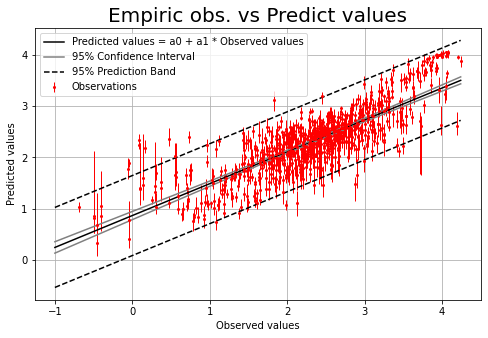

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 0.261, median - 0.263, CI - [0.244-0.28]

SHAP-values for: DBH_cm: mean - 0.201, median - 0.206, CI - [0.173-0.227]

SHAP-values for: H_m: mean - 0.114, median - 0.115, CI - [0.101-0.127]

SHAP-values for: Origin_ID: mean - 0.028, median - 0.028, CI - [0.021-0.036]

SHAP-values for: Species_ID: mean - 0.224, median - 0.225, CI - [0.21-0.239]



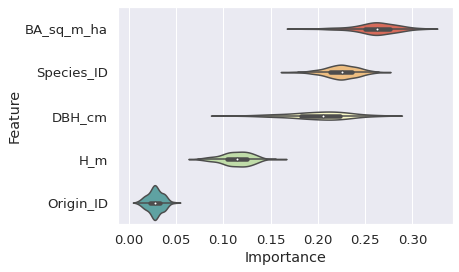

In [25]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['BA_sq_m_ha', 'Species_ID', 'DBH_cm', 'H_m', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [26]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [27]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 118.13, median: 120.0,
 pred. interval (P(0.025)-P(0.975)): 33.925-195.0, 
 conf. interval (p-value=0.95): 68.062-170.434 
***
Aggregate bias statistic: 
 mean: -0.011, median: -0.01,
 pred. interval (P(0.025)-P(0.975)): -0.095-0.08, 
 conf. interval (p-value=0.95): -0.048-0.026 
***
Aggregate RMSE statistic: 
 mean: 0.504, median: 0.494, pred. interval (P(0.025)-P(0.975)): 0.413-0.615, 
 conf. interval (p-value=0.95): 0.459-0.549 
***
Aggregate MSE statistic: 
 mean: 0.256, median: 0.244, pred. interval (P(0.025)-P(0.975)): 0.17-0.378, 
 conf. interval (p-value=0.95): 0.211-0.302 
***
Aggregate R^2 statistic: 
 mean: 0.624, median: 0.633, pred. interval (P(0.025)-P(0.975)): 0.494-0.734, 
 conf. interval (p-value=0.95): 0.567-0.684 
***
Aggregate bias(%) statistic: 
 mean: -0.465, median: -0.429, pred. interval (P(0.025)-P(0.975)): -3.933-3.535, 
 conf. interval (p-value=0.95): -2.0

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

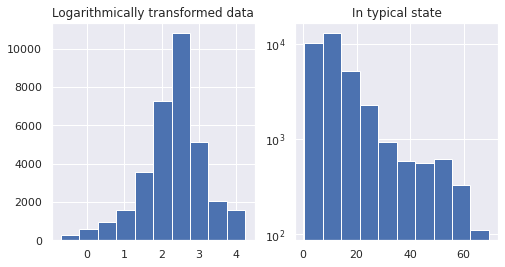

In [28]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [29]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-1, 0, 1, 2, 3, 4])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 10, 20, 30, 40, 70])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

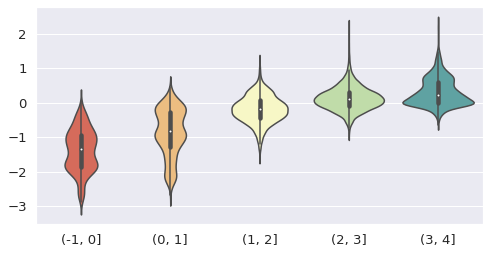

In [30]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

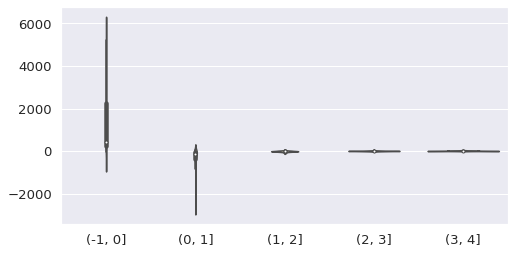

In [31]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

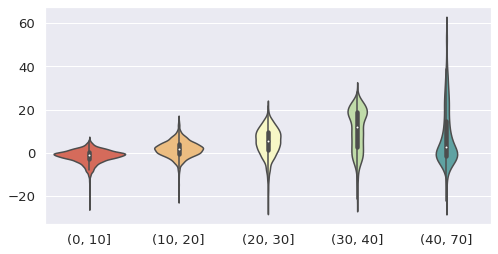

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

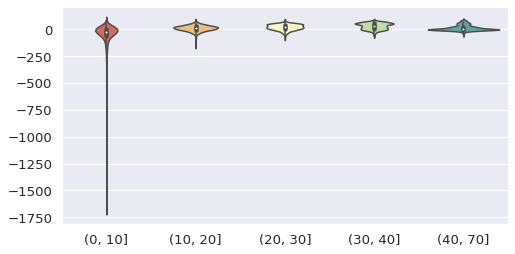

In [33]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [34]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [35]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [36]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.78979
[1]	validation_0-rmse:1.60673
[2]	validation_0-rmse:1.44763
[3]	validation_0-rmse:1.31275
[4]	validation_0-rmse:1.18941
[5]	validation_0-rmse:1.08477


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99157
[7]	validation_0-rmse:0.91190
[8]	validation_0-rmse:0.84496
[9]	validation_0-rmse:0.78804
[10]	validation_0-rmse:0.74184
[11]	validation_0-rmse:0.70123
[12]	validation_0-rmse:0.66461
[13]	validation_0-rmse:0.63342
[14]	validation_0-rmse:0.60735
[15]	validation_0-rmse:0.58783
[16]	validation_0-rmse:0.57140
[17]	validation_0-rmse:0.55635
[18]	validation_0-rmse:0.54401
[19]	validation_0-rmse:0.53220
[20]	validation_0-rmse:0.52181
[21]	validation_0-rmse:0.51484
[22]	validation_0-rmse:0.50798
[23]	validation_0-rmse:0.50270
[24]	validation_0-rmse:0.49855
[25]	validation_0-rmse:0.49376
[26]	validation_0-rmse:0.48932
[27]	validation_0-rmse:0.48596
[28]	validation_0-rmse:0.47919
[29]	validation_0-rmse:0.47772
[30]	validation_0-rmse:0.47505
[31]	validation_0-rmse:0.47022
[32]	validation_0-rmse:0.46824
[33]	validation_0-rmse:0.46504
[34]	validation_0-rmse:0.46232
[35]	validation_0-rmse:0.45718
[36]	validation_0-rmse:0.45127
[37]	validation_0-rmse:0.44964
[38]	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [37]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 195


In [38]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

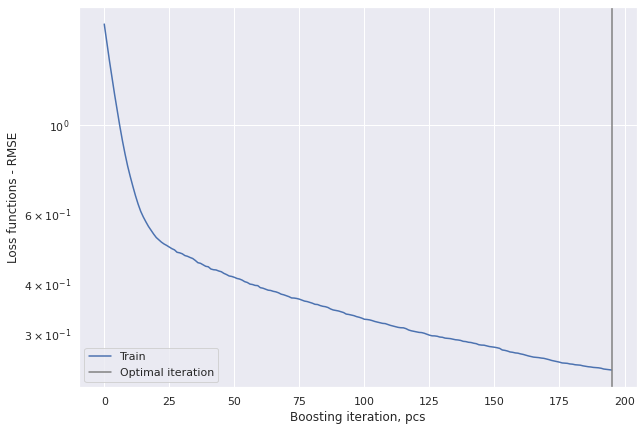

In [39]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [40]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.01
RMSE: 0.2
Relative RMSE(%):  10.476
MSE: 0.1
R square: 91.4%


In [41]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.920
Uncertainty
a0: 0.355+/-0.021
a1: 0.847+/-0.009


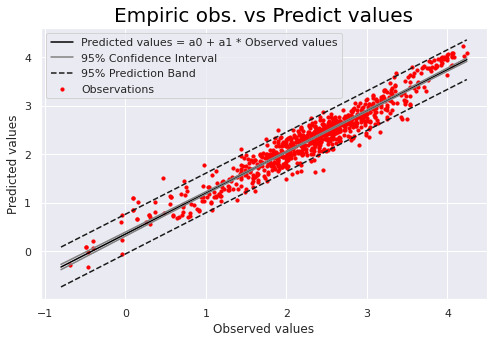

In [42]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-0.8, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

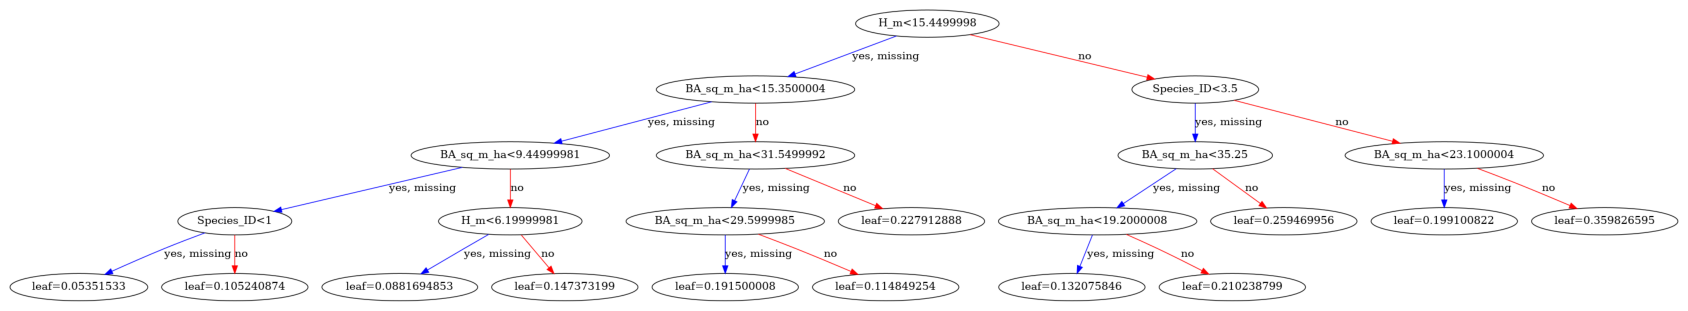

In [45]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 60]
plt.show()

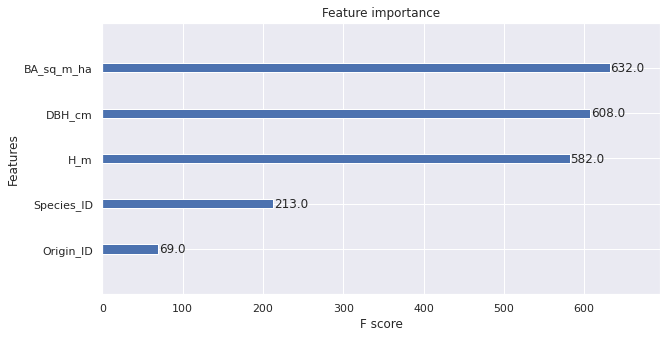

In [47]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

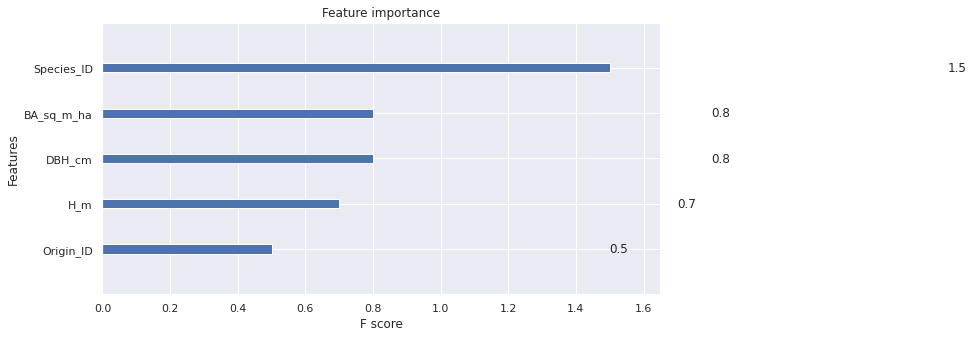

In [48]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

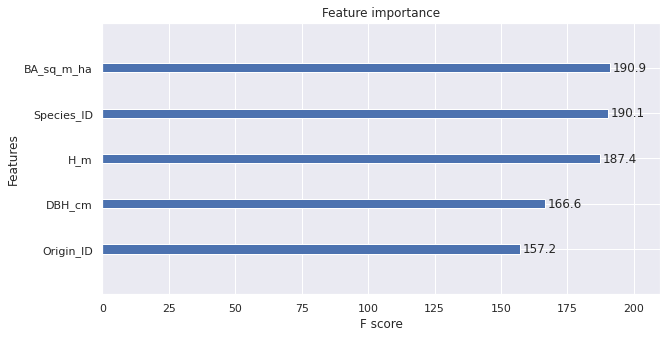

In [49]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [50]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


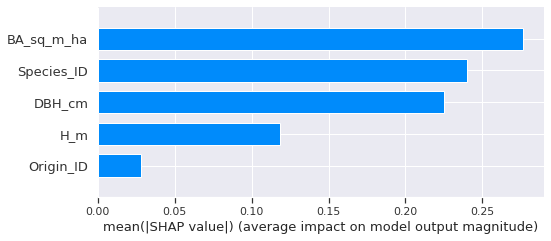

In [51]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

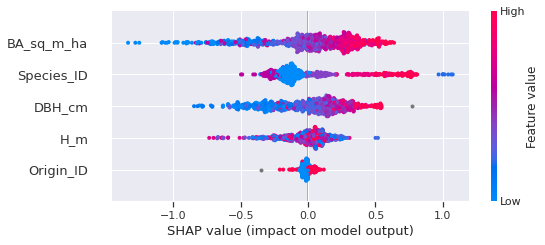

In [52]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

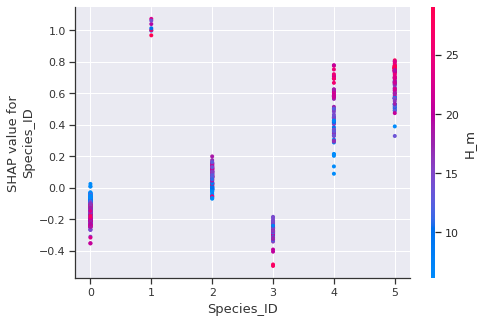

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


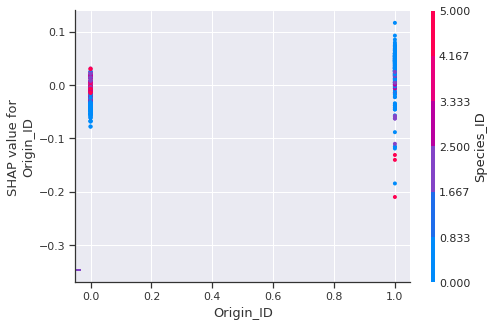

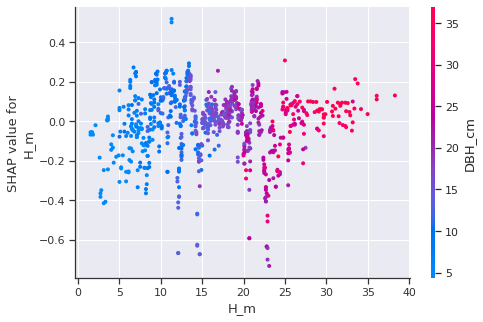

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


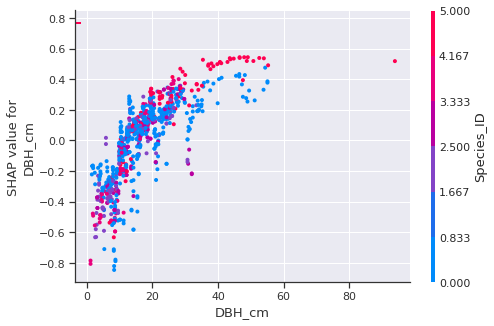

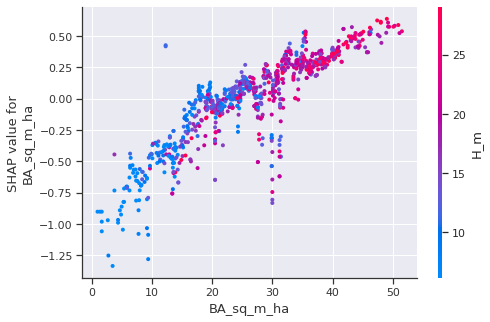

In [53]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [54]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/04_LN_M_branch_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/04_LN_M_branch_other_authors_XGB_model.txt")